In [1]:
import os


data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata"

print(os.listdir(data_path))


['Copy of fetch_files.sh', 'fetch_files.sh', 'imd_rf_1x1_1901.nc', 'imd_rf_1x1_1902.nc', 'imd_rf_1x1_1903.nc', 'imd_rf_1x1_1904.nc', 'imd_rf_1x1_1905.nc', 'imd_rf_1x1_1906.nc', 'imd_rf_1x1_1907.nc', 'imd_rf_1x1_1908.nc', 'imd_rf_1x1_1909.nc', 'imd_rf_1x1_1910.nc', 'imd_rf_1x1_1911.nc', 'imd_rf_1x1_1912.nc', 'imd_rf_1x1_1913.nc', 'imd_rf_1x1_1914.nc', 'imd_rf_1x1_1915.nc', 'imd_rf_1x1_1916.nc', 'imd_rf_1x1_1917.nc', 'imd_rf_1x1_1918.nc', 'imd_rf_1x1_1919.nc', 'imd_rf_1x1_1920.nc', 'imd_rf_1x1_1921.nc', 'imd_rf_1x1_1922.nc', 'imd_rf_1x1_1923.nc', 'imd_rf_1x1_1924.nc', 'imd_rf_1x1_1925.nc', 'imd_rf_1x1_1926.nc', 'imd_rf_1x1_1927.nc', 'imd_rf_1x1_1928.nc', 'imd_rf_1x1_1929.nc', 'imd_rf_1x1_1930.nc', 'imd_rf_1x1_1931.nc', 'imd_rf_1x1_1932.nc', 'imd_rf_1x1_1933.nc', 'imd_rf_1x1_1934.nc', 'imd_rf_1x1_1935.nc', 'imd_rf_1x1_1936.nc', 'imd_rf_1x1_1937.nc', 'imd_rf_1x1_1938.nc', 'imd_rf_1x1_1939.nc', 'imd_rf_1x1_1940.nc', 'imd_rf_1x1_1941.nc', 'imd_rf_1x1_1942.nc', 'imd_rf_1x1_1943.nc', 'imd_rf_1

In [4]:
import xarray as xr
import os
import glob

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/" 
file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
matching_files = glob.glob(file_pattern)

if matching_files:
    ds = xr.open_mfdataset(matching_files, combine="by_coords", parallel=True)
    print(ds)
else:
    print(f"No files matching the pattern 'imd_rf_1x1_*.nc' found in {data_path}")
    try:
        files_in_dir = os.listdir(data_path)
        print(f"Files in directory: {files_in_dir[:10]}")  # Show first 10 files
    except Exception as e:
        print(f"Error listing directory: {e}")

<xarray.Dataset> Size: 412MB
Dimensions:    (TIME: 44560, LATITUDE: 33, LONGITUDE: 35)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 280B 66.5 67.5 68.5 69.5 ... 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 264B 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 356kB 1901-01-01 1901-01-02 ... 2022-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 412MB dask.array<chunksize=(365, 33, 35), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


C:\Users\adars\anaconda3\Lib\site-packages\dask\_task_spec.py:740: RuntimeWarning: All-NaN slice encountered
  return self.func(*new_argspec, **kwargs)


In [6]:
import matplotlib.pyplot as plt

ds['RAINFALL'].isel(time=0).plot()  
plt.show()

ValueError: Dimensions {'time'} do not exist. Expected one or more of ('TIME', 'LATITUDE', 'LONGITUDE')

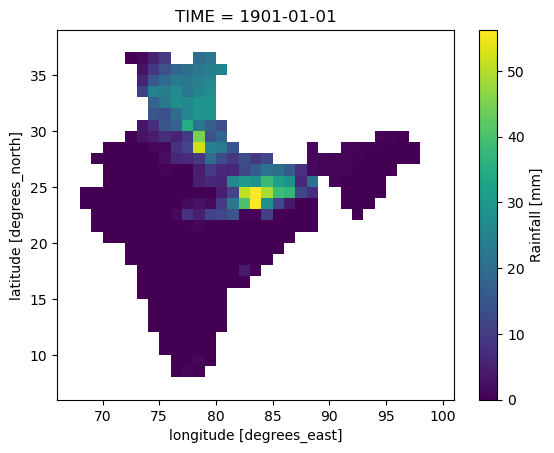

In [7]:
import matplotlib.pyplot as plt
ds['RAINFALL'].isel(TIME=0).plot()  
plt.show()

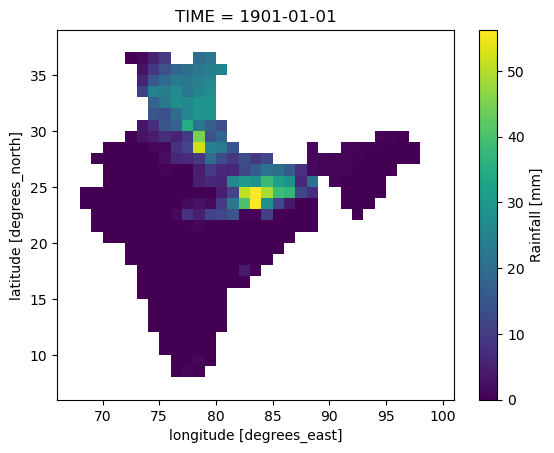

In [8]:

import matplotlib.pyplot as plt

ds['RAINFALL'].isel(TIME=0).plot()
plt.show()

In [10]:
mean_rainfall = ds['RAINFALL'].mean().values  # Changed 'rf' to 'RAINFALL'
print(f"Average Rainfall: {mean_rainfall}")

min_rainfall = ds['RAINFALL'].min().values  # Changed 'rf' to 'RAINFALL'
max_rainfall = ds['RAINFALL'].max().values  # Changed 'rf' to 'RAINFALL'
print(f"Rainfall range: {min_rainfall} to {max_rainfall}")

Average Rainfall: 3.377049257894419
Rainfall range: -99.9000015258789 to 771.041748046875


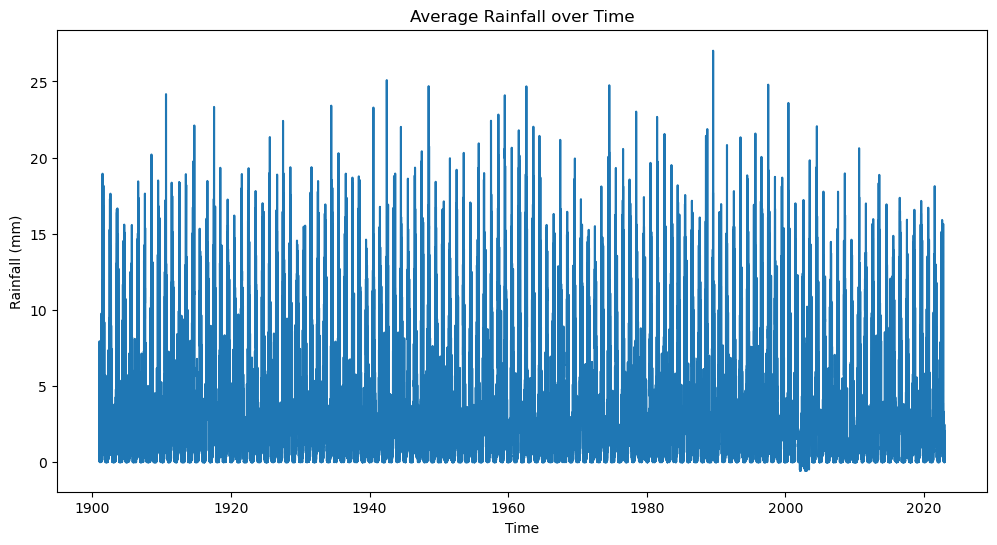

In [12]:
import matplotlib.pyplot as plt


rainfall_time_series = ds['RAINFALL'].mean(dim=['LATITUDE', 'LONGITUDE']) 

# Plot
plt.figure(figsize=(12, 6))
rainfall_time_series.plot()
plt.title('Average Rainfall over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.show()

In [13]:
# Pick a specific time index (e.g., first time point)
ds['rf'].isel(time=0).plot(figsize=(10, 6), cmap='Blues')
plt.title('Rainfall Distribution at First Time Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KeyError: "No variable named 'rf'. Variables on the dataset include ['RAINFALL', 'LONGITUDE', 'LATITUDE', 'TIME']"

In [14]:
# Pick a specific time index (e.g., first time point)
ds['RAINFALL'].isel(time=0).plot(figsize=(10, 6), cmap='Blues')  # Changed 'rf' to 'RAINFALL' to match the actual variable name
plt.title('Rainfall Distribution at First Time Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: Dimensions {'time'} do not exist. Expected one or more of ('TIME', 'LATITUDE', 'LONGITUDE')

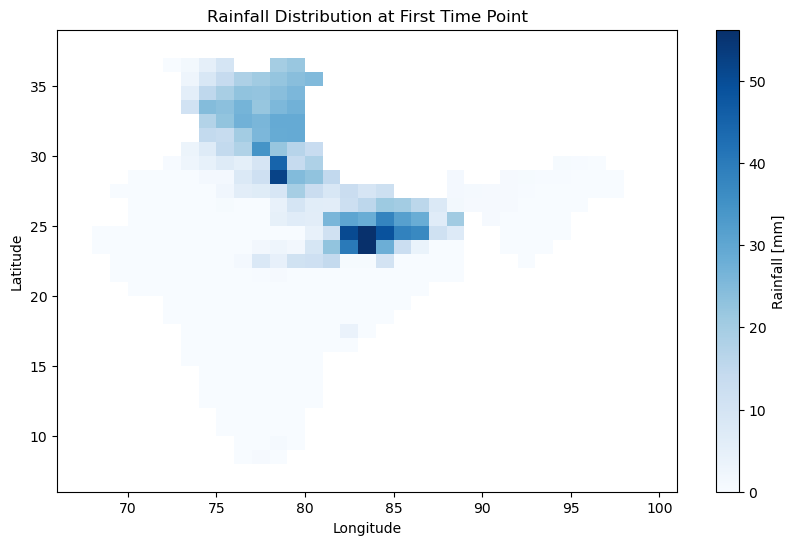

In [15]:
ds['RAINFALL'].isel(TIME=0).plot(figsize=(10, 6), cmap='Blues') 
plt.title('Rainfall Distribution at First Time Point')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
ds_jjas = ds.sel(time=ds['time.month'].isin([6, 7, 8, 9]))

jjas_mean = ds_jjas['rf'].mean(dim='time')

jjas_mean.plot(figsize=(10, 6), cmap='Blues')
plt.title('Average JJAS Rainfall')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


KeyError: "No variable named 'time.month'. Variables on the dataset include ['RAINFALL', 'LONGITUDE', 'LATITUDE', 'TIME']"

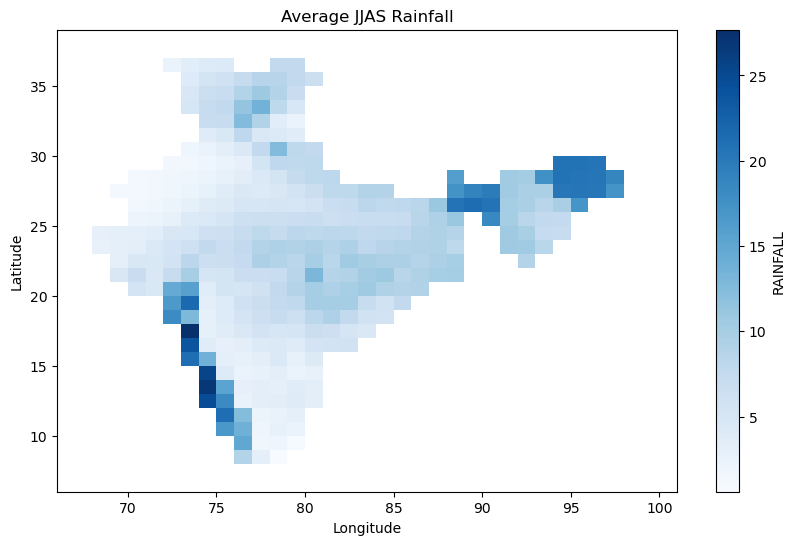

In [17]:
ds_jjas = ds.sel(TIME=ds.TIME.dt.month.isin([6, 7, 8, 9]))

jjas_mean = ds_jjas['RAINFALL'].mean(dim='TIME')
jjas_mean.plot(figsize=(10, 6), cmap='Blues')
plt.title('Average JJAS Rainfall')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
year_1973 = ds.sel(time='1973').mean(dim='time')
year_2022 = ds.sel(time='2022').mean(dim='time')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
year_1973['rf'].plot(cmap='Blues')
plt.title('1973 Average Rainfall')

plt.subplot(1, 2, 2)
year_2022['rf'].plot(cmap='Blues')
plt.title('2022 Average Rainfall')

plt.show()


KeyError: "'time' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'TIME': 44560, 'LATITUDE': 33, 'LONGITUDE': 35})"

KeyError: "No variable named 'rf'. Variables on the dataset include ['RAINFALL', 'LONGITUDE', 'LATITUDE']"

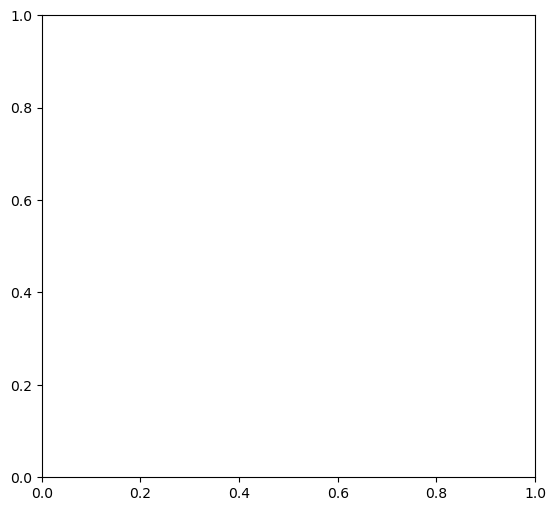

In [19]:
year_1973 = ds.sel(TIME='1973').mean(dim='TIME')
year_2022 = ds.sel(TIME='2022').mean(dim='TIME')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
year_1973['rf'].plot(cmap='Blues')
plt.title('1973 Average Rainfall')

plt.subplot(1, 2, 2)
year_2022['rf'].plot(cmap='Blues')
plt.title('2022 Average Rainfall')

plt.show()

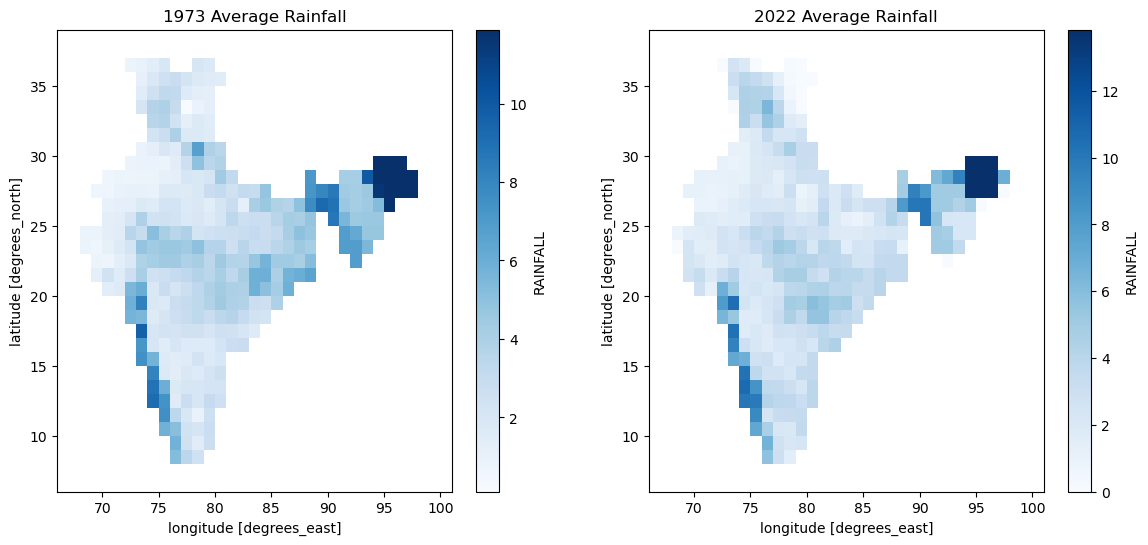

In [20]:
year_1973 = ds.sel(TIME='1973').mean(dim='TIME')
year_2022 = ds.sel(TIME='2022').mean(dim='TIME')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
year_1973['RAINFALL'].plot(cmap='Blues')  
plt.title('1973 Average Rainfall')

plt.subplot(1, 2, 2)
year_2022['RAINFALL'].plot(cmap='Blues')  
plt.title('2022 Average Rainfall')

plt.show()

In [25]:
import pandas as pd

ds['TIME'] = pd.to_datetime(ds['TIME'].values)

ds.coords['year'] = ('TIME', ds['TIME'].dt.year.values) 
yearly_grouped = ds.groupby('year')

In [26]:
print(f"Data has been successfully grouped by year. Total number of years in dataset: {len(yearly_grouped.groups)}")


Data has been successfully grouped by year. Total number of years in dataset: 122


In [29]:
yearly_mean = {}
yearly_median = {}
yearly_std = {}

for year, group in yearly_grouped:
    
    yearly_mean[year] = group['RAINFALL'].mean().values.item() 

    yearly_median[year] = group['RAINFALL'].compute().median().item() 

    yearly_std[year] = group['RAINFALL'].std().values.item() 

In [30]:
print(f"Computed yearly mean, median, and std deviation for {len(yearly_mean)} years.")

sample_year = sorted(yearly_mean.keys())[0]
print(f"\nSample statistics for year {sample_year}:")
print(f"Mean Rainfall: {yearly_mean[sample_year]:.2f} mm")
print(f"Median Rainfall: {yearly_median[sample_year]:.2f} mm")
print(f"Standard Deviation: {yearly_std[sample_year]:.2f} mm")


Computed yearly mean, median, and std deviation for 122 years.

Sample statistics for year 1901:
Mean Rainfall: 3.02 mm
Median Rainfall: 0.00 mm
Standard Deviation: 10.89 mm


In [39]:
print(ds.data_vars)


Data variables:
    RAINFALL  (TIME, LATITUDE, LONGITUDE) float64 412MB dask.array<chunksize=(365, 33, 35), meta=np.ndarray>


In [47]:
def calculate_yearly_rainfall_stats(file_path):

    if not isinstance(yearly_mean, pd.Series):
        
        yearly_mean = pd.Series([yearly_mean])
    
    if not isinstance(yearly_median, pd.Series):
        yearly_median = pd.Series([yearly_median], index=yearly_mean.index)
    
    if not isinstance(yearly_mode, pd.Series):
        yearly_mode = pd.Series([yearly_mode], index=yearly_mean.index)
    
    if not isinstance(yearly_var, pd.Series):
        yearly_var = pd.Series([yearly_var], index=yearly_mean.index)

    stats_df = pd.DataFrame({
        'Year': yearly_mean.index,
        'Mean': yearly_mean.values,
        'Median': yearly_median.values,
        'Mode': yearly_mode.values,
        'Variance': yearly_var.values
    })
    
    return stats_df


In [48]:
import os
import glob
import pandas as pd
import numpy as np
import xarray as xr
import traceback  

def calculate_yearly_rainfall_stats(file_path):
    """
    Calculate yearly rainfall statistics from a NetCDF file.
    
    Parameters:
    file_path (str): Path to NetCDF file
    
    Returns:
    pd.DataFrame: DataFrame with yearly rainfall statistics
    """
    try:
        print(f"Opening file: {file_path}")
        # Open the NetCDF file
        ds = xr.open_dataset(file_path)
        
        # Print dataset info for debugging
        print("Dataset variables:", list(ds.data_vars))
        print("Dataset dimensions:", list(ds.dims))
        
        # Assuming 'rainfall' is the variable name - adjust if needed
        # Try common variable names for rainfall data
        rainfall_vars = ['rainfall', 'precip', 'precipitation', 'rain']
        rainfall_var = None
        
        for var in rainfall_vars:
            if var in ds.data_vars:
                rainfall_var = ds[var]
                print(f"Found rainfall variable: {var}")
                break
        
        if rainfall_var is None:
            print(f"No rainfall variable found in {file_path}. Available variables: {list(ds.data_vars)}")
            return None
        
        # Check if time dimension exists
        if 'time' not in ds.dims:
            print(f"No time dimension found in {file_path}")
            return None
            
        # Group by year and calculate statistics
        print("Calculating yearly statistics...")
        
        # Convert time to datetime if it's not already
        if not np.issubdtype(ds.time.dtype, np.datetime64):
            print("Converting time to datetime...")
            ds['time'] = pd.to_datetime(ds.time.values)
        
        # Group by year
        yearly_data = rainfall_var.groupby('time.year')
        
        # Calculate statistics
        yearly_mean = yearly_data.mean().to_series()
        print(f"Yearly mean type: {type(yearly_mean)}, shape: {yearly_mean.shape}")
        
        yearly_median = yearly_data.median().to_series()
        print(f"Yearly median type: {type(yearly_median)}, shape: {yearly_median.shape}")
        
        # Mode calculation is more complex
        # For simplicity, let's use the most common value
        yearly_mode = []
        for year, group in yearly_data:
            values = group.values.flatten()
            
            values = values[~np.isnan(values)]
            if len(values) > 0:
                
                unique_values, counts = np.unique(values, return_counts=True)
                mode_value = unique_values[np.argmax(counts)]
                yearly_mode.append((year, mode_value))
            else:
                yearly_mode.append((year, np.nan))
        
        yearly_var = yearly_data.var().to_series()
        print(f"Yearly variance type: {type(yearly_var)}, shape: {yearly_var.shape}")

        yearly_mode = pd.Series([m[1] for m in yearly_mode], index=[m[0] for m in yearly_mode])
        print(f"Yearly mode type: {type(yearly_mode)}, shape: {yearly_mode.shape}")
        
        common_index = yearly_mean.index

        try:
            stats_df = pd.DataFrame({
                'Year': common_index,
                'Mean': yearly_mean.values,
                'Median': yearly_median.values,
                'Mode': yearly_mode.values,
                'Variance': yearly_var.values
            })
            print(f"Created DataFrame with {len(stats_df)} rows")
            return stats_df
        except Exception as e:
            print(f"Error creating DataFrame: {e}")
            print("Debugging info:")
            print(f"yearly_mean: {type(yearly_mean)}, index: {yearly_mean.index}")
            print(f"yearly_median: {type(yearly_median)}, index: {yearly_median.index}")
            print(f"yearly_mode: {type(yearly_mode)}, index: {yearly_mode.index}")
            print(f"yearly_var: {type(yearly_var)}, index: {yearly_var.index}")
            return None
            
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        print(traceback.format_exc())  # Print full traceback
        return None


def process_all_nc_files(directory_path):
    """
    Process all NetCDF files in a directory and calculate rainfall statistics.
    
    Parameters:
    directory_path (str): Path to directory containing NetCDF files
    
    Returns:
    pd.DataFrame: Combined DataFrame with statistics from all files
    """
    print(f"Searching for NetCDF files in: {directory_path}")
    nc_files = glob.glob(os.path.join(directory_path, '*.nc'))
    
    print(f"Found {len(nc_files)} NetCDF files")
    
    if not nc_files:
        print(f"No NetCDF files found in {directory_path}")
        return None
    
    all_stats = []
    for file_path in nc_files:
        print(f"\nProcessing {file_path}...")
        file_stats = calculate_yearly_rainfall_stats(file_path)
        if file_stats is not None:
            print(f"Statistics calculated successfully for {file_path}")
            file_stats['Source'] = os.path.basename(file_path)
            all_stats.append(file_stats)
        else:
            print(f"Failed to calculate statistics for {file_path}")
    
    if not all_stats:
        print("No valid statistics calculated from any file.")
        return None

    print(f"Combining statistics from {len(all_stats)} files...")
    combined_stats = pd.concat(all_stats, ignore_index=True)
    print(f"Combined DataFrame has {len(combined_stats)} rows")
    return combined_stats

if __name__ == "__main__":
    nc_directory = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata"
    print(f"Starting process with directory: {nc_directory}")
    
   
    if not os.path.exists(nc_directory):
        print(f"Directory does not exist: {nc_directory}")
    else:
        rainfall_stats = process_all_nc_files(nc_directory)
        
        if rainfall_stats is not None:
            print("\nYearly Rainfall Statistics:")
            print(rainfall_stats.head())  
            print(f"Total rows: {len(rainfall_stats)}")
            
           
            csv_path = "yearly_rainfall_statistics.csv"
            rainfall_stats.to_csv(csv_path, index=False)
            print(f"Statistics saved to {csv_path}")
        else:
            print("No statistics were generated.")

Starting process with directory: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata
Searching for NetCDF files in: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata
Found 122 NetCDF files

Processing C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc...
Opening file: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc
Dataset variables: ['RAINFALL']
Dataset dimensions: ['LONGITUDE', 'LATITUDE', 'TIME']
No rainfall variable found in C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc. Available variables: ['RAINFALL']
Failed to calculate statistics for C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc

Processing C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1902.nc...
Opening file: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1902.nc
Dataset variables: ['RAINFALL']
Dataset dimensions: ['LONGITUDE', 'LATITUDE

In [49]:
import os
import glob
import pandas as pd
import numpy as np
import xarray as xr
import traceback

def calculate_yearly_rainfall_stats(file_path):
    """
    Calculate yearly rainfall statistics from a NetCDF file.
    
    Parameters:
    file_path (str): Path to NetCDF file
    
    Returns:
    pd.DataFrame: DataFrame with yearly rainfall statistics
    """
    try:
        print(f"Opening file: {file_path}")
        ds = xr.open_dataset(file_path)
        
        
        print("Dataset variables:", list(ds.data_vars))
        print("Dataset dimensions:", list(ds.dims))
       
        rainfall_vars = ['RAINFALL', 'rainfall', 'precip', 'precipitation', 'rain']
        rainfall_var = None
        
        for var in rainfall_vars:
            if var in ds.data_vars:
                rainfall_var = ds[var]
                print(f"Found rainfall variable: {var}")
                break
        
        if rainfall_var is None:
            print(f"No rainfall variable found in {file_path}. Available variables: {list(ds.data_vars)}")
            return None
        
      
        if 'time' not in ds.dims:
            print(f"No time dimension found in {file_path}")
            return None
            
        
        print("Calculating yearly statistics...")
        
        
        if not np.issubdtype(ds.time.dtype, np.datetime64):
            print("Converting time to datetime...")
            ds['time'] = pd.to_datetime(ds.time.values)
        
        
        yearly_data = rainfall_var.groupby('time.year')
       
        yearly_mean = yearly_data.mean().to_series()
        print(f"Yearly mean type: {type(yearly_mean)}, shape: {yearly_mean.shape}")
        
        yearly_median = yearly_data.median().to_series()
        print(f"Yearly median type: {type(yearly_median)}, shape: {yearly_median.shape}")
        
        
        yearly_mode = []
        for year, group in yearly_data:
            values = group.values.flatten()
            
            values = values[~np.isnan(values)]
            if len(values) > 0:
                
                unique_values, counts = np.unique(values, return_counts=True)
                mode_value = unique_values[np.argmax(counts)]
                yearly_mode.append((year, mode_value))
            else:
                yearly_mode.append((year, np.nan))
        
        yearly_var = yearly_data.var().to_series()
        print(f"Yearly variance type: {type(yearly_var)}, shape: {yearly_var.shape}")
        
        
        yearly_mode = pd.Series([m[1] for m in yearly_mode], index=[m[0] for m in yearly_mode])
        print(f"Yearly mode type: {type(yearly_mode)}, shape: {yearly_mode.shape}")
        
        
        try:
            stats_df = pd.DataFrame({
                'Year': yearly_mean.index,
                'Mean': yearly_mean.values,
                'Median': yearly_median.values,
                'Mode': yearly_mode.values,
                'Variance': yearly_var.values
            })
            print(f"Created DataFrame with {len(stats_df)} rows")
            return stats_df
        except Exception as e:
            print(f"Error creating DataFrame: {e}")
            print("Debugging info:")
            print(f"yearly_mean: {type(yearly_mean)}, index: {yearly_mean.index}")
            print(f"yearly_median: {type(yearly_median)}, index: {yearly_median.index}")
            print(f"yearly_mode: {type(yearly_mode)}, index: {yearly_mode.index}")
            print(f"yearly_var: {type(yearly_var)}, index: {yearly_var.index}")
            return None
            
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        print(traceback.format_exc())
        return None


def process_all_nc_files(directory_path):
    print(f"Searching for NetCDF files in: {directory_path}")
    nc_files = glob.glob(os.path.join(directory_path, '*.nc'))
    
    print(f"Found {len(nc_files)} NetCDF files")
    
    if not nc_files:
        print(f"No NetCDF files found in {directory_path}")
        return None
    
    all_stats = []
    for file_path in nc_files:
        print(f"\nProcessing {file_path}...")
        file_stats = calculate_yearly_rainfall_stats(file_path)
        if file_stats is not None:
            print(f"Statistics calculated successfully for {file_path}")
            file_stats['Source'] = os.path.basename(file_path)
            all_stats.append(file_stats)
        else:
            print(f"Failed to calculate statistics for {file_path}")
    
    if not all_stats:
        print("No valid statistics calculated from any file.")
        return None
    
    
    print(f"Combining statistics from {len(all_stats)} files...")
    combined_stats = pd.concat(all_stats, ignore_index=True)
    print(f"Combined DataFrame has {len(combined_stats)} rows")
    return combined_stats


if __name__ == "__main__":
    nc_directory = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata"
    
    print(f"Starting process with directory: {nc_directory}")
    
    if not os.path.exists(nc_directory):
        print(f"Directory does not exist: {nc_directory}")
    else:
        rainfall_stats = process_all_nc_files(nc_directory)
        
        if rainfall_stats is not None:
            print("\nYearly Rainfall Statistics:")
            print(rainfall_stats.head())
            print(f"Total rows: {len(rainfall_stats)}")
            
            csv_path = "yearly_rainfall_statistics.csv"
            rainfall_stats.to_csv(csv_path, index=False)
            print(f"Statistics saved to {csv_path}")
        else:
            print("No statistics were generated.")

Starting process with directory: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata
Searching for NetCDF files in: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata
Found 122 NetCDF files

Processing C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc...
Opening file: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc
Dataset variables: ['RAINFALL']
Dataset dimensions: ['LONGITUDE', 'LATITUDE', 'TIME']
Found rainfall variable: RAINFALL
No time dimension found in C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc
Failed to calculate statistics for C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc

Processing C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1902.nc...
Opening file: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1902.nc
Dataset variables: ['RAINFALL']
Dataset dimensions: ['LONGITUDE', 'LATITUDE', '

In [52]:
import os
import glob
import pandas as pd
import numpy as np
import xarray as xr
import traceback

def calculate_yearly_rainfall_stats(file_path):
    """
    Calculate yearly rainfall statistics from a NetCDF file.
    
    Parameters:
    file_path (str): Path to NetCDF file
    
    Returns:
    pd.DataFrame: DataFrame with yearly rainfall statistics
    """
    try:
        print(f"Opening file: {file_path}")
        
        ds = xr.open_dataset(file_path)
        
        
        print("Dataset variables:", list(ds.data_vars))
        print("Dataset dimensions:", list(ds.dims))
        
        
        for var_name, var in ds.data_vars.items():
            print(f"Variable: {var_name}")
            print(f"  Dimensions: {var.dims}")
            print(f"  Shape: {var.shape}")
            print(f"  Attributes: {var.attrs}")
        
       
        rainfall_var = None
        available_vars = list(ds.data_vars.keys())
        
       
        rainfall_vars = ['RAINFALL', 'rainfall', 'precip', 'precipitation', 'rain']
        for var in rainfall_vars:
            if var in available_vars:
                rainfall_var = ds[var]
                print(f"Found rainfall variable: {var}")
                break
        
        
        if rainfall_var is None:
            for var in available_vars:
                if var.lower() in ['rainfall', 'precip', 'precipitation', 'rain']:
                    rainfall_var = ds[var]
                    print(f"Found rainfall variable (case-insensitive): {var}")
                    break
        
        if rainfall_var is None:
            print(f"No rainfall variable found in {file_path}. Available variables: {available_vars}")
            return None
       
        print(f"Rainfall variable dimensions: {rainfall_var.dims}")
        
        
        if 'time' not in rainfall_var.dims:
            print(f"No time dimension found in rainfall variable. Available dimensions: {rainfall_var.dims}")
            
           
            time_like_dims = [dim for dim in rainfall_var.dims if any(t in dim.lower() for t in ['time', 'date', 'day', 'month', 'year'])]
            if time_like_dims:
                print(f"Found potential time dimension: {time_like_dims[0]}")
                
            
            return None
            
        
        print(f"Time dimension values (first 5): {ds.time.values[:5]}")
        print(f"Time dimension type: {type(ds.time.values)}, dtype: {ds.time.dtype}")
        
        
        try:
            if not np.issubdtype(ds.time.dtype, np.datetime64):
                print("Converting time to datetime...")
                ds['time'] = pd.to_datetime(ds.time.values)
                print(f"Converted time values (first 5): {ds.time.values[:5]}")
        except Exception as e:
            print(f"Error converting time to datetime: {e}")
            print("Will try to proceed with original time values")
        
        
        try:
            print("Attempting to group by year...")
            yearly_data = rainfall_var.groupby('time.year')
            print("Successfully grouped by year")
            
            
            yearly_mean = yearly_data.mean().to_series()
            print(f"Yearly mean calculated, shape: {yearly_mean.shape}")
            
            yearly_median = yearly_data.median().to_series()
            print(f"Yearly median calculated, shape: {yearly_median.shape}")
            
            yearly_var = yearly_data.var().to_series()
            print(f"Yearly variance calculated, shape: {yearly_var.shape}")
            
            
            yearly_mode = []
            for year, group in yearly_data:
                values = group.values.flatten()
                
                values = values[~np.isnan(values)]
                if len(values) > 0:
                    
                    unique_values, counts = np.unique(values, return_counts=True)
                    mode_value = unique_values[np.argmax(counts)]
                    yearly_mode.append((year, mode_value))
                else:
                    yearly_mode.append((year, np.nan))
            
            
            yearly_mode = pd.Series([m[1] for m in yearly_mode], index=[m[0] for m in yearly_mode])
            print(f"Yearly mode calculated, shape: {yearly_mode.shape}")
            
            
            stats_df = pd.DataFrame({
                'Year': yearly_mean.index,
                'Mean': yearly_mean.values,
                'Median': yearly_median.values,
                'Mode': yearly_mode.values,
                'Variance': yearly_var.values
            })
            print(f"Created DataFrame with {len(stats_df)} rows")
            return stats_df
            
        except Exception as e:
            print(f"Error during statistics calculation: {e}")
            print(traceback.format_exc())
            return None
            
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        print(traceback.format_exc())
        return None


def process_all_nc_files(directory_path):
    print(f"Searching for NetCDF files in: {directory_path}")
    nc_files = glob.glob(os.path.join(directory_path, '*.nc'))
    
    print(f"Found {len(nc_files)} NetCDF files")
    
    if not nc_files:
        print(f"No NetCDF files found in {directory_path}")
        return None
    
    all_stats = []
    for file_path in nc_files:
        print(f"\n{'='*50}")
        print(f"Processing {file_path}...")
        file_stats = calculate_yearly_rainfall_stats(file_path)
        if file_stats is not None:
            print(f"Statistics calculated successfully for {file_path}")
            file_stats['Source'] = os.path.basename(file_path)
            all_stats.append(file_stats)
        else:
            print(f"Failed to calculate statistics for {file_path}")
        print(f"{'='*50}\n")
    
    if not all_stats:
        print("No valid statistics calculated from any file.")
        return None
    

    print(f"Combining statistics from {len(all_stats)} files...")
    combined_stats = pd.concat(all_stats, ignore_index=True)
    print(f"Combined DataFrame has {len(combined_stats)} rows")
    return combined_stats

if __name__ == "__main__":
    nc_directory = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata"
    
    print(f"Starting process with directory: {nc_directory}")
    
    if not os.path.exists(nc_directory):
        print(f"Directory does not exist: {nc_directory}")
    else:
        rainfall_stats = process_all_nc_files(nc_directory)
        
        if rainfall_stats is not None:
            print("\nYearly Rainfall Statistics:")
            print(rainfall_stats.head())
            print(f"Total rows: {len(rainfall_stats)}")
            
            csv_path = "yearly_rainfall_statistics.csv"

Starting process with directory: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata
Searching for NetCDF files in: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata
Found 122 NetCDF files

Processing C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc...
Opening file: C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1901.nc
Dataset variables: ['RAINFALL']
Dataset dimensions: ['LONGITUDE', 'LATITUDE', 'TIME']
Variable: RAINFALL
  Dimensions: ('TIME', 'LATITUDE', 'LONGITUDE')
  Shape: (365, 33, 35)
  Attributes: {'long_name': 'Rainfall', 'units': 'mm', 'history': 'From rf_1901.grd'}
Found rainfall variable: RAINFALL
Rainfall variable dimensions: ('TIME', 'LATITUDE', 'LONGITUDE')
No time dimension found in rainfall variable. Available dimensions: ('TIME', 'LATITUDE', 'LONGITUDE')
Found potential time dimension: TIME
Failed to calculate statistics for C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata\imd_rf_1x1_1

In [55]:
print(ds)


<xarray.Dataset> Size: 3MB
Dimensions:    (LONGITUDE: 35, LATITUDE: 33, TIME: 365)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 280B 66.5 67.5 68.5 69.5 ... 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 264B 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 3kB 1973-01-01 1973-01-02 ... 1973-12-31
    year       (TIME) int64 3kB 1973 1973 1973 1973 1973 ... 1973 1973 1973 1973
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 3MB ...
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


Yearly Total Rainfall (mm):
year
1973    457462.687715
Name: RAINFALL, dtype: float64

Climatological Mean Total Rainfall (mm): 457462.68771491945

Yearly Rainfall Anomaly (mm):
year
1973    0.0
Name: RAINFALL, dtype: float64


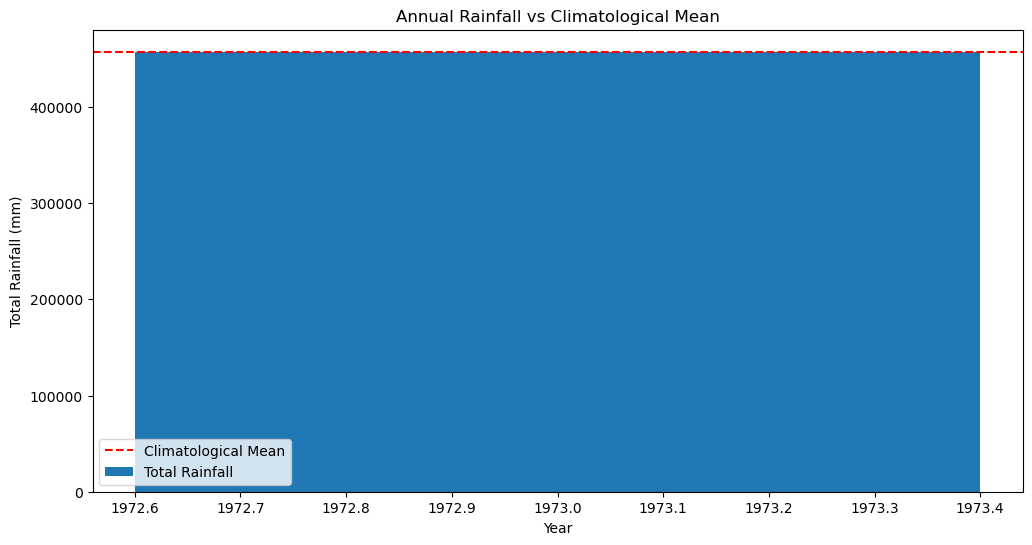

In [59]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/imd_rf_1x1_1973.nc"
ds = xr.open_dataset(data_path)

ds['TIME'] = pd.to_datetime(ds['TIME'].values)

years = pd.Series(ds['TIME'].dt.year.values, index=ds['TIME'].values)

rainfall_df = ds['RAINFALL'].to_dataframe().reset_index()

rainfall_df['year'] = pd.to_datetime(rainfall_df['TIME']).dt.year

yearly_total_rainfall = rainfall_df.groupby('year')['RAINFALL'].sum()
climatological_mean = yearly_total_rainfall.mean()
yearly_anomaly = yearly_total_rainfall - climatological_mean

print("Yearly Total Rainfall (mm):")
print(yearly_total_rainfall)
print("\nClimatological Mean Total Rainfall (mm):", climatological_mean)
print("\nYearly Rainfall Anomaly (mm):")
print(yearly_anomaly)

plt.figure(figsize=(12, 6))
plt.bar(yearly_total_rainfall.index, yearly_total_rainfall.values, label='Total Rainfall')
plt.axhline(y=climatological_mean, color='r', linestyle='--', label='Climatological Mean')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall vs Climatological Mean')
plt.legend()
plt.show()


Yearly Total Rainfall (mm):
year
2016    406530.313376
Name: RAINFALL, dtype: float64

Climatological Mean Total Rainfall (mm): 406530.3133760765

Yearly Rainfall Anomaly (mm):
year
2016    0.0
Name: RAINFALL, dtype: float64


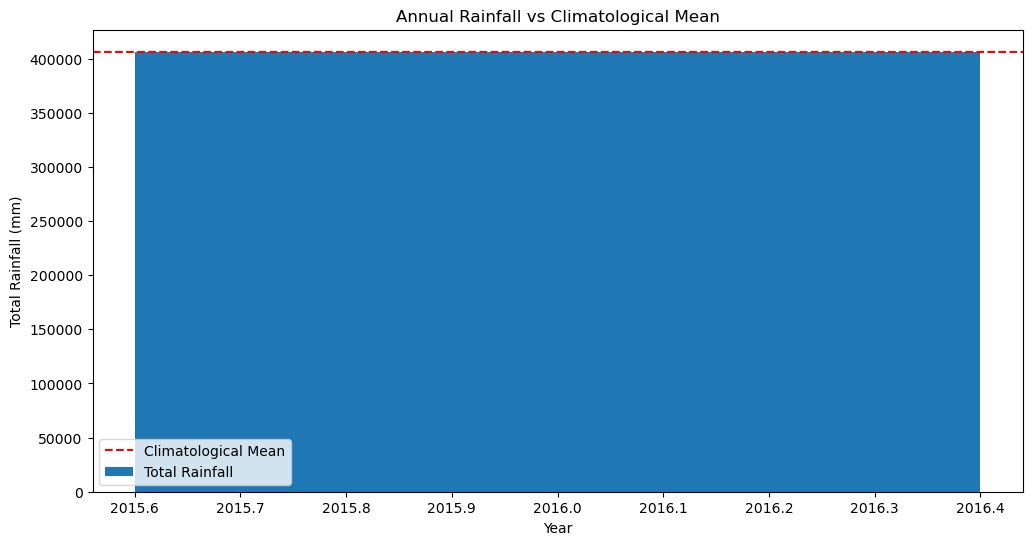

In [60]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/imd_rf_1x1_2016.nc"
ds = xr.open_dataset(data_path)

ds['TIME'] = pd.to_datetime(ds['TIME'].values)

years = pd.Series(ds['TIME'].dt.year.values, index=ds['TIME'].values)

rainfall_df = ds['RAINFALL'].to_dataframe().reset_index()

rainfall_df['year'] = pd.to_datetime(rainfall_df['TIME']).dt.year

yearly_total_rainfall = rainfall_df.groupby('year')['RAINFALL'].sum()

climatological_mean = yearly_total_rainfall.mean()

yearly_anomaly = yearly_total_rainfall - climatological_mean

print("Yearly Total Rainfall (mm):")
print(yearly_total_rainfall)
print("\nClimatological Mean Total Rainfall (mm):", climatological_mean)
print("\nYearly Rainfall Anomaly (mm):")
print(yearly_anomaly)

plt.figure(figsize=(12, 6))
plt.bar(yearly_total_rainfall.index, yearly_total_rainfall.values, label='Total Rainfall')
plt.axhline(y=climatological_mean, color='r', linestyle='--', label='Climatological Mean')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall vs Climatological Mean')
plt.legend()
plt.show()

Yearly Total Rainfall (mm):
year
1985    462041.412882
Name: RAINFALL, dtype: float64

Climatological Mean Total Rainfall (mm): 462041.4128818214

Yearly Rainfall Anomaly (mm):
year
1985    0.0
Name: RAINFALL, dtype: float64


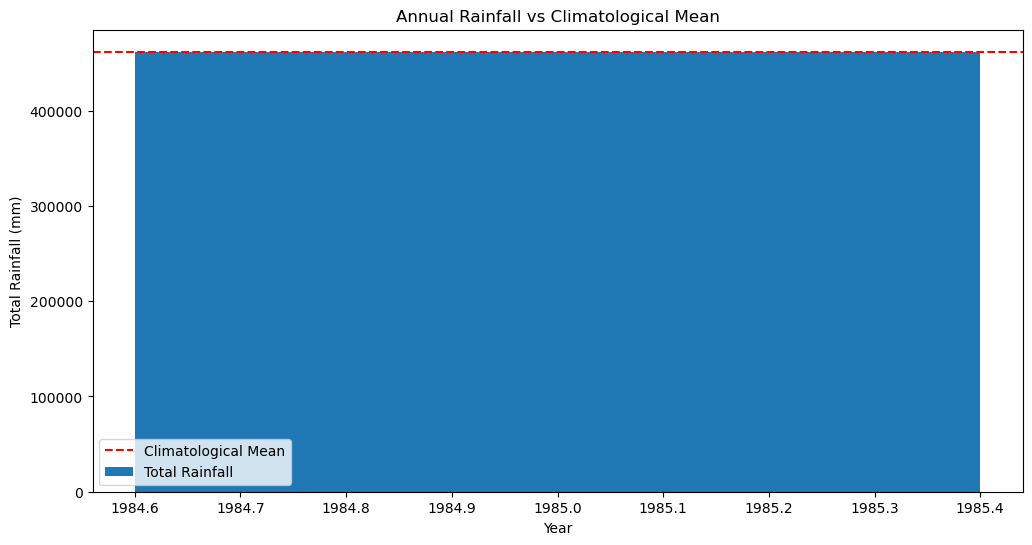

In [61]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/imd_rf_1x1_1985.nc"
ds = xr.open_dataset(data_path)

ds['TIME'] = pd.to_datetime(ds['TIME'].values)
years = pd.Series(ds['TIME'].dt.year.values, index=ds['TIME'].values)

rainfall_df = ds['RAINFALL'].to_dataframe().reset_index()
rainfall_df['year'] = pd.to_datetime(rainfall_df['TIME']).dt.year

yearly_total_rainfall = rainfall_df.groupby('year')['RAINFALL'].sum()
climatological_mean = yearly_total_rainfall.mean()
yearly_anomaly = yearly_total_rainfall - climatological_mean

print("Yearly Total Rainfall (mm):")
print(yearly_total_rainfall)
print("\nClimatological Mean Total Rainfall (mm):", climatological_mean)
print("\nYearly Rainfall Anomaly (mm):")
print(yearly_anomaly)

plt.figure(figsize=(12, 6))
plt.bar(yearly_total_rainfall.index, yearly_total_rainfall.values, label='Total Rainfall')
plt.axhline(y=climatological_mean, color='r', linestyle='--', label='Climatological Mean')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall vs Climatological Mean')
plt.legend()
plt.show()

In [62]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/imd_rf_1x1_1970_2020.nc"
ds = xr.open_dataset(data_path)
ds['TIME'] = pd.to_datetime(ds['TIME'].values)
ds = ds.assign_coords(year=('TIME', ds['TIME'].dt.year.data))

yearly_total_rainfall = ds.groupby('year')['RAINFALL'].sum(dim=['TIME', 'LATITUDE', 'LONGITUDE']).to_series()
climatological_mean = yearly_total_rainfall.mean()
yearly_anomaly = yearly_total_rainfall - climatological_mean

print("Yearly Total Rainfall (mm):")
print(yearly_total_rainfall)
print("\nClimatological Mean Total Rainfall (mm):", climatological_mean.item())
print("\nYearly Rainfall Anomaly (mm):")
print(yearly_anomaly)

plt.figure(figsize=(12, 6))
plt.bar(yearly_total_rainfall.index.astype(int), yearly_total_rainfall.values, label='Total Rainfall')
plt.axhline(y=climatological_mean, color='r', linestyle='--', label='Climatological Mean')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall vs Climatological Mean')
plt.xticks(yearly_total_rainfall.index.astype(int))  # Proper integer years
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adars\\Downloads\\Weather_Data\\Weather_Data\\raindata\\imd_rf_1x1_1970_2020.nc'

In [63]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

folder_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"

file_list = sorted(glob.glob(os.path.join(folder_path, '*.nc')))

if not file_list:
    raise FileNotFoundError("No .nc files found in the folder!")

ds = xr.open_mfdataset(file_list, combine='by_coords', parallel=True)

ds['TIME'] = pd.to_datetime(ds['TIME'].values)

ds = ds.assign_coords(year=('TIME', ds['TIME'].dt.year.data))

yearly_total_rainfall = ds.groupby('year')['RAINFALL'].sum(dim=['TIME', 'LATITUDE', 'LONGITUDE']).to_series()

climatological_mean = yearly_total_rainfall.mean()

yearly_anomaly = yearly_total_rainfall - climatological_mean

plt.figure(figsize=(14, 7))
plt.bar(yearly_total_rainfall.index.astype(int), yearly_total_rainfall.values, label='Total Rainfall (mm)')
plt.axhline(y=climatological_mean, color='r', linestyle='--', label='Climatological Mean')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall Over All Available Years')
plt.xticks(yearly_total_rainfall.index.astype(int), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Step 10 (Optional): Plot anomalies
plt.figure(figsize=(14, 7))
plt.bar(yearly_anomaly.index.astype(int), yearly_anomaly.values, label='Rainfall Anomaly (mm)', color='orange')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Anomaly (mm)')
plt.title('Annual Rainfall Anomaly from Climatological Mean')
plt.xticks(yearly_anomaly.index.astype(int), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'RAINFALL'

In [64]:
print(ds)

<xarray.Dataset> Size: 412MB
Dimensions:    (TIME: 44560, LATITUDE: 33, LONGITUDE: 35)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 280B 66.5 67.5 68.5 69.5 ... 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 264B 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 356kB 1901-01-01 1901-01-02 ... 2022-12-31
    year       (TIME) int64 356kB 1901 1901 1901 1901 ... 2022 2022 2022 2022
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 412MB dask.array<chunksize=(365, 33, 35), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


In [65]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

folder_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"

file_list = sorted(glob.glob(os.path.join(folder_path, '*.nc')))

if not file_list:
    raise FileNotFoundError("No .nc files found in the specified folder!")

ds = xr.open_mfdataset(file_list, combine='by_coords', parallel=True)

ds['TIME'] = pd.to_datetime(ds['TIME'].values)

ds = ds.assign_coords(year=('TIME', ds['TIME'].dt.year.data))
ds = ds.load()

yearly_total_rainfall = ds.groupby('year')['RAINFALL'].sum(dim=['TIME', 'LATITUDE', 'LONGITUDE']).to_series()

climatological_mean = yearly_total_rainfall.mean()

plt.figure(figsize=(14, 7))
plt.bar(yearly_total_rainfall.index.astype(int), yearly_total_rainfall.values, label='Total Rainfall (mm)')
plt.axhline(y=climatological_mean, color='r', linestyle='--', label='Climatological Mean')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.title('Annual Rainfall Over All Available Years')
plt.xticks(yearly_total_rainfall.index.astype(int), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'RAINFALL'

In [1]:
mean_rainfall = ds['RAINFALL'].mean().values.item()
print(f"Average Rainfall: {mean_rainfall:.2f} mm")

min_rainfall = ds['RAINFALL'].min().values.item()
max_rainfall = ds['RAINFALL'].max().values.item()
print(f"Rainfall range: {min_rainfall:.2f} mm to {max_rainfall:.2f} mm")

NameError: name 'ds' is not defined

In [3]:
import xarray as xr
ds = xr.open_dataset('C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata')  # Adjust the path as needed

mean_rainfall = ds['RAINFALL'].mean().values.item()
print(f"Average Rainfall: {mean_rainfall:.2f} mm")

min_rainfall = ds['RAINFALL'].min().values.item()
max_rainfall = ds['RAINFALL'].max().values.item()
print(f"Rainfall range: {min_rainfall:.2f} mm to {max_rainfall:.2f} mm")

PermissionError: [Errno 13] Permission denied: 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata'

In [4]:
import xarray as xr

ds = xr.open_dataset('C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata.nc')  # Added .nc extension

mean_rainfall = ds['RAINFALL'].mean().values.item()
print(f"Average Rainfall: {mean_rainfall:.2f} mm")

# Min and Max rainfall values
min_rainfall = ds['RAINFALL'].min().values.item()
max_rainfall = ds['RAINFALL'].max().values.item()
print(f"Rainfall range: {min_rainfall:.2f} mm to {max_rainfall:.2f} mm")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\adars\\Downloads\\Weather_Data\\Weather_Data\\raindata.nc'

In [5]:
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"

file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
matching_files = sorted(glob.glob(file_pattern))

if matching_files:
    ds = xr.open_mfdataset(matching_files, combine='by_coords', parallel=True)
    
    print("Loading data into memory...")
    ds = ds.load()
    print("Data loaded successfully.")
    print("\nDataset Structure:")
    print(ds)
else:
    print(f"No files matching the pattern found in {data_path}")
    

Loading data into memory...
Data loaded successfully.

Dataset Structure:
<xarray.Dataset> Size: 405MB
Dimensions:    (TIME: 43830, LATITUDE: 33, LONGITUDE: 35)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 280B 66.5 67.5 68.5 69.5 ... 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 264B 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 351kB 1901-01-01 1901-01-02 ... 2022-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 405MB nan nan nan ... nan nan
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6


In [6]:
mean_rainfall = ds['RAINFALL'].mean().item()
print(f"Overall Average Rainfall: {mean_rainfall:.2f} mm")

min_rainfall = ds['RAINFALL'].min().item()
max_rainfall = ds['RAINFALL'].max().item()
print(f"Overall Rainfall Range: {min_rainfall:.2f} mm to {max_rainfall:.2f} mm")

std_dev_rainfall = ds['RAINFALL'].std().item()
print(f"Overall Standard Deviation of Rainfall: {std_dev_rainfall:.2f} mm")

Overall Average Rainfall: 3.38 mm
Overall Rainfall Range: -99.90 mm to 771.04 mm
Overall Standard Deviation of Rainfall: 11.65 mm


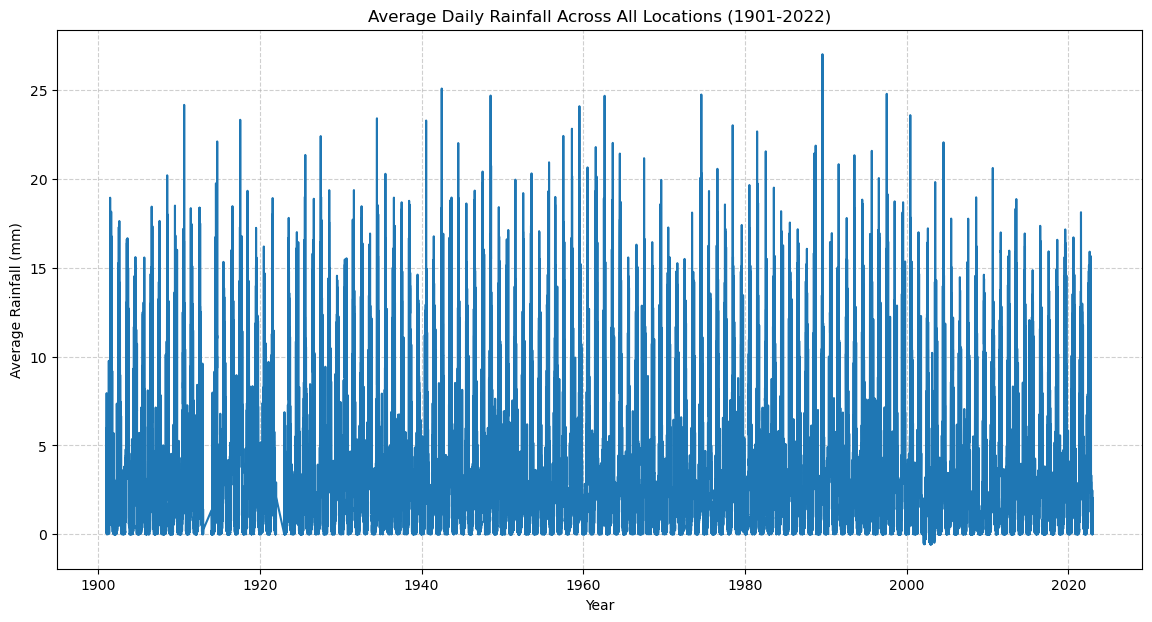

In [7]:
rainfall_time_series = ds['RAINFALL'].mean(dim=['LATITUDE', 'LONGITUDE'])

plt.figure(figsize=(14, 7))
rainfall_time_series.plot()
plt.title('Average Daily Rainfall Across All Locations (1901-2022)')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

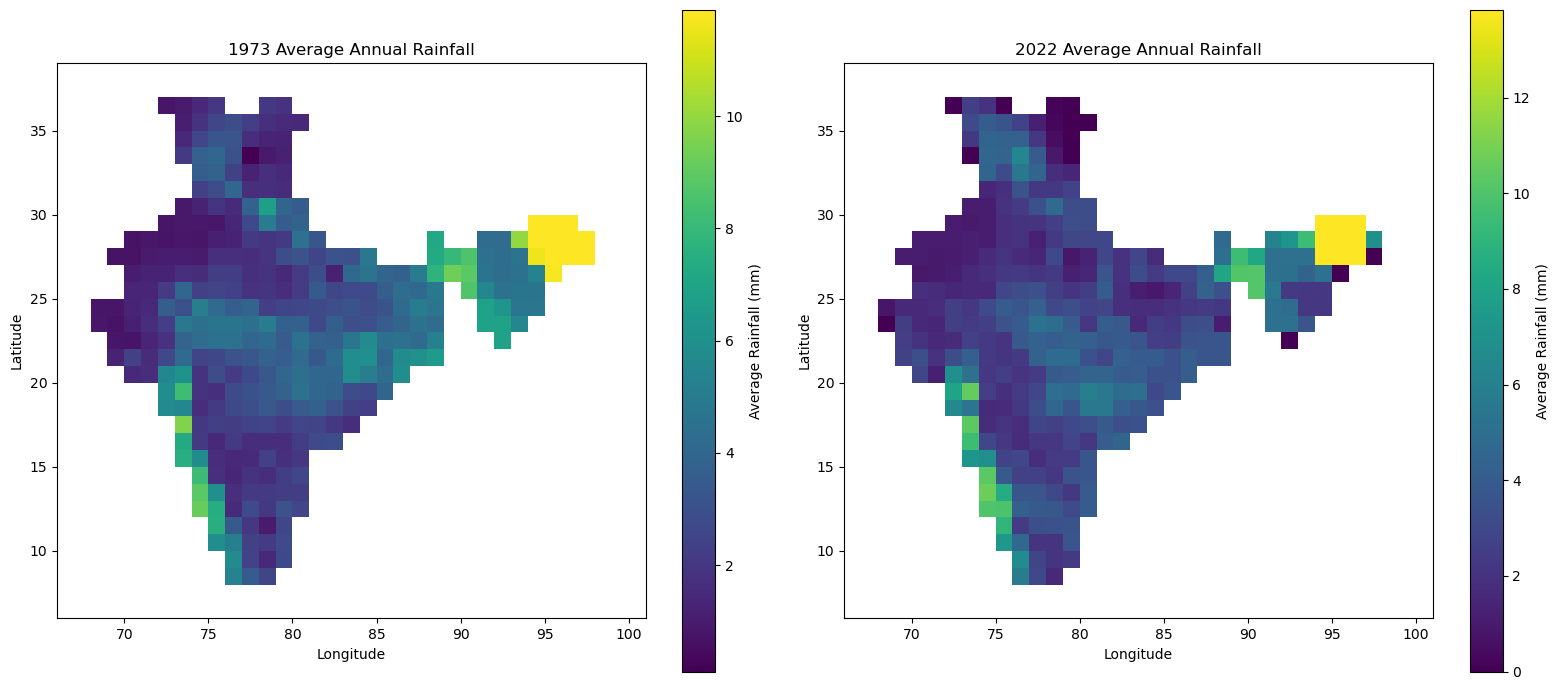

In [8]:
year_1973 = ds.sel(TIME='1973').mean(dim='TIME')
year_2022 = ds.sel(TIME='2022').mean(dim='TIME')

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

year_1973['RAINFALL'].plot(ax=axes[0], cmap='viridis', cbar_kwargs={'label': 'Average Rainfall (mm)'})
axes[0].set_title('1973 Average Annual Rainfall')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_aspect('equal', adjustable='box')


year_2022['RAINFALL'].plot(ax=axes[1], cmap='viridis', cbar_kwargs={'label': 'Average Rainfall (mm)'})
axes[1].set_title('2022 Average Annual Rainfall')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_aspect('equal', adjustable='box')


plt.tight_layout()
plt.show()

In [10]:
try:
    yearly_grouped = ds.groupby('TIME.year')
    yearly_mean = yearly_grouped.mean(dim=['TIME', 'LATITUDE', 'LONGITUDE'])['RAINFALL']
    yearly_median = yearly_grouped.median(dim=['TIME', 'LATITUDE', 'LONGITUDE'])['RAINFALL']
    yearly_std = yearly_grouped.std(dim=['TIME', 'LATITUDE', 'LONGITUDE'])['RAINFALL']

    summary_df = pd.DataFrame({
        'Mean Rainfall (mm)': yearly_mean.to_series(),
        'Median Rainfall (mm)': yearly_median.to_series(),
        'Std Dev (mm)': yearly_std.to_series()
    })


    print("Yearly Rainfall Statistics (averaged over all grid points):")
    print(summary_df.head(10)) # Print the first 10 years as a sample

except Exception as e:
    print(f"An error occurred: {e}")
    print("\nPlease ensure the 'TIME' coordinate and 'RAINFALL' data variable exist and are correctly formatted.")

Yearly Rainfall Statistics (averaged over all grid points):
      Mean Rainfall (mm)  Median Rainfall (mm)  Std Dev (mm)
year                                                        
1901            3.021536                   0.0     10.885925
1902            3.045460                   0.0     10.729975
1903            3.297094                   0.0     10.736200
1904            2.941922                   0.0     10.322897
1905            2.899936                   0.0     10.358841
1906            3.392595                   0.0     10.837996
1907            2.995668                   0.0     10.366696
1908            3.042098                   0.0     10.374463
1909            3.256116                   0.0     10.438076
1910            3.483196                   0.0     11.039184


In [11]:
import xarray as xr
import os
import glob
import pandas as pd

# Define the correct path to your data directory
data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"

# Use glob to create a sorted list of all .nc files
file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
matching_files = sorted(glob.glob(file_pattern))

print(f"Found {len(matching_files)} files to process.\n")

problematic_files = []

for file in matching_files:
    try:
        with xr.open_dataset(file) as ds_single:
            # A simple check to see if the main variable exists
            if 'RAINFALL' not in ds_single.data_vars:
                print(f"FAILED: '{os.path.basename(file)}' does not contain 'RAINFALL' variable.")
                problematic_files.append(file)
            # A simple check for the time dimension
            elif 'TIME' not in ds_single.dims:
                print(f"FAILED: '{os.path.basename(file)}' does not contain 'TIME' dimension.")
                problematic_files.append(file)
            # If you want to be verbose and see every success:
            # else:
            #     print(f"SUCCESS: Successfully opened '{os.path.basename(file)}'")

    except Exception as e:
        print(f"CRITICAL FAILURE: Could not open '{os.path.basename(file)}'. Error: {e}")
        problematic_files.append(file)

print("\n--- Diagnostic Complete ---")
if problematic_files:
    print("The following files may have issues:")
    for f in problematic_files:
        print(os.path.basename(f))
else:
    print("All files were opened successfully. The issue is likely with combining them.")

Found 122 files to process.


--- Diagnostic Complete ---
All files were opened successfully. The issue is likely with combining them.


In [12]:
import xarray as xr
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Robust Data Loading ---

# Define the correct path to your data directory
data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"

# Use glob to create a sorted list of all .nc files
file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
matching_files = sorted(glob.glob(file_pattern))

# A preprocess function to handle potential inconsistencies in files
def preprocess(ds):
    # This function will run on each file before it is combined.
    # We can add fixes here if we find specific issues.
    # For now, just ensuring the time coordinate is handled is enough.
    return ds

if matching_files:
    print(f"Loading {len(matching_files)} files...")
    # Load all NetCDF files using the preprocess function
    ds = xr.open_mfdataset(
        matching_files,
        combine='by_coords',
        preprocess=preprocess, # This makes loading more robust
        parallel=True
    )
    
    # Load data into memory to prevent issues with later calculations
    ds = ds.load()
    print("Data loaded successfully.")
    
    # Print the final dataset structure
    print("\nFinal Combined Dataset Structure:")
    print(ds)
else:
    print(f"No files matching the pattern found in {data_path}")

Loading 122 files...


RuntimeError: NetCDF: Not a valid ID

Found 122 files. Loading metadata...
Dataset metadata loaded successfully.

--- Initial Dataset Structure ---
<xarray.Dataset> Size: 412MB
Dimensions:    (TIME: 44560, LATITUDE: 33, LONGITUDE: 35)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 280B 66.5 67.5 68.5 69.5 ... 98.5 99.5 100.5
  * LATITUDE   (LATITUDE) float64 264B 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5
  * TIME       (TIME) datetime64[ns] 356kB 1901-01-01 1901-01-02 ... 2022-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 412MB dask.array<chunksize=(365, 33, 35), meta=np.ndarray>
Attributes:
    history:      FERRET V7.5 (optimized) 28-Mar-22
    Conventions:  CF-1.6

Setting up yearly aggregation...
Computing yearly total rainfall... This may take a few moments.
Calculation complete.

--- Annual Rainfall Summary ---
      Total Rainfall (mm)  Anomaly (mm)
year                                   
1901        393721.240468 -46394.052146
1902        396838.652087 -43276.640527
1903        429627.8870

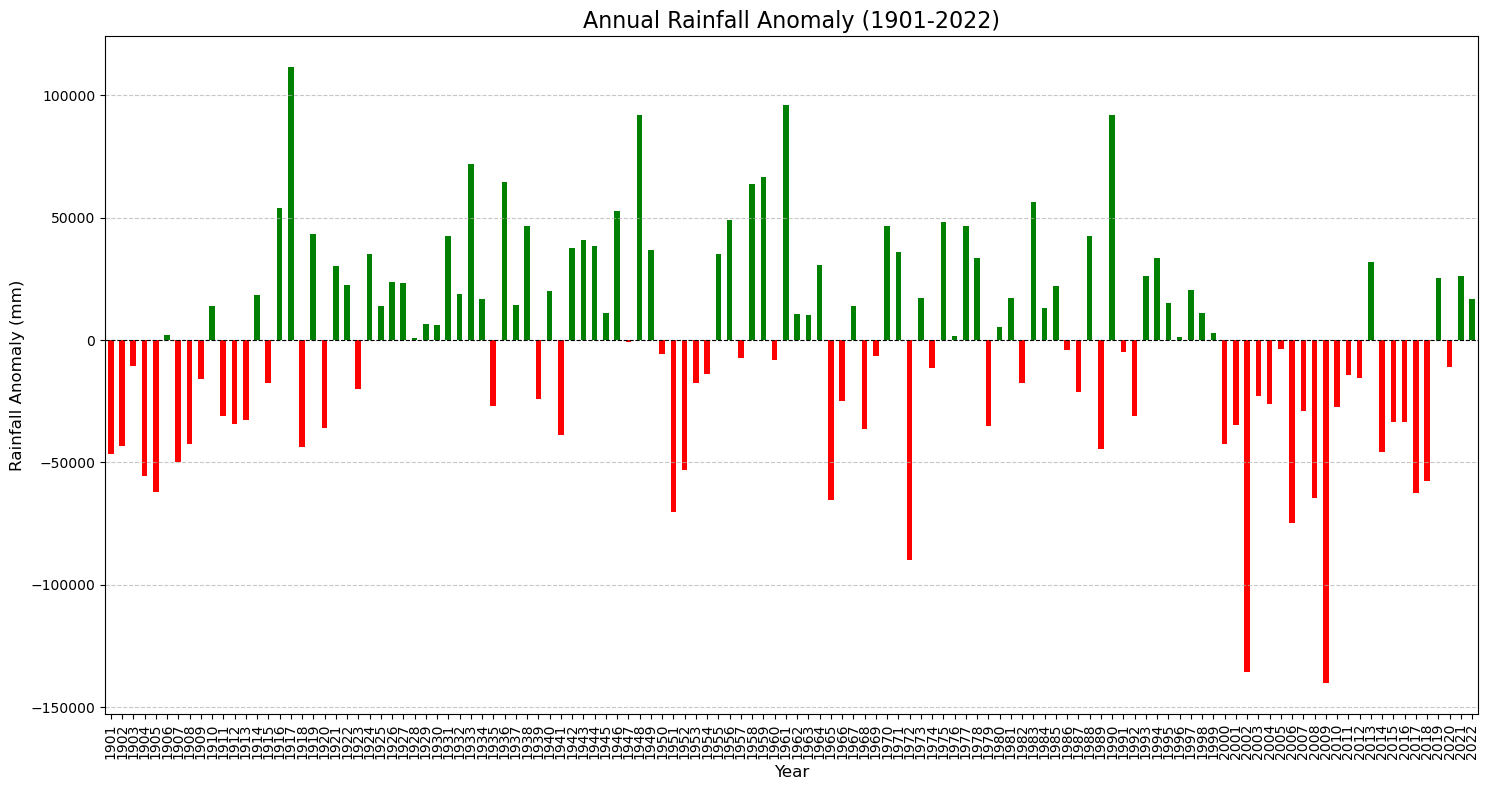

In [13]:
import xarray as xr
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

try:
   
    data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"

    file_list = sorted(glob.glob(os.path.join(data_path, "*.nc")))

    if not file_list:
        raise FileNotFoundError("No .nc files found. Please check the data_path.")

    print(f"Found {len(file_list)} files. Loading metadata...")

    ds = xr.open_mfdataset(file_list, combine='by_coords', parallel=True)
    
    print("Dataset metadata loaded successfully.")
    print("\n--- Initial Dataset Structure ---")
    print(ds)

    ds['TIME'] = pd.to_datetime(ds['TIME'].values)

    print("\nSetting up yearly aggregation...")
    yearly_total_rainfall_lazy = ds.groupby('TIME.year').sum(dim=['TIME', 'LATITUDE', 'LONGITUDE'])['RAINFALL']

    print("Computing yearly total rainfall... This may take a few moments.")
    yearly_total_rainfall = yearly_total_rainfall_lazy.compute()
    print("Calculation complete.")

    yearly_total_rainfall_series = yearly_total_rainfall.to_series()
    climatological_mean = yearly_total_rainfall_series.mean()
    yearly_anomaly = yearly_total_rainfall_series - climatological_mean

    summary_df = pd.DataFrame({
        'Total Rainfall (mm)': yearly_total_rainfall_series,
        'Anomaly (mm)': yearly_anomaly
    })
    print("\n--- Annual Rainfall Summary ---")
    print(summary_df)


    print("\nGenerating plot...")
    plt.figure(figsize=(15, 8))

    bar_colors = (yearly_anomaly > 0).map({True: 'g', False: 'r'})
    yearly_anomaly.plot.bar(color=bar_colors)
    
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.title('Annual Rainfall Anomaly (1901-2022)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Rainfall Anomaly (mm)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")

In [16]:
# --- Monthly Average Rainfall ---
# Group the data by calendar month and calculate the mean rainfall for each month
monthly_avg_rainfall = ds['RAINFALL'].groupby('TIME.month').mean()

# Now, calculate the average over the spatial dimensions to get a single value per month
monthly_climatology = monthly_avg_rainfall.mean(dim=['LATITUDE', 'LONGITUDE'])

# Plot the results
plt.figure(figsize=(12, 6))
monthly_climatology.plot.bar()
plt.title('Average Monthly Rainfall Climatology (1901-2022)')
plt.xlabel('Month')
plt.ylabel('Average Daily Rainfall (mm)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

AttributeError: 'DataArrayPlotAccessor' object has no attribute 'bar'

<Figure size 1200x600 with 0 Axes>

In [17]:
monthly_avg_rainfall = ds['RAINFALL'].groupby('TIME.month').mean()

monthly_climatology = monthly_avg_rainfall.mean(dim=['LATITUDE', 'LONGITUDE'])
plt.figure(figsize=(12, 6))

monthly_climatology.to_series().plot.bar()

plt.title('Average Monthly Rainfall Climatology (1901-2022)')
plt.xlabel('Month')
plt.ylabel('Average Daily Rainfall (mm)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

RuntimeError: NetCDF: Not a valid ID

<Figure size 1200x600 with 0 Axes>

In [18]:
import xarray as xr
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"
file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
matching_files = sorted(glob.glob(file_pattern))

with xr.open_mfdataset(matching_files, combine='by_coords', parallel=True) as ds:

    ds['TIME'] = pd.to_datetime(ds['TIME'].values)

    monthly_avg_rainfall = ds['RAINFALL'].groupby('TIME.month').mean()
    
    monthly_climatology = monthly_avg_rainfall.mean(dim=['LATITUDE', 'LONGITUDE']).load()

plt.figure(figsize=(12, 6))
monthly_climatology.to_series().plot.bar()
plt.title('Average Monthly Rainfall Climatology (1901-2022)')
plt.xlabel('Month')
plt.ylabel('Average Daily Rainfall (mm)')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RuntimeError: NetCDF: Not a valid ID

--- Starting Robust One-by-One File Processing ---
Found 122 files.
Processing file 1/122: imd_rf_1x1_1901.nc
Processing file 2/122: imd_rf_1x1_1902.nc
Processing file 3/122: imd_rf_1x1_1903.nc
Processing file 4/122: imd_rf_1x1_1904.nc
Processing file 5/122: imd_rf_1x1_1905.nc
Processing file 6/122: imd_rf_1x1_1906.nc
Processing file 7/122: imd_rf_1x1_1907.nc
Processing file 8/122: imd_rf_1x1_1908.nc
Processing file 9/122: imd_rf_1x1_1909.nc
Processing file 10/122: imd_rf_1x1_1910.nc
Processing file 11/122: imd_rf_1x1_1911.nc
Processing file 12/122: imd_rf_1x1_1912.nc
Processing file 13/122: imd_rf_1x1_1913.nc
Processing file 14/122: imd_rf_1x1_1914.nc
Processing file 15/122: imd_rf_1x1_1915.nc
Processing file 16/122: imd_rf_1x1_1916.nc
Processing file 17/122: imd_rf_1x1_1917.nc
Processing file 18/122: imd_rf_1x1_1918.nc
Processing file 19/122: imd_rf_1x1_1919.nc
Processing file 20/122: imd_rf_1x1_1920.nc
Processing file 21/122: imd_rf_1x1_1921.nc
Processing file 22/122: imd_rf_1x1_192

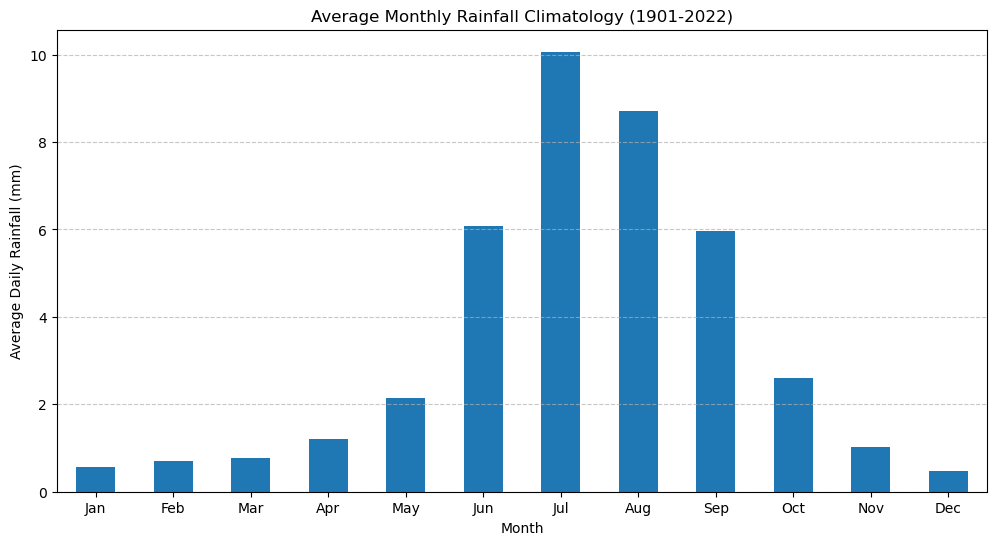

In [19]:
import xarray as xr
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

print("--- Starting Robust One-by-One File Processing ---")

try:
    data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"
    file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
    matching_files = sorted(glob.glob(file_pattern))

    if not matching_files:
        raise FileNotFoundError("No .nc files found. Please double-check the data_path.")

    print(f"Found {len(matching_files)} files.")
    all_monthly_averages = []

   
    for i, file_path in enumerate(matching_files):
        print(f"Processing file {i+1}/{len(matching_files)}: {os.path.basename(file_path)}")
        try:
            
            with xr.open_dataset(file_path) as ds:
                # Ensure the TIME coordinate is in datetime format
                ds['TIME'] = pd.to_datetime(ds['TIME'].values)
                
                monthly_avg_for_file = ds['RAINFALL'].groupby('TIME.month').mean()
                 all_monthly_averages.append(monthly_avg_for_file)
        except Exception as e:
            print(f"  --> WARNING: Could not process {os.path.basename(file_path)}. Error: {e}")

    if all_monthly_averages:
        print("\nCombining results from all processed files...")

        combined_monthly_data = xr.concat(all_monthly_averages, dim='year')

        print("Calculating final climatology...")
        monthly_climatology = combined_monthly_data.mean(dim=['year', 'LATITUDE', 'LONGITUDE'])


        print("Generating plot...")
        plt.figure(figsize=(12, 6))
        monthly_climatology.to_series().plot.bar()
        plt.title('Average Monthly Rainfall Climatology (1901-2022)')
        plt.xlabel('Month')
        plt.ylabel('Average Daily Rainfall (mm)')
        plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("\nNo files were processed successfully.")

except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

C:\Users\adars\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:10730: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\adars\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:10744: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\adars\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:10750: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Trend Analysis (1901-2022):
Slope: nan mm/year
P-value: nan


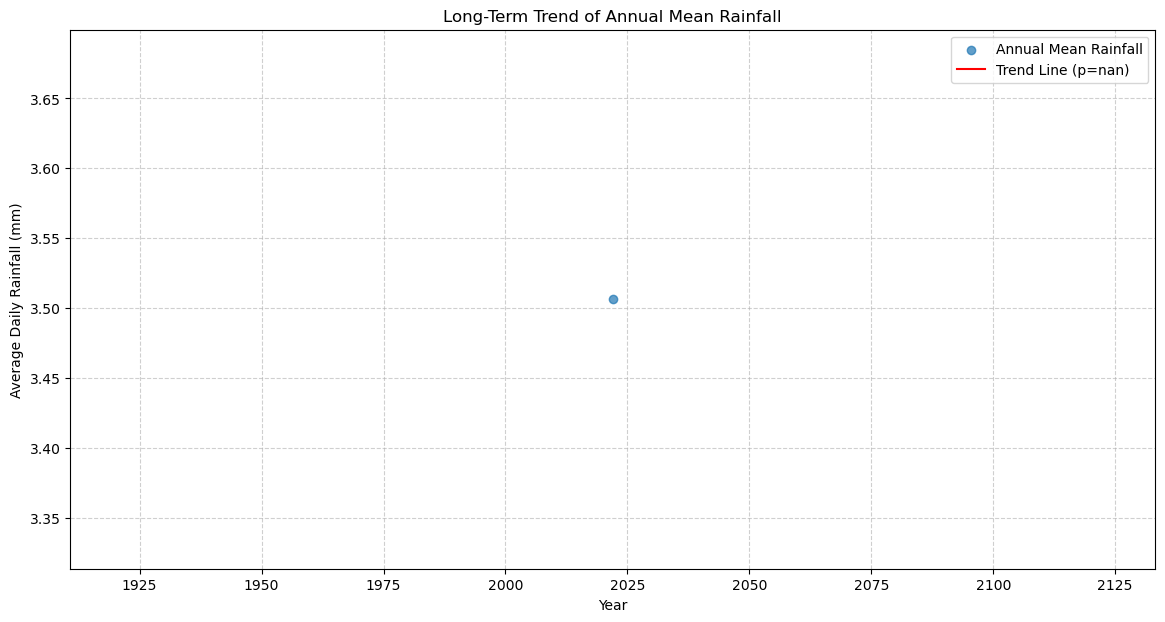


The trend is not statistically significant (p >= 0.05).


In [20]:
from scipy.stats import linregress

annual_mean_rainfall = ds['RAINFALL'].groupby('TIME.year').mean()
spatial_annual_mean = annual_mean_rainfall.mean(dim=['LATITUDE', 'LONGITUDE'])

years = spatial_annual_mean['year'].values
rainfall_values = spatial_annual_mean.values

slope, intercept, r_value, p_value, std_err = linregress(years, rainfall_values)

print(f"Trend Analysis (1901-2022):")
print(f"Slope: {slope:.4f} mm/year")
print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(14, 7))
plt.scatter(years, rainfall_values, label='Annual Mean Rainfall', alpha=0.7)
plt.plot(years, intercept + slope*years, 'r', label=f'Trend Line (p={p_value:.3f})')
plt.title('Long-Term Trend of Annual Mean Rainfall')
plt.xlabel('Year')
plt.ylabel('Average Daily Rainfall (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

if p_value < 0.05:
    print("\nThe trend is statistically significant (p < 0.05).")
else:
    print("\nThe trend is not statistically significant (p >= 0.05).")

In [21]:
import xarray as xr
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

try:
    data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"
    file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
    matching_files = sorted(glob.glob(file_pattern))

    if not matching_files:
        raise FileNotFoundError("No .nc files found in the directory.")

    print(f"Found {len(matching_files)} files. Loading data for trend analysis...")


    with xr.open_mfdataset(matching_files, combine='by_coords', parallel=True) as ds:
        
        ds['TIME'] = pd.to_datetime(ds['TIME'].values)
        annual_mean_rainfall = ds['RAINFALL'].groupby('TIME.year').mean()

        spatial_annual_mean = annual_mean_rainfall.mean(dim=['LATITUDE', 'LONGITUDE']).load()
        print("Yearly average rainfall calculated successfully.")

    years = spatial_annual_mean['year'].values
    rainfall_values = spatial_annual_mean.values

 
    slope, intercept, r_value, p_value, std_err = linregress(years, rainfall_values)

    print(f"\nTrend Analysis (1901-2022):")
    print(f"Slope: {slope:.4f} mm/year")
    print(f"P-value: {p_value:.4f}")


    plt.figure(figsize=(14, 7))
    plt.scatter(years, rainfall_values, label='Annual Mean Rainfall', alpha=0.7, color='blue')
    plt.plot(years, intercept + slope*years, 'r', linewidth=2, label=f'Trend Line (p={p_value:.3f})')
    plt.title('Long-Term Trend of Annual Mean Rainfall')
    plt.xlabel('Year')
    plt.ylabel('Average Daily Rainfall (mm)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    if p_value < 0.05:
        print("\nThe trend is statistically significant (p < 0.05).")
    else:
        print("\nThe trend is not statistically significant (p >= 0.05).")

except Exception as e:
    print(f"An error occurred: {e}")

Found 122 files. Loading data for trend analysis...
An error occurred: NetCDF: Not a valid ID


In [23]:
import pandas as pd
import os
import glob

folder_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise'

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

if not csv_files:
    print(f"ERROR: No CSV files were found in the folder: {folder_path}")
else:
    print(f"Found {len(csv_files)} CSV files to combine.")
   
    list_of_dataframes = []
    for f in csv_files:
       
        city_name = os.path.basename(f).replace('.csv', '')
        
        df = pd.read_csv(f)
        df['city'] = city_name  # Add a new 'city' column
        list_of_dataframes.append(df)

    all_cities_df = pd.concat(list_of_dataframes, ignore_index=True)


    print("\n--- Combined DataFrame ---")
    print("First 5 rows:")
    print(all_cities_df.head())
    
    print("\nLast 5 rows (to see data from different files):")
    print(all_cities_df.tail())

    print("\nCombined DataFrame Info:")
    all_cities_df.info()

Found 8 CSV files to combine.

--- Combined DataFrame ---
First 5 rows:
         Date  True_Bins  Predicted_Bins_NN                           city
0  2012-05-01        1.0                1.0  predictions_results_Ahmedabad
1  2012-05-02        1.0                1.0  predictions_results_Ahmedabad
2  2012-05-03        1.0                1.0  predictions_results_Ahmedabad
3  2012-05-04        1.0                1.0  predictions_results_Ahmedabad
4  2012-05-05        1.0                1.0  predictions_results_Ahmedabad

Last 5 rows (to see data from different files):
             Date  True_Bins  Predicted_Bins_NN  \
13459  2022-09-26        5.0                3.0   
13460  2022-09-27        4.0                3.0   
13461  2022-09-28        1.0                3.0   
13462  2022-09-29        5.0                2.0   
13463  2022-09-30        5.0                3.0   

                                     city  
13459  predictions_results_Vishakhapatnam  
13460  predictions_results_Vishakh

In [24]:
import os
import glob


csv_folder_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise'

csv_files = sorted(glob.glob(os.path.join(csv_folder_path, "*.csv")))

if csv_files:
    print(f"Found {len(csv_files)} CSV files in the directory:\n")
    for file_path in csv_files:
        print(os.path.basename(file_path))
else:
    print(f"No .csv files were found in the folder: {csv_folder_path}")

Found 8 CSV files in the directory:

predictions_results_Ahmedabad.csv
predictions_results_Bangalore.csv
predictions_results_Bhopal.csv
predictions_results_Delhi.csv
predictions_results_Hyderabad.csv
predictions_results_Kochi.csv
predictions_results_Mumbai.csv
predictions_results_Vishakhapatnam.csv


In [25]:
import pandas as pd

print("--- First 5 Rows ---")
print(all_cities_df.head())

print("\n--- DataFrame Info ---")
all_cities_df.info()

print("\n--- Missing Values Count ---")
print(all_cities_df.isnull().sum())

print("\n--- Descriptive Statistics ---")
print(all_cities_df.describe())

--- First 5 Rows ---
         Date  True_Bins  Predicted_Bins_NN                           city
0  2012-05-01        1.0                1.0  predictions_results_Ahmedabad
1  2012-05-02        1.0                1.0  predictions_results_Ahmedabad
2  2012-05-03        1.0                1.0  predictions_results_Ahmedabad
3  2012-05-04        1.0                1.0  predictions_results_Ahmedabad
4  2012-05-05        1.0                1.0  predictions_results_Ahmedabad

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               13464 non-null  object 
 1   True_Bins          13464 non-null  float64
 2   Predicted_Bins_NN  13464 non-null  float64
 3   city               13464 non-null  object 
dtypes: float64(2), object(2)
memory usage: 420.9+ KB

--- Missing Values Count ---
Date                 0
Tr

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(all_cities_df['temperature'], kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

KeyError: 'temperature'

<Figure size 1000x600 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

print(all_cities_df.columns)

plt.figure(figsize=(10, 6))
sns.histplot(all_cities_df['temp'], kde=True, bins=30)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Index(['Date', 'True_Bins', 'Predicted_Bins_NN', 'city'], dtype='object')


KeyError: 'temp'

<Figure size 1000x600 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

print(all_cities_df.columns)

plt.figure(figsize=(10, 6))
sns.histplot(all_cities_df['temperature'], kde=True, bins=30)  
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Index(['Date', 'True_Bins', 'Predicted_Bins_NN', 'city'], dtype='object')


KeyError: 'temperature'

<Figure size 1000x600 with 0 Axes>

In [29]:
print("The available columns in your DataFrame are:")
print(all_cities_df.columns)


The available columns in your DataFrame are:
Index(['Date', 'True_Bins', 'Predicted_Bins_NN', 'city'], dtype='object')


NameError: name 'df_delhi' is not defined

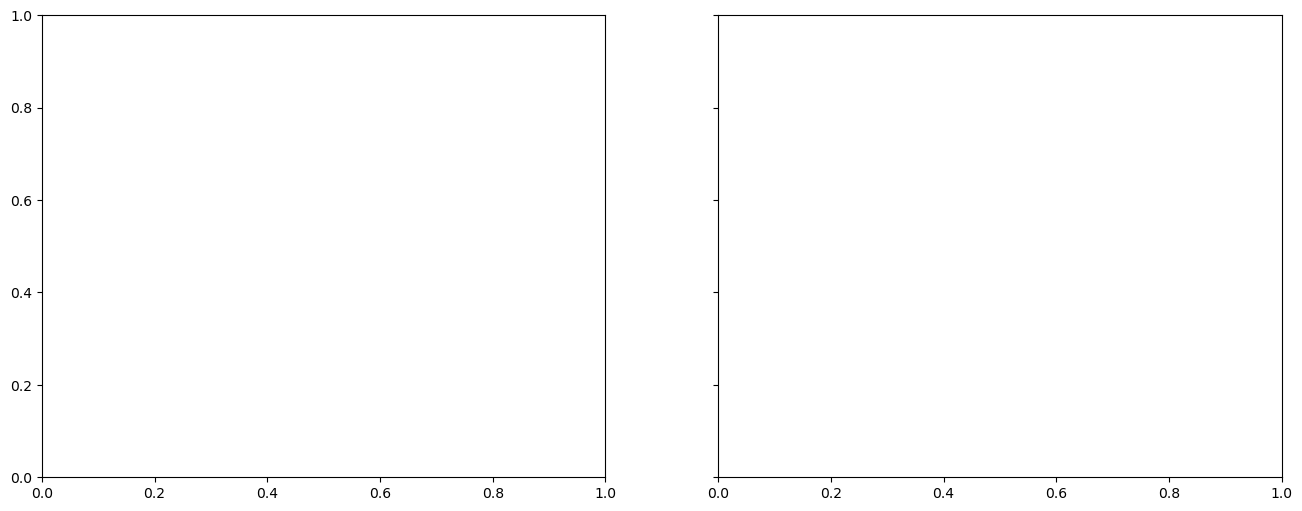

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(x='True_Bins', data=df_delhi, ax=axes[0], color='skyblue', order=[1, 2, 3, 4])
axes[0].set_title('Distribution of Actual Values (True_Bins)', fontsize=14)
axes[0].set_xlabel('Bin Category', fontsize=12)
axes[0].set_ylabel('Number of Days', fontsize=12)

sns.countplot(x='Predicted_Bins_NN', data=df_delhi, ax=axes[1], color='salmon', order=[1, 2, 3, 4])
axes[1].set_title('Distribution of Model Predictions (Predicted_Bins_NN)', fontsize=14)
axes[1].set_xlabel('Bin Category', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for cleaner look

plt.suptitle('Comparison of Actual vs. Predicted Bin Frequencies', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

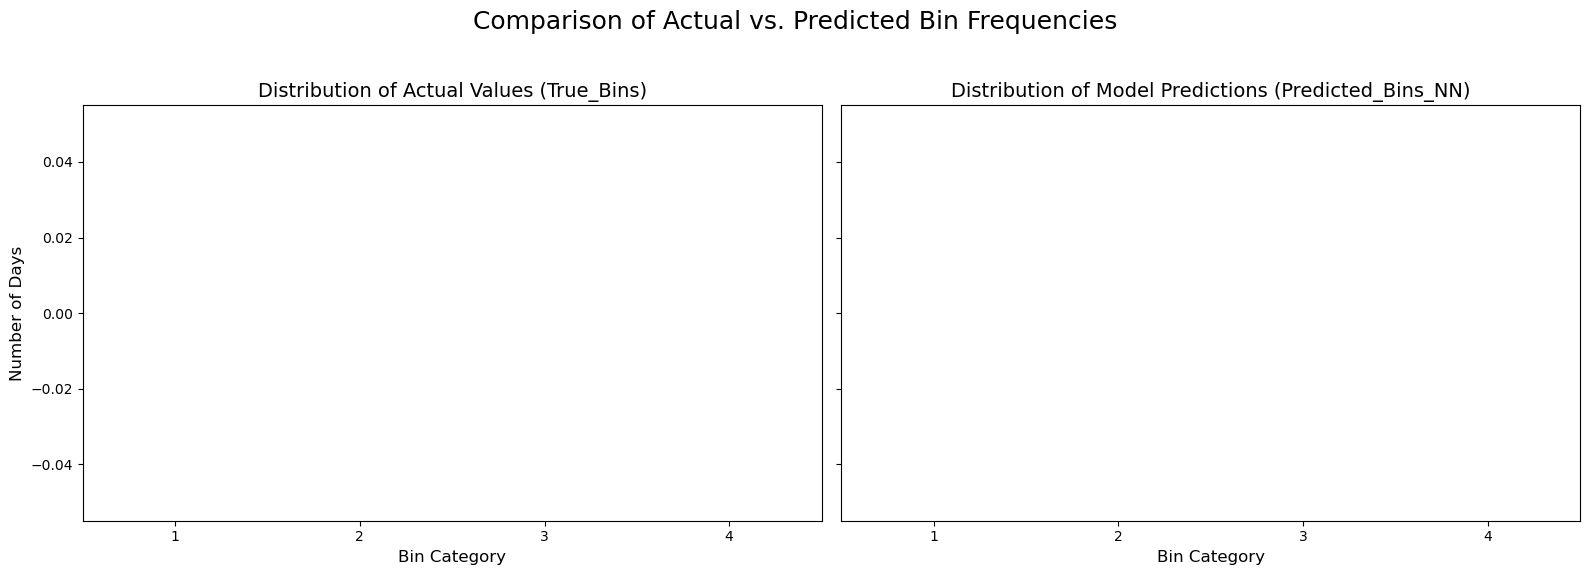

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_delhi = pd.read_csv('C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv')

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(x='True_Bins', data=df_delhi, ax=axes[0], color='skyblue', order=[1, 2, 3, 4])
axes[0].set_title('Distribution of Actual Values (True_Bins)', fontsize=14)
axes[0].set_xlabel('Bin Category', fontsize=12)
axes[0].set_ylabel('Number of Days', fontsize=12)

sns.countplot(x='Predicted_Bins_NN', data=df_delhi, ax=axes[1], color='salmon', order=[1, 2, 3, 4])
axes[1].set_title('Distribution of Model Predictions (Predicted_Bins_NN)', fontsize=14)
axes[1].set_xlabel('Bin Category', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for cleaner look

plt.suptitle('Comparison of Actual vs. Predicted Bin Frequencies', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Successfully loaded predictions_results_Delhi.csv


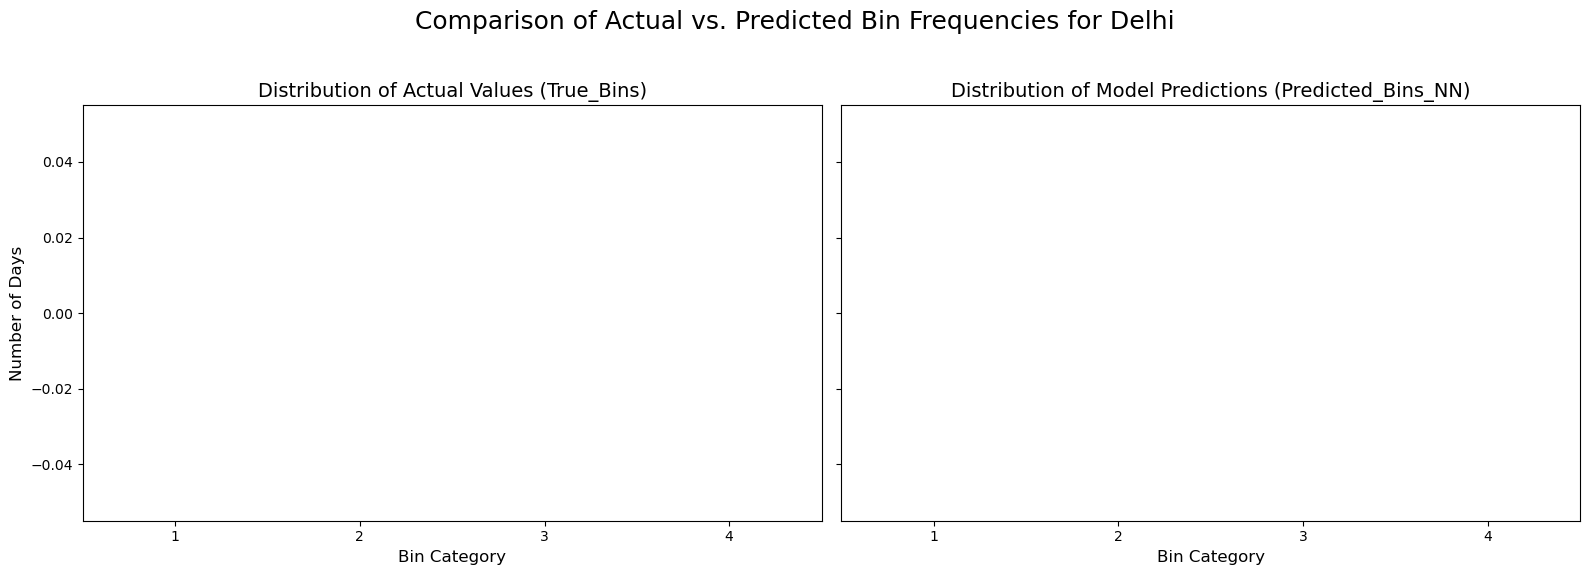

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'

try:
    df_delhi = pd.read_csv(file_path)
    print(f"Successfully loaded {os.path.basename(file_path)}")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    sns.countplot(x='True_Bins', data=df_delhi, ax=axes[0], color='skyblue', order=[1, 2, 3, 4])
    axes[0].set_title('Distribution of Actual Values (True_Bins)', fontsize=14)
    axes[0].set_xlabel('Bin Category', fontsize=12)
    axes[0].set_ylabel('Number of Days', fontsize=12)

    sns.countplot(x='Predicted_Bins_NN', data=df_delhi, ax=axes[1], color='salmon', order=[1, 2, 3, 4])
    axes[1].set_title('Distribution of Model Predictions (Predicted_Bins_NN)', fontsize=14)
    axes[1].set_xlabel('Bin Category', fontsize=12)
    axes[1].set_ylabel('') # Hide y-label for cleaner look

    plt.suptitle('Comparison of Actual vs. Predicted Bin Frequencies for Delhi', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print(f"ERROR: The file was not found at the path: {file_path}")
    print("Please make sure the filename is correct and it is inside the 'City_wise' folder.")
except Exception as e:
    print(f"An error occurred: {e}")

In [38]:
import pandas as pd

# Load the data again to be sure
file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)

# Use value_counts() to get the number of times each bin appears
true_bin_counts = df_delhi['True_Bins'].value_counts()
predicted_bin_counts = df_delhi['Predicted_Bins_NN'].value_counts()

print("--- Distribution of Actual Values (True_Bins) ---")
print(true_bin_counts)

print("\n--- Distribution of Predicted Values (Predicted_Bins_NN) ---")
print(predicted_bin_counts)

--- Distribution of Actual Values (True_Bins) ---
True_Bins
1.0    1189
2.0     203
3.0     196
4.0      95
Name: count, dtype: int64

--- Distribution of Predicted Values (Predicted_Bins_NN) ---
Predicted_Bins_NN
1.0    1008
2.0     613
3.0      62
Name: count, dtype: int64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='True_Bins', data=df_delhi, ax=axes[0], color='skyblue', order=[1, 2, 3, 4])
axes[0].set_title('Distribution of Actual Values (Log Scale)', fontsize=14)
axes[0].set_xlabel('Bin Category', fontsize=12)
axes[0].set_ylabel('Number of Days (Log Scale)', fontsize=12)
axes[0].set_yscale('log')

sns.countplot(x='Predicted_Bins_NN', data=df_delhi, ax=axes[1], color='salmon', order=[1, 2, 3, 4])
axes[1].set_title('Distribution of Model Predictions (Log Scale)', fontsize=14)
axes[1].set_xlabel('Bin Category', fontsize=12)
axes[1].set_ylabel('') 
axes[1].set_yscale('log') 

plt.suptitle('Comparison of Bin Frequencies (Logarithmic Scale)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x00000205B39A5620> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1600x600 with 2 Axes>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(x='True_Bins', data=df_delhi, ax=axes[0], color='skyblue', order=[1, 2, 3, 4])
axes[0].set_title('Distribution of Actual Values (Log Scale)', fontsize=14)
axes[0].set_xlabel('Bin Category', fontsize=12)
axes[0].set_ylabel('Number of Days (Log Scale)', fontsize=12)
axes[0].set_yscale('log') 

sns.countplot(x='Predicted_Bins_NN', data=df_delhi, ax=axes[1], color='salmon', order=[1, 2, 3, 4])
axes[1].set_title('Distribution of Model Predictions (Log Scale)', fontsize=14)
axes[1].set_xlabel('Bin Category', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for cleaner look
axes[1].set_yscale('log') # This changes the scale to make small bars visible

plt.suptitle('Comparison of Bin Frequencies (Logarithmic Scale)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x00000205B39A5620> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1600x600 with 2 Axes>

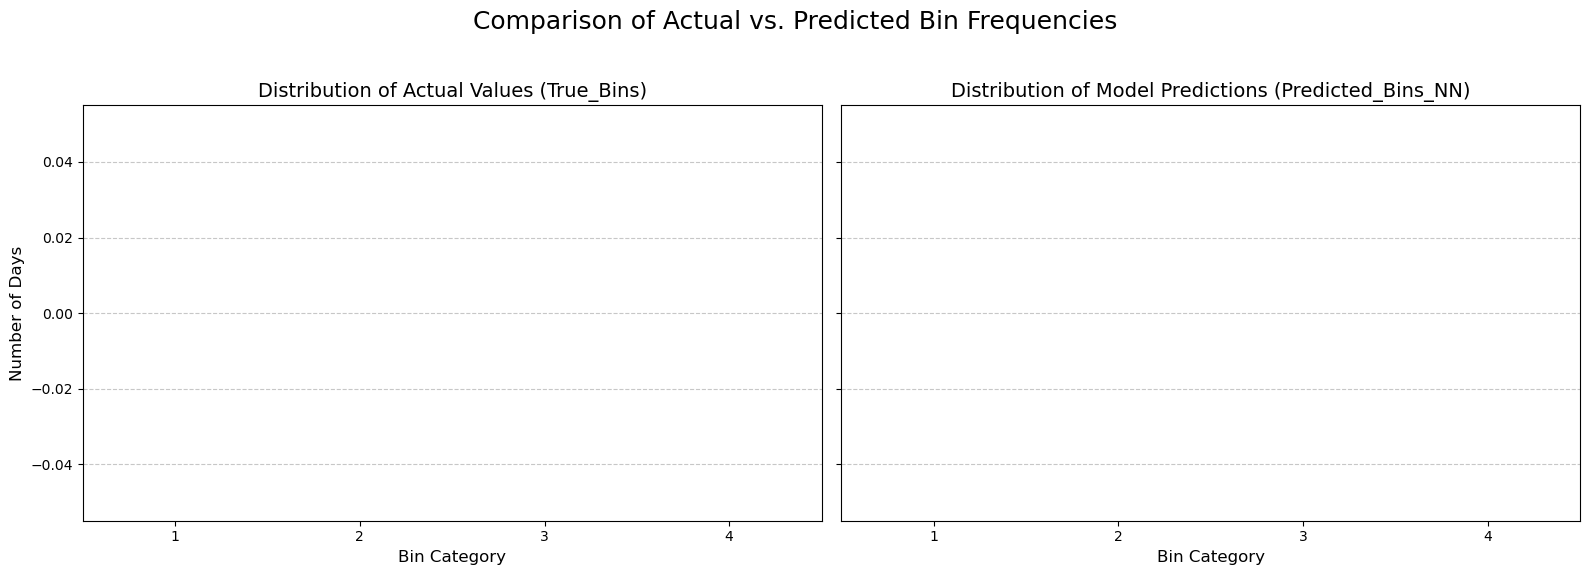

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(x='True_Bins', data=df_delhi, ax=axes[0], color='skyblue', order=[1, 2, 3, 4])
axes[0].set_title('Distribution of Actual Values (True_Bins)', fontsize=14)
axes[0].set_xlabel('Bin Category', fontsize=12)
axes[0].set_ylabel('Number of Days', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.countplot(x='Predicted_Bins_NN', data=df_delhi, ax=axes[1], color='salmon', order=[1, 2, 3, 4])
axes[1].set_title('Distribution of Model Predictions (Predicted_Bins_NN)', fontsize=14)
axes[1].set_xlabel('Bin Category', fontsize=12)
axes[1].set_ylabel('') # Hide y-label for cleaner look
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.suptitle('Comparison of Actual vs. Predicted Bin Frequencies', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

--- Confusion Matrix ---
            Predicted 1.0  Predicted 2.0  Predicted 3.0  Predicted 4.0
Actual 1.0            842            331             16              0
Actual 2.0             85            105             13              0
Actual 3.0             60            120             16              0
Actual 4.0             21             57             17              0


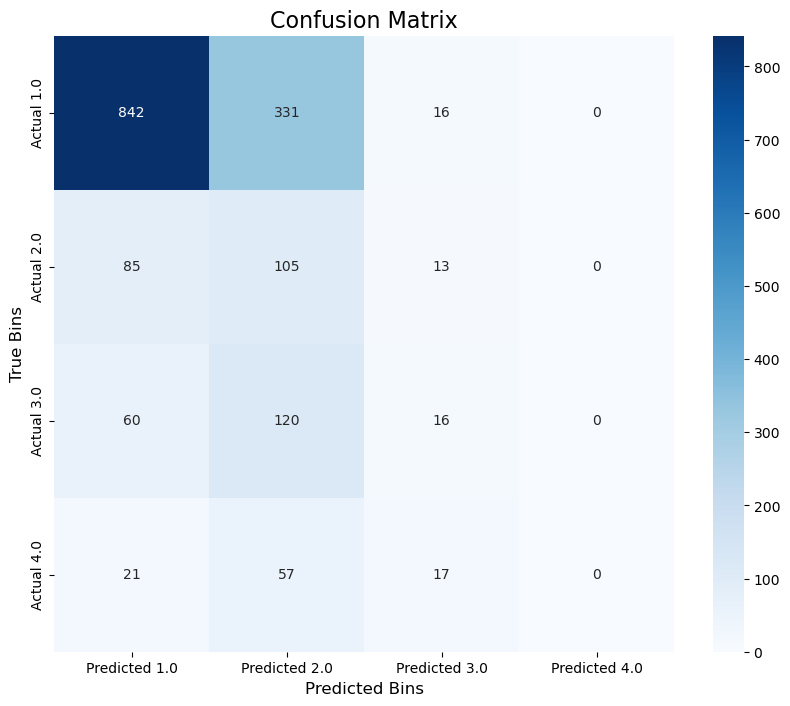

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)

y_true = df_delhi['True_Bins']
y_pred = df_delhi['Predicted_Bins_NN']


labels = sorted(df_delhi['True_Bins'].unique())


cm = confusion_matrix(y_true, y_pred, labels=labels)
cm_df = pd.DataFrame(cm,
                     index=[f'Actual {i}' for i in labels], 
                     columns=[f'Predicted {i}' for i in labels])

print("--- Confusion Matrix ---")
print(cm_df)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Bins', fontsize=12)
plt.ylabel('True Bins', fontsize=12)
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\2513815298.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy = df_delhi.groupby('Year').apply(


--- Model Accuracy Per Year ---
Year
2012    64.052288
2013    60.130719
2014    64.705882
2015    62.745098
2016    55.555556
2017    46.405229
2018    57.516340
2019    53.594771
2020    49.019608
2021    49.673203
2022    66.013072
dtype: float64


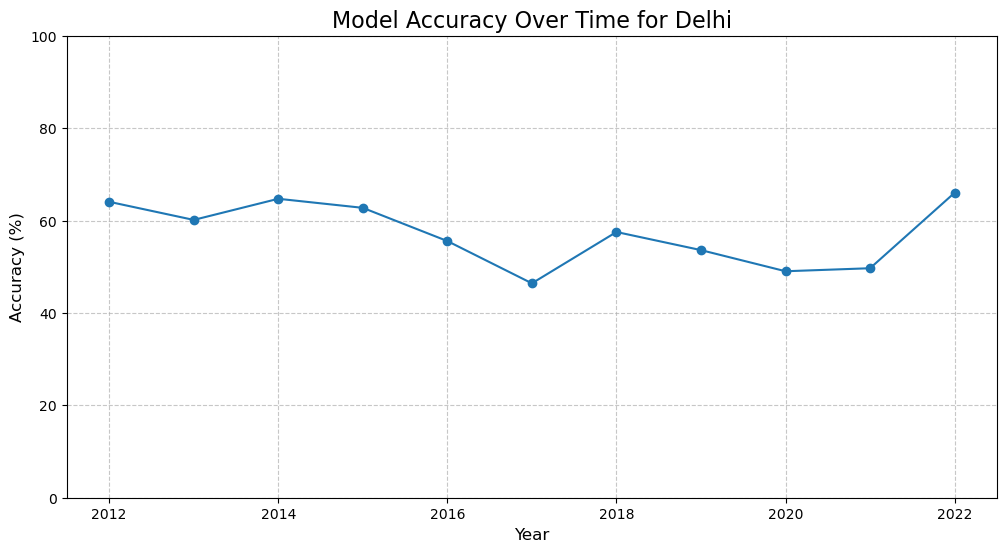

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])

df_delhi['Year'] = df_delhi['Date'].dt.year

yearly_accuracy = df_delhi.groupby('Year').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

print("--- Model Accuracy Per Year ---")
print(yearly_accuracy)

plt.figure(figsize=(12, 6))
yearly_accuracy.plot(marker='o', linestyle='-')
plt.title('Model Accuracy Over Time for Delhi', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\3611968328.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy = df_hyderabad.groupby('Year').apply(


--- Model Accuracy Per Year ---
Year
2012    35.947712
2013    24.836601
2014    25.490196
2015    37.908497
2016    24.183007
2017    28.104575
2018    20.915033
2019    22.875817
2020    24.183007
2021    18.954248
2022    27.450980
dtype: float64


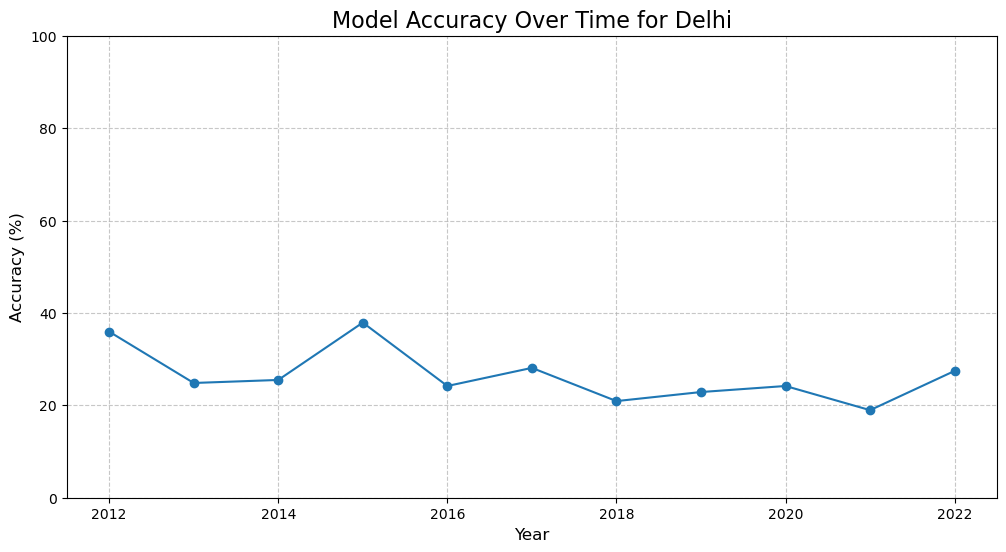

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Hyderabad.csv'
df_hyderabad = pd.read_csv(file_path)
df_hyderabad['Date'] = pd.to_datetime(df_hyderabad['Date'])

df_hyderabad['Year'] = df_hyderabad['Date'].dt.year

yearly_accuracy = df_hyderabad.groupby('Year').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

print("--- Model Accuracy Per Year ---")
print(yearly_accuracy)

plt.figure(figsize=(12, 6))
yearly_accuracy.plot(marker='o', linestyle='-')
plt.title('Model Accuracy Over Time for Delhi', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\657564270.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy = df_bangalore.groupby('Year').apply(


--- Model Accuracy Per Year ---
Year
2012    10.457516
2013     9.803922
2014     7.843137
2015     8.496732
2016    13.071895
2017     9.803922
2018    18.300654
2019    15.032680
2020    16.339869
2021    18.300654
2022    15.686275
dtype: float64


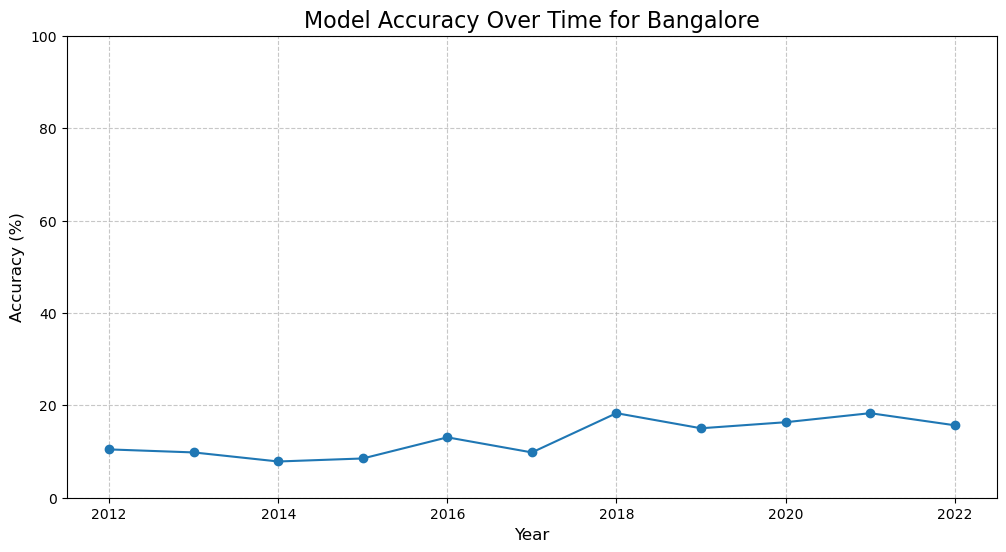

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Bangalore.csv'
df_bangalore = pd.read_csv(file_path)
df_bangalore['Date'] = pd.to_datetime(df_bangalore['Date'])

df_bangalore['Year'] = df_bangalore['Date'].dt.year


yearly_accuracy = df_bangalore.groupby('Year').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

print("--- Model Accuracy Per Year ---")
print(yearly_accuracy)

plt.figure(figsize=(12, 6))
yearly_accuracy.plot(marker='o', linestyle='-')
plt.title('Model Accuracy Over Time for Bangalore', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\3467724172.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy_mumbai = df_mumbai.groupby('Year').apply(


--- Model Accuracy Per Year (Mumbai) ---
Year
2012    46.405229
2013    41.176471
2014    49.673203
2015    53.594771
2016    39.869281
2017    42.483660
2018    45.751634
2019    42.483660
2020    36.601307
2021    35.294118
2022    41.830065
dtype: float64


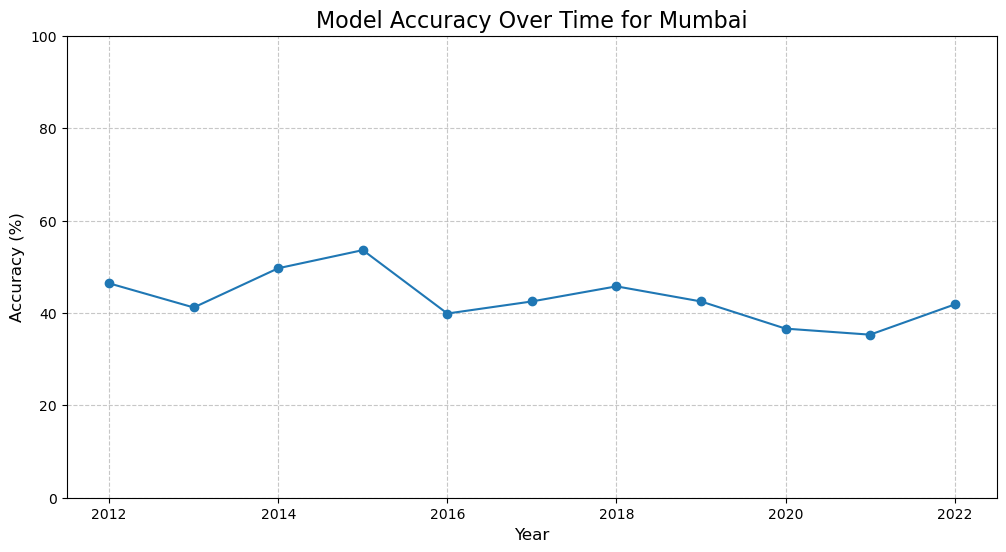

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_mumbai = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Mumbai.csv'
try:
    df_mumbai = pd.read_csv(file_path_mumbai)
    df_mumbai['Date'] = pd.to_datetime(df_mumbai['Date'])

    
    df_mumbai['Year'] = df_mumbai['Date'].dt.year
    yearly_accuracy_mumbai = df_mumbai.groupby('Year').apply(
        lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
    )

    print("--- Model Accuracy Per Year (Mumbai) ---")
    print(yearly_accuracy_mumbai)

  
    plt.figure(figsize=(12, 6))
    yearly_accuracy_mumbai.plot(marker='o', linestyle='-')
    plt.title('Model Accuracy Over Time for Mumbai', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_mumbai}")
except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\3793980920.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy_bhopal = df_bhopal.groupby('Year').apply(


--- Model Accuracy Per Year (Bhopal) ---
Year
2012    38.562092
2013    41.176471
2014    43.790850
2015    38.562092
2016    34.640523
2017    30.065359
2018    41.176471
2019    37.254902
2020    26.797386
2021    23.529412
2022    29.411765
dtype: float64


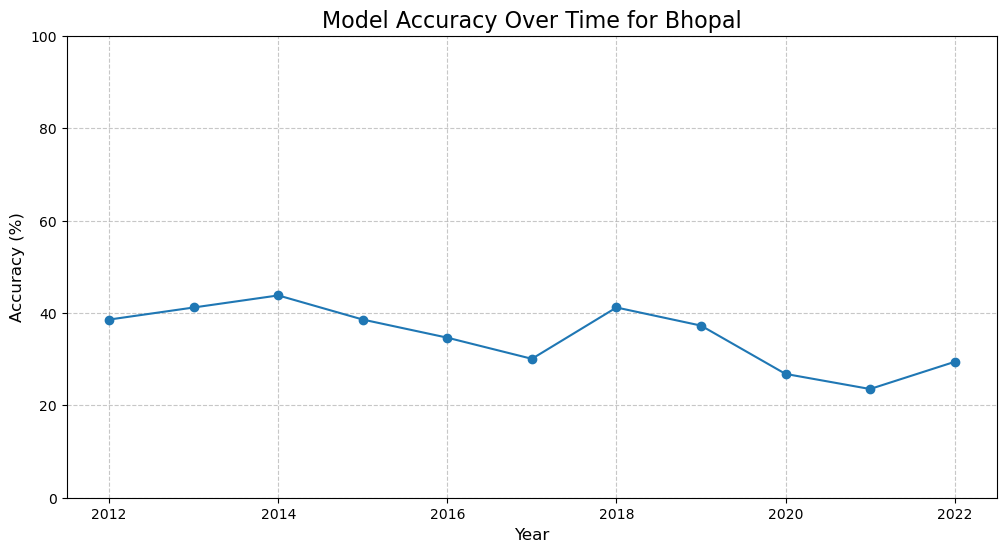

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_bhopal = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Bhopal.csv'
try:
    df_bhopal = pd.read_csv(file_path_bhopal)
    df_bhopal['Date'] = pd.to_datetime(df_bhopal['Date'])

    # --- Calculate Accuracy for Each Year ---
    df_bhopal['Year'] = df_bhopal['Date'].dt.year
    yearly_accuracy_bhopal = df_bhopal.groupby('Year').apply(
        lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
    )

    print("--- Model Accuracy Per Year (Bhopal) ---")
    print(yearly_accuracy_bhopal)

   
    plt.figure(figsize=(12, 6))
    yearly_accuracy_bhopal.plot(marker='o', linestyle='-')
    plt.title('Model Accuracy Over Time for Bhopal', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_bhopal}")
except Exception as e:
    print(f"An error occurred: {e}")

--- Model Accuracy Per Year (Ahmedabad) ---
Year
2012    65.359477
2013    60.130719
2014    64.705882
2015    75.816993
2016    69.281046
2017    60.784314
2018    65.359477
2019    53.594771
2020    50.980392
2021    54.901961
2022    58.823529
dtype: float64


C:\Users\adars\AppData\Local\Temp\ipykernel_13592\3666105500.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy_ahmedabad = df_ahmedabad.groupby('Year').apply(


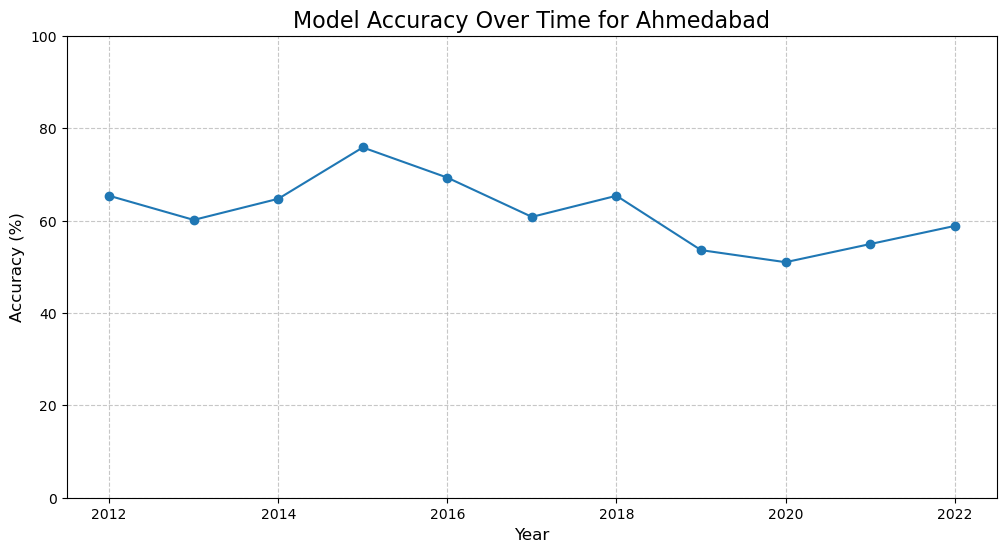

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_ahmedabad = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahmedabad.csv'
try:
    df_ahmedabad = pd.read_csv(file_path_ahmedabad)
    df_ahmedabad['Date'] = pd.to_datetime(df_ahmedabad['Date'])

    df_ahmedabad['Year'] = df_ahmedabad['Date'].dt.year
    yearly_accuracy_ahmedabad = df_ahmedabad.groupby('Year').apply(
        lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
    )

    print("--- Model Accuracy Per Year (Ahmedabad) ---")
    print(yearly_accuracy_ahmedabad)

    plt.figure(figsize=(12, 6))
    yearly_accuracy_ahmedabad.plot(marker='o', linestyle='-')
    plt.title('Model Accuracy Over Time for Ahmedabad', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_ahmedabad}")
except Exception as e:
    print(f"An error occurred: {e}")

--- Model Accuracy Per Year (Kochi) ---
Year
2012     8.496732
2013    12.418301
2014    15.032680
2015    15.686275
2016    15.686275
2017    15.032680
2018    12.418301
2019    16.339869
2020    17.647059
2021    20.261438
2022    15.032680
dtype: float64


C:\Users\adars\AppData\Local\Temp\ipykernel_13592\3156343219.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy_kochi = df_kochi.groupby('Year').apply(


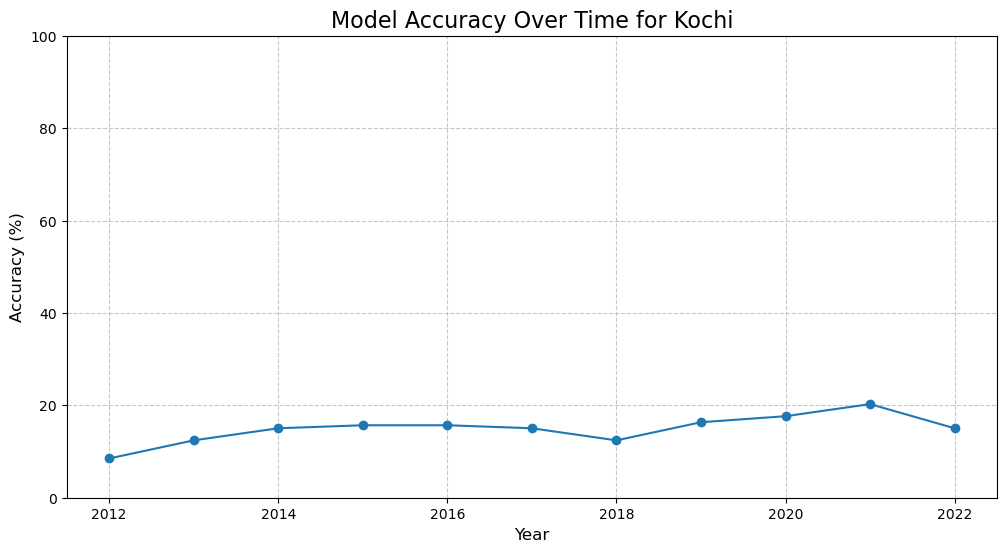

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_kochi = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Kochi.csv'
try:
    df_kochi = pd.read_csv(file_path_kochi)
    df_kochi['Date'] = pd.to_datetime(df_kochi['Date'])

    df_kochi['Year'] = df_kochi['Date'].dt.year
    yearly_accuracy_kochi = df_kochi.groupby('Year').apply(
        lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
    )

    print("--- Model Accuracy Per Year (Kochi) ---")
    print(yearly_accuracy_kochi)

    plt.figure(figsize=(12, 6))
    yearly_accuracy_kochi.plot(marker='o', linestyle='-')
    plt.title('Model Accuracy Over Time for Kochi', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 100) # Set y-axis from 0 to 100 for percentage
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_kochi}")
except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\2625554997.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_accuracy_Vishakhapatnam = df_Vishakhapatnam.groupby('Year').apply(


--- Model Accuracy Per Year (Vizag) ---
Year
2012    10.457516
2013    14.379085
2014    13.071895
2015     7.843137
2016    11.111111
2017    11.111111
2018    11.111111
2019     8.496732
2020    10.457516
2021    15.032680
2022    11.111111
dtype: float64


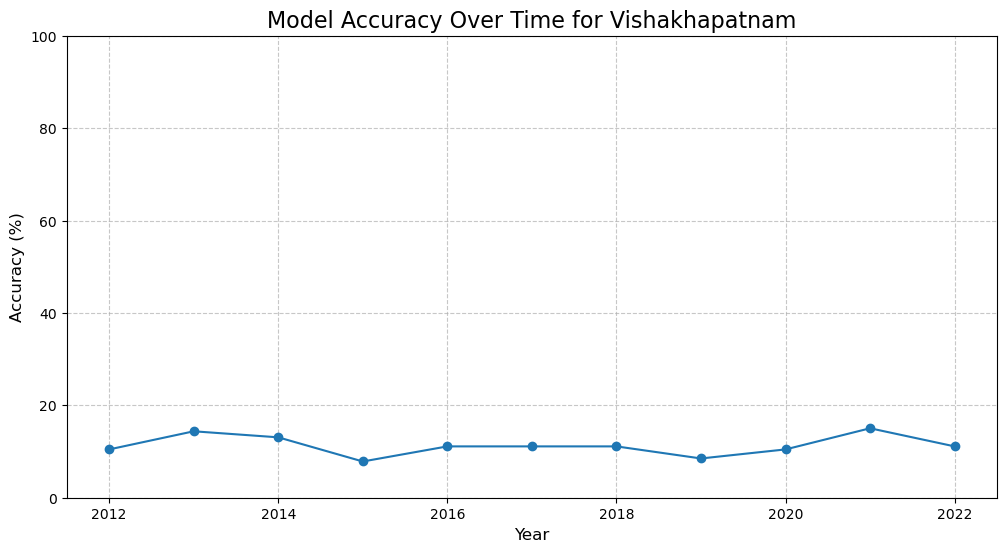

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_Vishakhapatnam = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Vishakhapatnam.csv'
try:
    df_Vishakhapatnam = pd.read_csv(file_path_Vishakhapatnam)
    df_Vishakhapatnam['Date'] = pd.to_datetime(df_Vishakhapatnam['Date'])


    df_Vishakhapatnam['Year'] = df_Vishakhapatnam['Date'].dt.year
    yearly_accuracy_Vishakhapatnam = df_Vishakhapatnam.groupby('Year').apply(
        lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
    )

    print("--- Model Accuracy Per Year (Vizag) ---")
    print(yearly_accuracy_Vishakhapatnam)

    plt.figure(figsize=(12, 6))
    yearly_accuracy_Vishakhapatnam.plot(marker='o', linestyle='-')
    plt.title('Model Accuracy Over Time for Vishakhapatnam', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(0, 100) 
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_Vishakhapatnam}")
except Exception as e:
    print(f"An error occurred: {e}")

C:\Users\adars\AppData\Local\Temp\ipykernel_13592\3094594501.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_accuracy = df_delhi.groupby('Month').apply(


--- Model Accuracy Per Month (1=Jan, 12=Dec) ---
Month
5    82.111437
6    67.878788
7    39.296188
8    39.296188
9    57.878788
dtype: float64


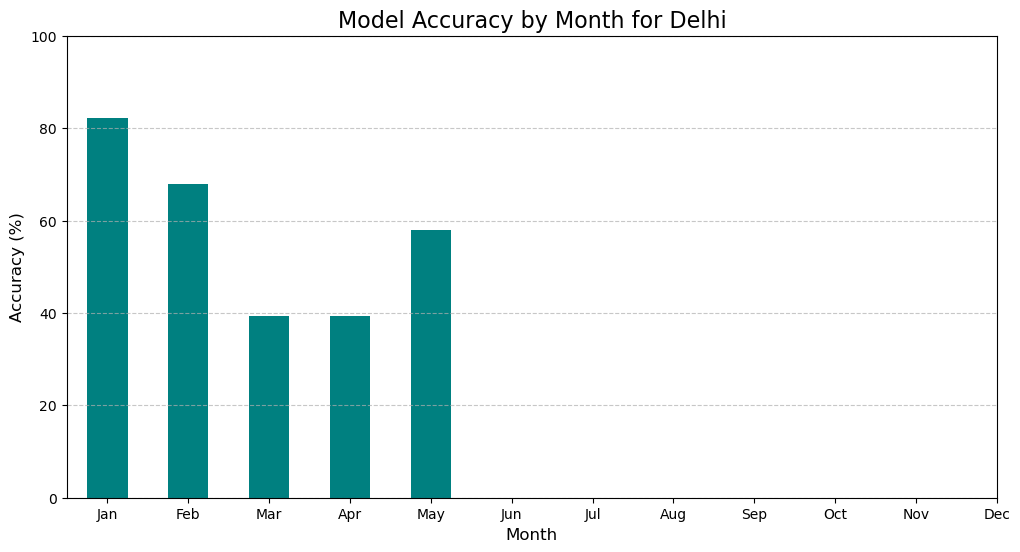

In [58]:
df_delhi['Month'] = df_delhi['Date'].dt.month

monthly_accuracy = df_delhi.groupby('Month').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

print("--- Model Accuracy Per Month (1=Jan, 12=Dec) ---")
print(monthly_accuracy)

plt.figure(figsize=(12, 6))
monthly_accuracy.plot(kind='bar', color='teal')
plt.title('Model Accuracy by Month for Delhi', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Average Error When an Actual Bin Occurs ---
True_Bins
1.0    0.255834
2.0    0.600000
3.0    0.828729
4.0    1.589189
Name: Error, dtype: float64


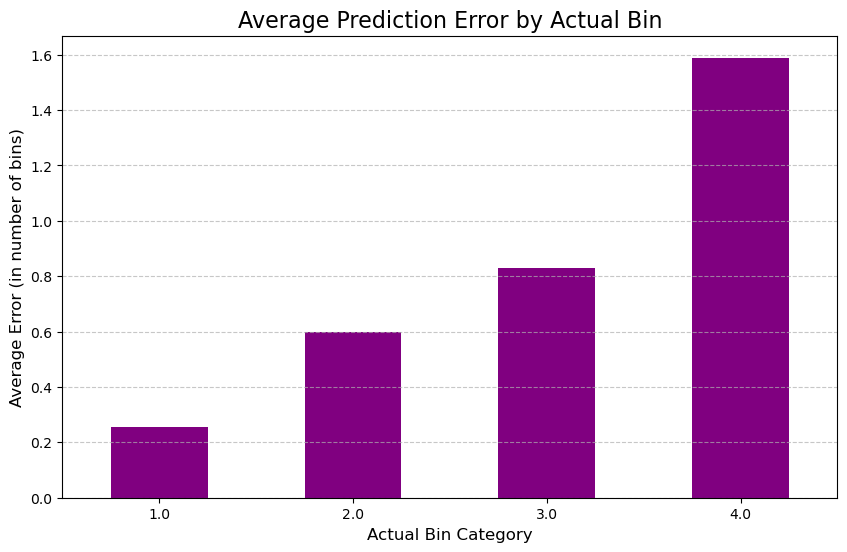

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_delhi = pd.read_csv('C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahmedabad.csv')

df_delhi['Error'] = (df_delhi['Predicted_Bins_NN'] - df_delhi['True_Bins']).abs()

avg_error_by_bin = df_delhi.groupby('True_Bins')['Error'].mean()

print("--- Average Error When an Actual Bin Occurs ---")
print(avg_error_by_bin)

plt.figure(figsize=(10, 6))
avg_error_by_bin.plot(kind='bar', color='purple')
plt.title('Average Prediction Error by Actual Bin', fontsize=16)
plt.xlabel('Actual Bin Category', fontsize=12)
plt.ylabel('Average Error (in number of bins)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [2]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)

df_delhi['Predicted_Bins_Persistence'] = df_delhi['True_Bins'].shift(1)
df_analysis = df_delhi.dropna()

persistence_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_Persistence']).mean() * 100
nn_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_NN']).mean() * 100

print(f"Neural Network Model Accuracy: {nn_accuracy:.2f}%")
print(f"Simple Persistence Model Accuracy: {persistence_accuracy:.2f}%")

if nn_accuracy > persistence_accuracy:
    print("\nThe Neural Network is performing better than the simple baseline.")
else:
    print("\nThe Neural Network is NOT performing better than the simple baseline.")

Neural Network Model Accuracy: 57.19%
Simple Persistence Model Accuracy: 64.21%

The Neural Network is NOT performing better than the simple baseline.


In [ ]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahemdabad.csv'
df_Ahemdabad = pd.read_csv(file_path)
df_Ahemdabad['Predicted_Bins_Persistence'] = df_Ahemdabad['True_Bins'].shift(1)

df_analysis = df_Ahemdabad.dropna()

persistence_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_Persistence']).mean() * 100
nn_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_NN']).mean() * 100

print(f"Neural Network Model Accuracy: {nn_accuracy:.2f}%")
print(f"Simple Persistence Model Accuracy: {persistence_accuracy:.2f}%")

if nn_accuracy > persistence_accuracy:
    print("\nThe Neural Network is performing better than the simple baseline.")
else:
    print("\nThe Neural Network is NOT performing better than the simple baseline.")

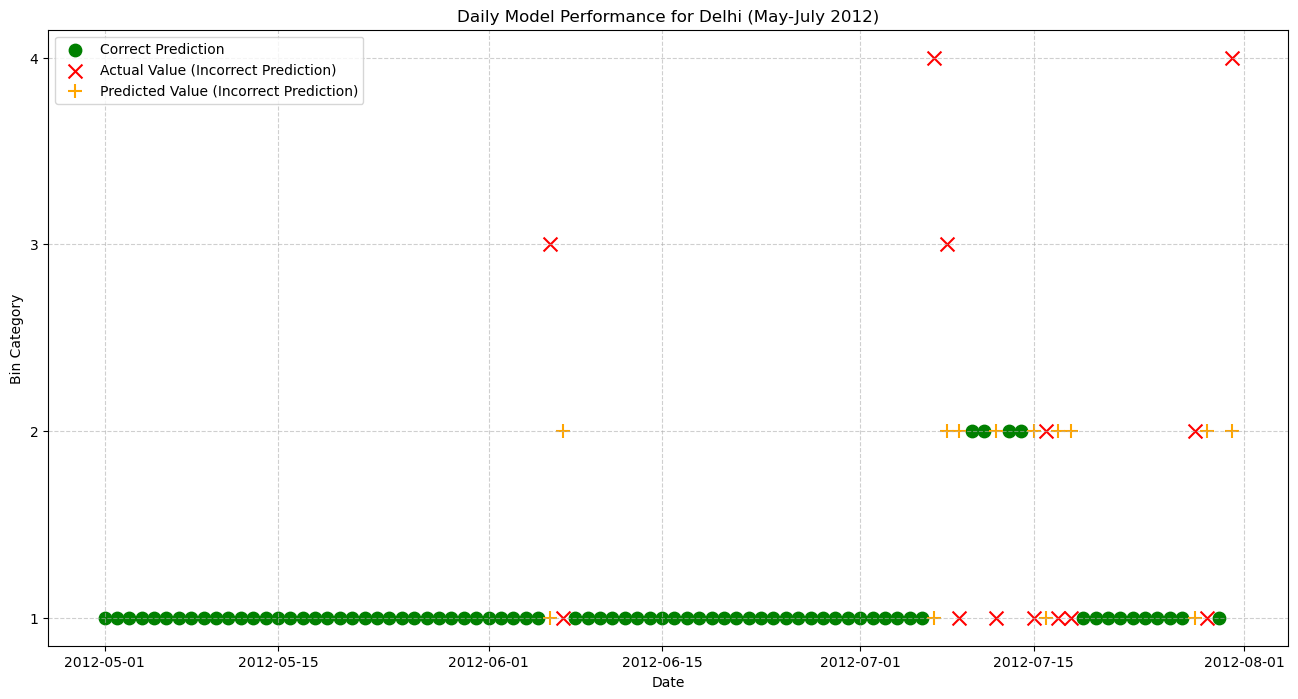

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_delhi['is_correct'] = df_delhi['True_Bins'] == df_delhi['Predicted_Bins_NN']
df_slice = df_delhi['2012-05-01':'2012-07-31']

plt.figure(figsize=(16, 8))


correct = df_slice[df_slice['is_correct']]
plt.scatter(correct.index, correct['True_Bins'], color='green', label='Correct Prediction', marker='o', s=80)


incorrect = df_slice[~df_slice['is_correct']]
plt.scatter(incorrect.index, incorrect['True_Bins'], color='red', label='Actual Value (Incorrect Prediction)', marker='x', s=100)
plt.scatter(incorrect.index, incorrect['Predicted_Bins_NN'], color='orange', label='Predicted Value (Incorrect Prediction)', marker='+', s=100)

plt.title('Daily Model Performance for Delhi (May-July 2012)')
plt.ylabel('Bin Category')
plt.xlabel('Date')
plt.yticks([1, 2, 3, 4]) # Set y-axis ticks to your bin numbers
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--- Analysis for Mumbai ---

Neural Network Model Accuracy: 43.16%
Simple Persistence Model Accuracy: 51.01%
--> The Neural Network is NOT performing better than the simple baseline.


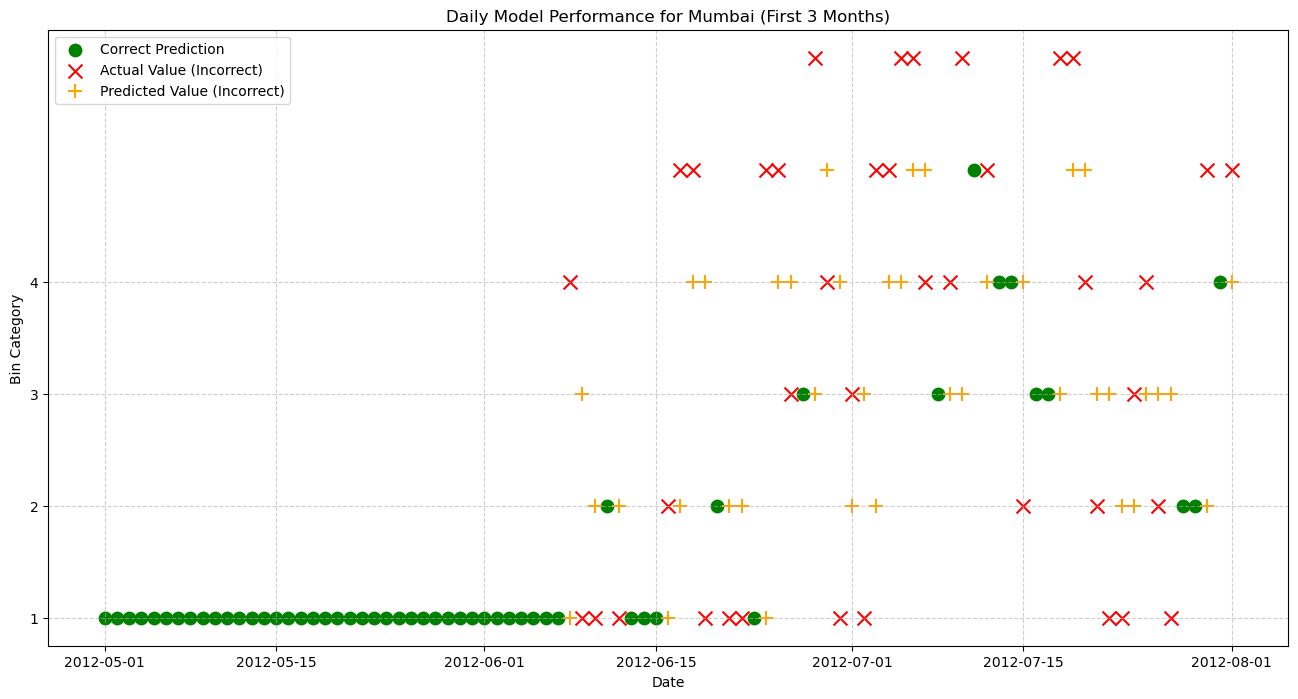


The longest streak of incorrect predictions for Mumbai was 18 days in a row.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path_mumbai = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Mumbai.csv'

try:
    df_mumbai = pd.read_csv(file_path_mumbai, parse_dates=['Date'], index_col='Date')
    print(f"--- Analysis for Mumbai ---")

    
    df_mumbai['Predicted_Bins_Persistence'] = df_mumbai['True_Bins'].shift(1)
    df_analysis = df_mumbai.dropna()
    persistence_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_Persistence']).mean() * 100
    nn_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_NN']).mean() * 100

    print(f"\nNeural Network Model Accuracy: {nn_accuracy:.2f}%")
    print(f"Simple Persistence Model Accuracy: {persistence_accuracy:.2f}%")
    if nn_accuracy > persistence_accuracy:
        print("--> The Neural Network is performing better than the simple baseline.")
    else:
        print("--> The Neural Network is NOT performing better than the simple baseline.")

   
    df_mumbai['is_correct'] = df_mumbai['True_Bins'] == df_mumbai['Predicted_Bins_NN']
    start_date = df_mumbai.index.min()
    end_date = start_date + pd.DateOffset(months=3)
    df_slice = df_mumbai[start_date:end_date]

    plt.figure(figsize=(16, 8))
    correct = df_slice[df_slice['is_correct']]
    incorrect = df_slice[~df_slice['is_correct']]
    plt.scatter(correct.index, correct['True_Bins'], color='green', label='Correct Prediction', marker='o', s=80)
    plt.scatter(incorrect.index, incorrect['True_Bins'], color='red', label='Actual Value (Incorrect)', marker='x', s=100)
    plt.scatter(incorrect.index, incorrect['Predicted_Bins_NN'], color='orange', label='Predicted Value (Incorrect)', marker='+', s=100)
    plt.title('Daily Model Performance for Mumbai (First 3 Months)')
    plt.ylabel('Bin Category'); plt.xlabel('Date'); plt.yticks([1, 2, 3, 4]); plt.legend(); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

    
    df_mumbai['is_wrong'] = df_mumbai['True_Bins'] != df_mumbai['Predicted_Bins_NN']
    df_mumbai['error_streak_id'] = (df_mumbai['is_wrong'] != df_mumbai['is_wrong'].shift()).cumsum()
    df_mumbai['error_streak_counter'] = df_mumbai.groupby('error_streak_id').cumcount() + 1
    longest_streak = df_mumbai[df_mumbai['is_wrong']]['error_streak_counter'].max()
    print(f"\nThe longest streak of incorrect predictions for Mumbai was {longest_streak} days in a row.")

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_mumbai}")
except Exception as e:
    print(f"An error occurred: {e}")

--- Analysis for Bhopal ---

Neural Network Model Accuracy: 34.96%
Simple Persistence Model Accuracy: 45.96%
--> The Neural Network is NOT performing better than the simple baseline.


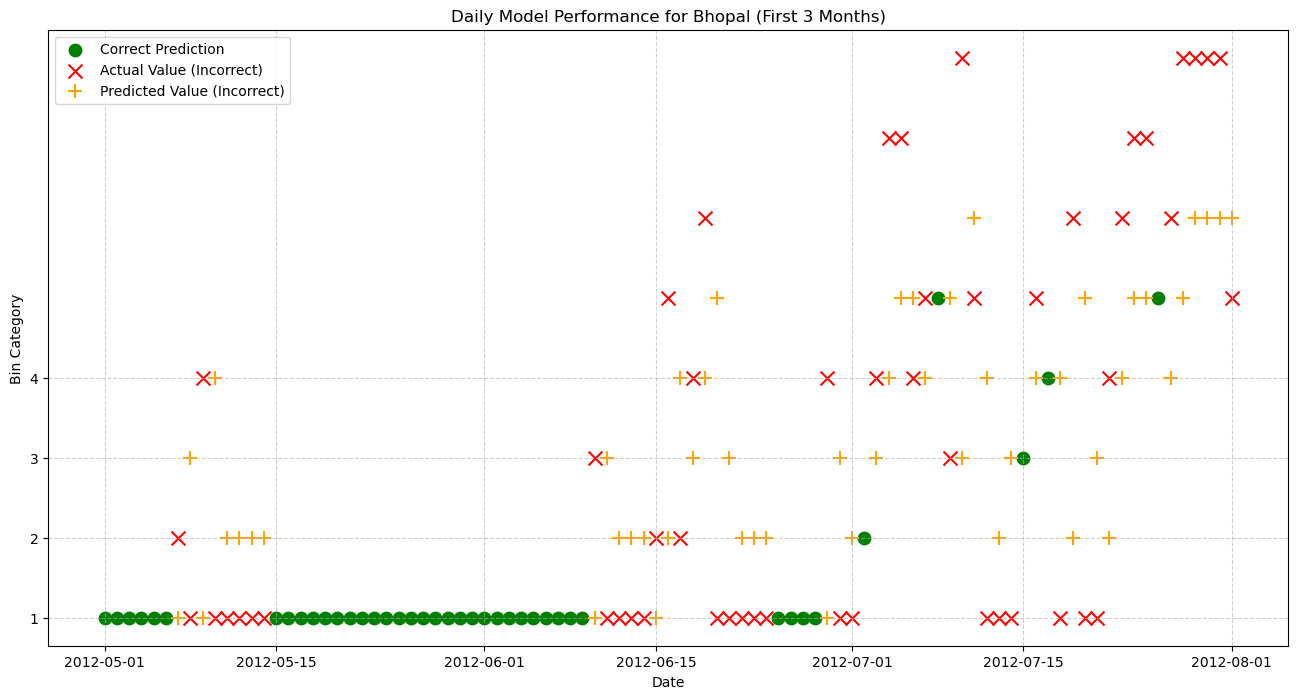


The longest streak of incorrect predictions for Bhopal was 22 days in a row.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path_bhopal = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Bhopal.csv'

try:
    df_bhopal = pd.read_csv(file_path_bhopal, parse_dates=['Date'], index_col='Date')
    print(f"--- Analysis for Bhopal ---")

    df_bhopal['Predicted_Bins_Persistence'] = df_bhopal['True_Bins'].shift(1)
    df_analysis = df_bhopal.dropna()
    persistence_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_Persistence']).mean() * 100
    nn_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_NN']).mean() * 100

    print(f"\nNeural Network Model Accuracy: {nn_accuracy:.2f}%")
    print(f"Simple Persistence Model Accuracy: {persistence_accuracy:.2f}%")
    if nn_accuracy > persistence_accuracy:
        print("--> The Neural Network is performing better than the simple baseline.")
    else:
        print("--> The Neural Network is NOT performing better than the simple baseline.")

    
    df_bhopal['is_correct'] = df_bhopal['True_Bins'] == df_bhopal['Predicted_Bins_NN']
    start_date = df_bhopal.index.min()
    end_date = start_date + pd.DateOffset(months=3)
    df_slice = df_bhopal[start_date:end_date]

    plt.figure(figsize=(16, 8))
    correct = df_slice[df_slice['is_correct']]
    incorrect = df_slice[~df_slice['is_correct']]
    plt.scatter(correct.index, correct['True_Bins'], color='green', label='Correct Prediction', marker='o', s=80)
    plt.scatter(incorrect.index, incorrect['True_Bins'], color='red', label='Actual Value (Incorrect)', marker='x', s=100)
    plt.scatter(incorrect.index, incorrect['Predicted_Bins_NN'], color='orange', label='Predicted Value (Incorrect)', marker='+', s=100)
    plt.title('Daily Model Performance for Bhopal (First 3 Months)')
    plt.ylabel('Bin Category'); plt.xlabel('Date'); plt.yticks([1, 2, 3, 4]); plt.legend(); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

    
    df_bhopal['is_wrong'] = df_bhopal['True_Bins'] != df_bhopal['Predicted_Bins_NN']
    df_bhopal['error_streak_id'] = (df_bhopal['is_wrong'] != df_bhopal['is_wrong'].shift()).cumsum()
    df_bhopal['error_streak_counter'] = df_bhopal.groupby('error_streak_id').cumcount() + 1
    longest_streak = df_bhopal[df_bhopal['is_wrong']]['error_streak_counter'].max()
    print(f"\nThe longest streak of incorrect predictions for Bhopal was {longest_streak} days in a row.")

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_bhopal}")
except Exception as e:
    print(f"An error occurred: {e}")

--- Analysis for Kochi ---

Neural Network Model Accuracy: 14.92%
Simple Persistence Model Accuracy: 24.79%
--> The Neural Network is NOT performing better than the simple baseline.


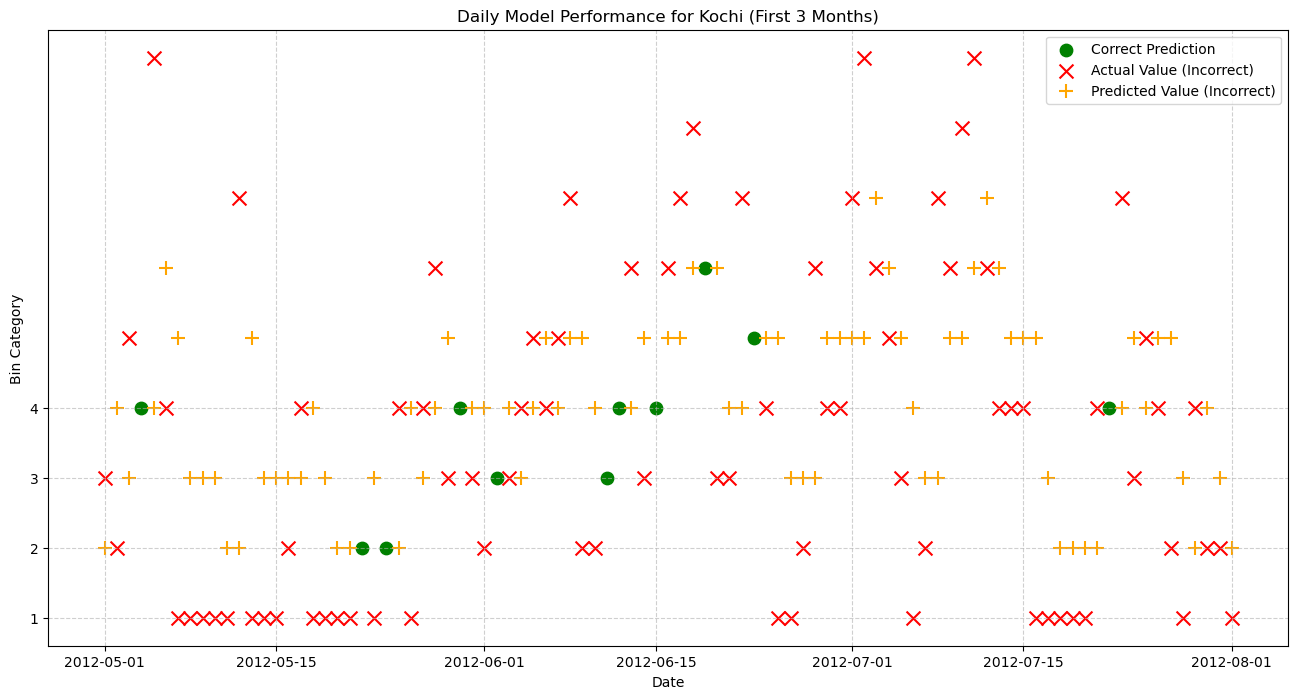


The longest streak of incorrect predictions for Kochi was 36 days in a row.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path_kochi = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Kochi.csv'

try:
    df_kochi = pd.read_csv(file_path_kochi, parse_dates=['Date'], index_col='Date')
    print(f"--- Analysis for Kochi ---")

    df_kochi['Predicted_Bins_Persistence'] = df_kochi['True_Bins'].shift(1)
    df_analysis = df_kochi.dropna()
    persistence_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_Persistence']).mean() * 100
    nn_accuracy = (df_analysis['True_Bins'] == df_analysis['Predicted_Bins_NN']).mean() * 100

    print(f"\nNeural Network Model Accuracy: {nn_accuracy:.2f}%")
    print(f"Simple Persistence Model Accuracy: {persistence_accuracy:.2f}%")
    if nn_accuracy > persistence_accuracy:
        print("--> The Neural Network is performing better than the simple baseline.")
    else:
        print("--> The Neural Network is NOT performing better than the simple baseline.")

    
    df_kochi['is_correct'] = df_kochi['True_Bins'] == df_kochi['Predicted_Bins_NN']
    start_date = df_kochi.index.min()
    end_date = start_date + pd.DateOffset(months=3)
    df_slice = df_kochi[start_date:end_date]

    plt.figure(figsize=(16, 8))
    correct = df_slice[df_slice['is_correct']]
    incorrect = df_slice[~df_slice['is_correct']]
    plt.scatter(correct.index, correct['True_Bins'], color='green', label='Correct Prediction', marker='o', s=80)
    plt.scatter(incorrect.index, incorrect['True_Bins'], color='red', label='Actual Value (Incorrect)', marker='x', s=100)
    plt.scatter(incorrect.index, incorrect['Predicted_Bins_NN'], color='orange', label='Predicted Value (Incorrect)', marker='+', s=100)
    plt.title('Daily Model Performance for Kochi (First 3 Months)')
    plt.ylabel('Bin Category'); plt.xlabel('Date'); plt.yticks([1, 2, 3, 4]); plt.legend(); plt.grid(True, linestyle='--', alpha=0.6); plt.show()

    
    df_kochi['is_wrong'] = df_kochi['True_Bins'] != df_kochi['Predicted_Bins_NN']
    df_kochi['error_streak_id'] = (df_kochi['is_wrong'] != df_kochi['is_wrong'].shift()).cumsum()
    df_kochi['error_streak_counter'] = df_kochi.groupby('error_streak_id').cumcount() + 1
    longest_streak = df_kochi[df_kochi['is_wrong']]['error_streak_counter'].max()
    print(f"\nThe longest streak of incorrect predictions for Kochi was {longest_streak} days in a row.")

except FileNotFoundError:
    print(f"ERROR: File not found at {file_path_kochi}")
except Exception as e:
    print(f"An error occurred: {e}")

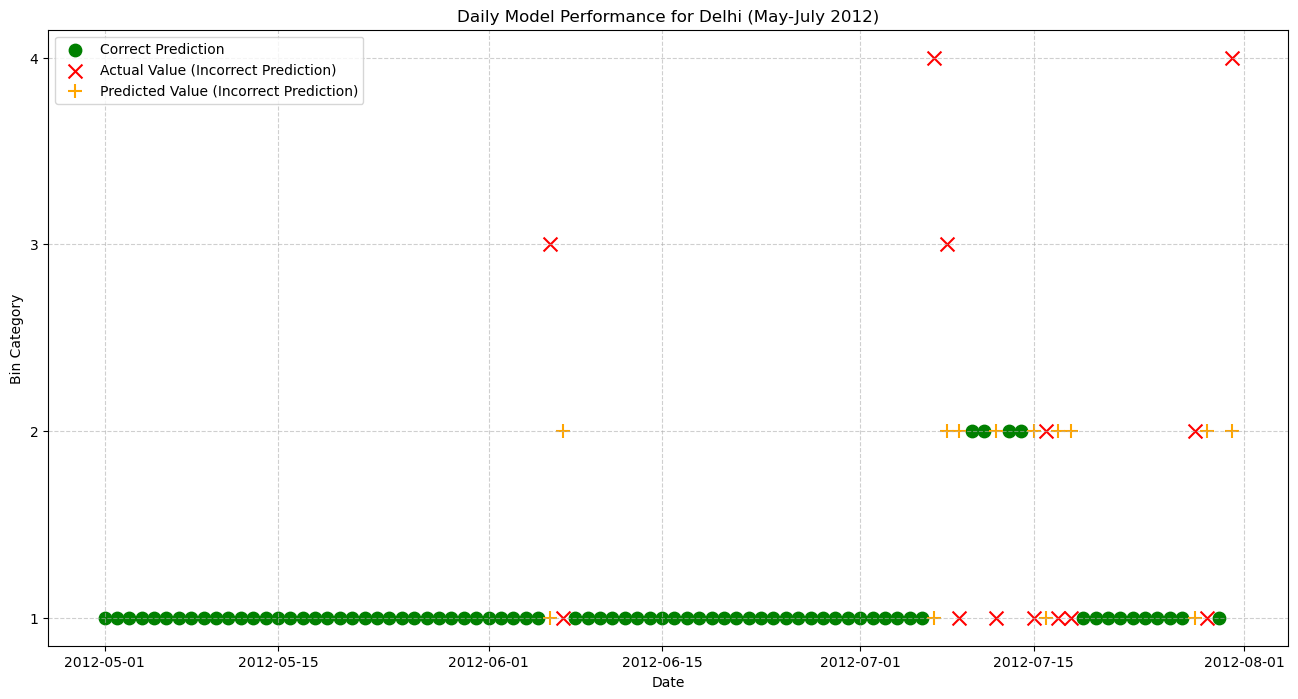

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df_delhi['is_correct'] = df_delhi['True_Bins'] == df_delhi['Predicted_Bins_NN']

df_slice = df_delhi['2012-05-01':'2012-07-31']

plt.figure(figsize=(16, 8))

correct = df_slice[df_slice['is_correct']]
plt.scatter(correct.index, correct['True_Bins'], color='green', label='Correct Prediction', marker='o', s=80)


incorrect = df_slice[~df_slice['is_correct']]
plt.scatter(incorrect.index, incorrect['True_Bins'], color='red', label='Actual Value (Incorrect Prediction)', marker='x', s=100)
plt.scatter(incorrect.index, incorrect['Predicted_Bins_NN'], color='orange', label='Predicted Value (Incorrect Prediction)', marker='+', s=100)

plt.title('Daily Model Performance for Delhi (May-July 2012)')
plt.ylabel('Bin Category')
plt.xlabel('Date')
plt.yticks([1, 2, 3, 4]) # Set y-axis ticks to your bin numbers
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [9]:
import pandas as pd
from sklearn.metrics import classification_report

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)


y_true = df_delhi['True_Bins']
y_pred = df_delhi['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for the Model ---")
print(report)

--- Classification Report for the Model ---
              precision    recall  f1-score   support

         1.0       0.84      0.71      0.77      1189
         2.0       0.17      0.52      0.26       203
         3.0       0.26      0.08      0.12       196
         4.0       0.00      0.00      0.00        95

    accuracy                           0.57      1683
   macro avg       0.32      0.33      0.29      1683
weighted avg       0.64      0.57      0.59      1683



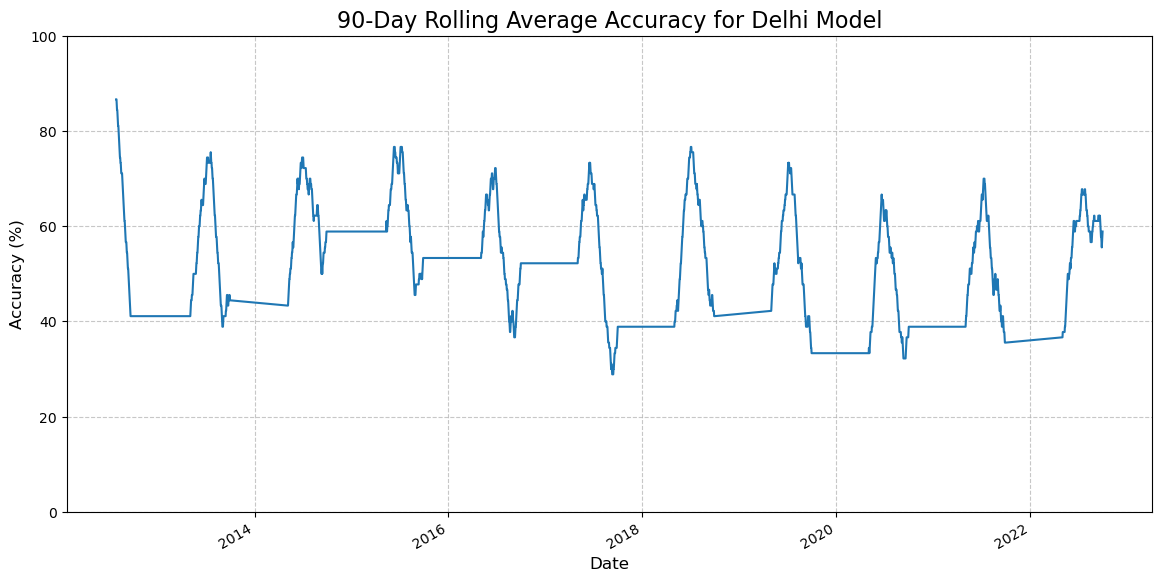

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df_delhi['is_correct'] = (df_delhi['True_Bins'] == df_delhi['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_delhi['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Delhi Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_30776\2353158210.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dow_accuracy = df_delhi.groupby('Day_of_Week').apply(


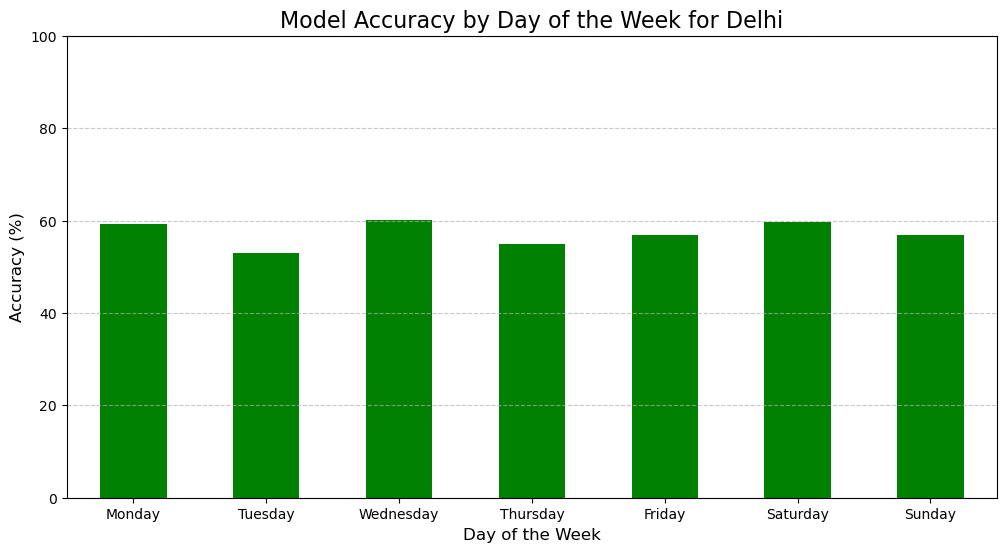

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Delhi.csv'
df_delhi = pd.read_csv(file_path)
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])

df_delhi['Day_of_Week'] = df_delhi['Date'].dt.dayofweek

dow_accuracy = df_delhi.groupby('Day_of_Week').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

plt.figure(figsize=(12, 6))
dow_accuracy.plot(kind='bar', color='green')
plt.title('Model Accuracy by Day of the Week for Delhi', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
import pandas as pd
from sklearn.metrics import classification_report

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Mumbai.csv'
df_Mumbai = pd.read_csv(file_path)

y_true = df_Mumbai['True_Bins']
y_pred = df_Mumbai['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for the Model ---")
print(report)

--- Classification Report for the Model ---
              precision    recall  f1-score   support

         1.0       0.90      0.66      0.76       743
         2.0       0.17      0.33      0.22       150
         3.0       0.25      0.44      0.31       186
         4.0       0.18      0.30      0.23       186
         5.0       0.24      0.28      0.26       195
         6.0       0.00      0.00      0.00       223

    accuracy                           0.43      1683
   macro avg       0.29      0.33      0.30      1683
weighted avg       0.49      0.43      0.45      1683



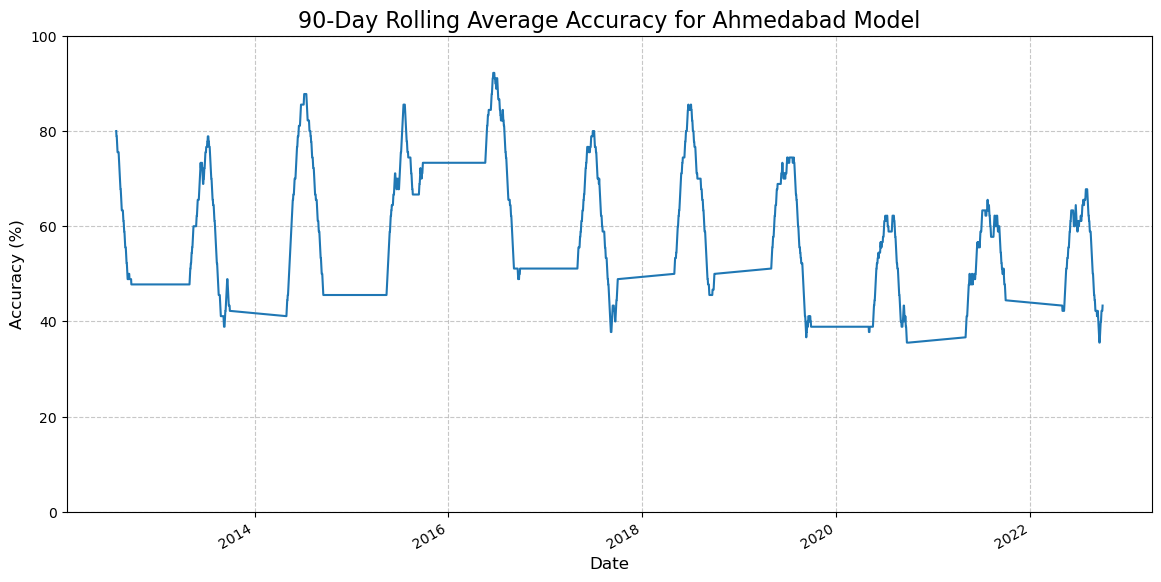

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahmedabad.csv'
df_Ahmedabad = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_Ahmedabad['is_correct'] = (df_Ahmedabad['True_Bins'] == df_Ahmedabad['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_Ahmedabad['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Ahmedabad Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_30776\3551162922.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dow_accuracy = df_Ahmedabad.groupby('Day_of_Week').apply(


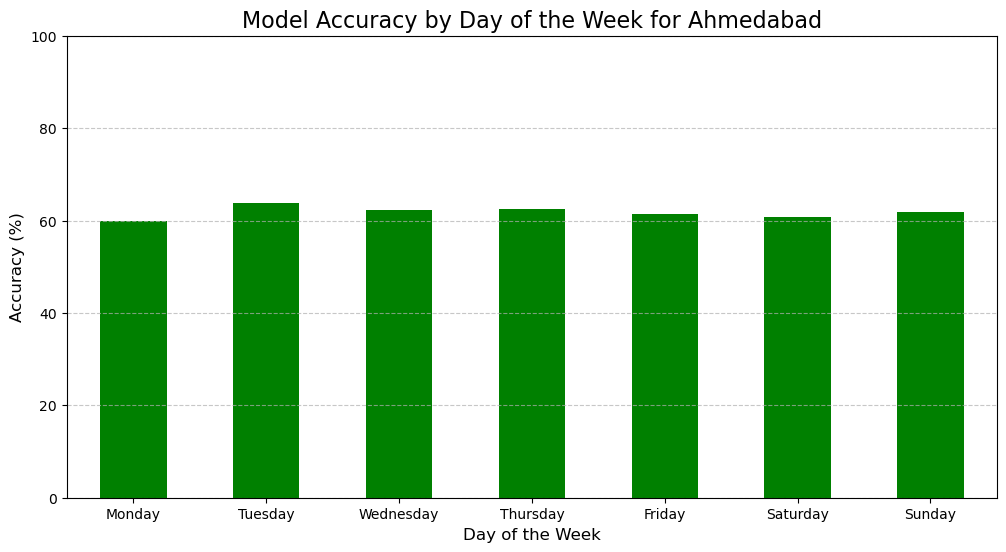

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahmedabad.csv'
df_Ahmedabad = pd.read_csv(file_path)
df_Ahmedabad['Date'] = pd.to_datetime(df_Ahmedabad['Date'])


df_Ahmedabad['Day_of_Week'] = df_Ahmedabad['Date'].dt.dayofweek


dow_accuracy = df_Ahmedabad.groupby('Day_of_Week').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)


plt.figure(figsize=(12, 6))
dow_accuracy.plot(kind='bar', color='green')
plt.title('Model Accuracy by Day of the Week for Ahmedabad', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_30776\4150276682.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dow_accuracy = df_Bhopal.groupby('Day_of_Week').apply(


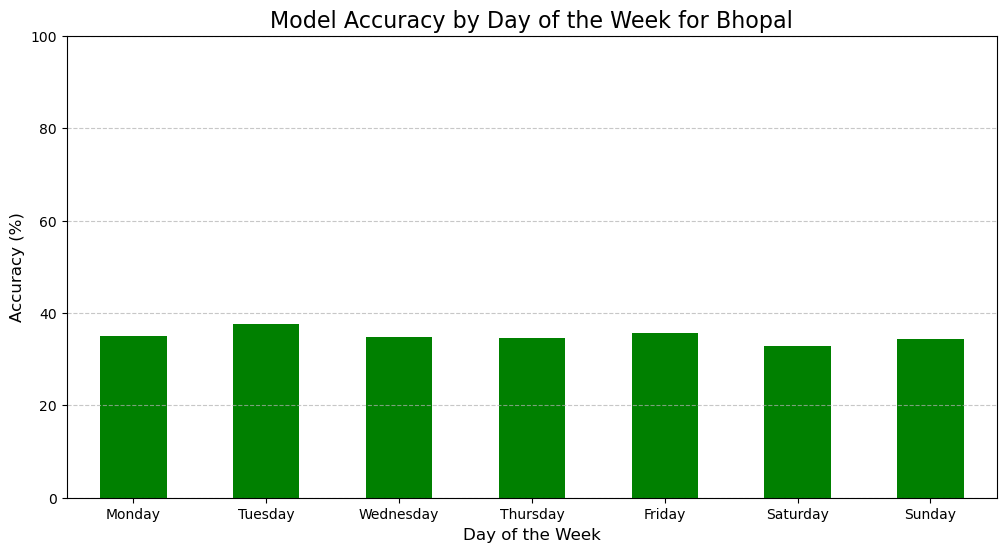

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Bhopal.csv'
df_Bhopal = pd.read_csv(file_path)
df_Bhopal['Date'] = pd.to_datetime(df_Bhopal['Date'])

df_Bhopal['Day_of_Week'] = df_Bhopal['Date'].dt.dayofweek

dow_accuracy = df_Bhopal.groupby('Day_of_Week').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

plt.figure(figsize=(12, 6))
dow_accuracy.plot(kind='bar', color='green')
plt.title('Model Accuracy by Day of the Week for Bhopal', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_30776\1346820160.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dow_accuracy = df_Kochi.groupby('Day_of_Week').apply(


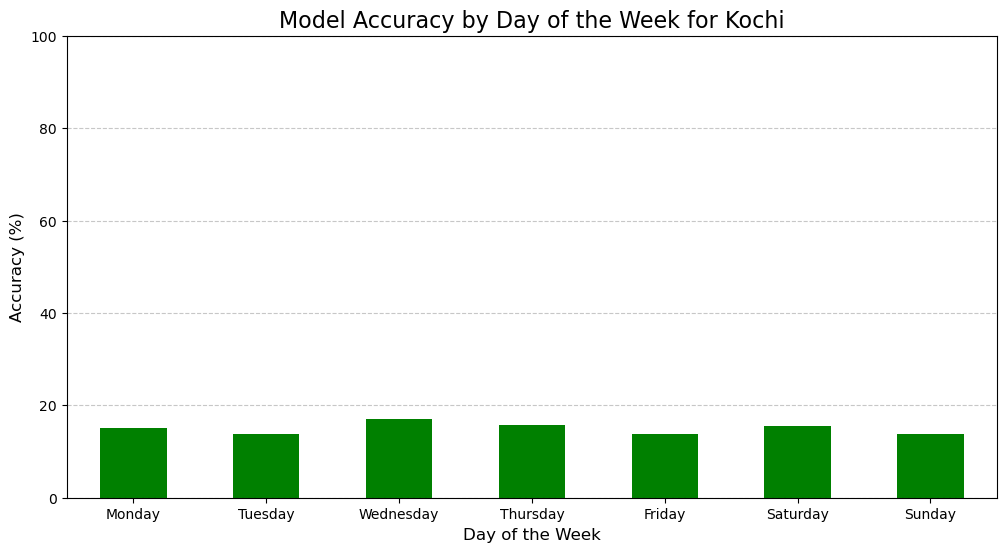

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Kochi.csv'
df_Kochi = pd.read_csv(file_path)
df_Kochi['Date'] = pd.to_datetime(df_Kochi['Date'])

df_Kochi['Day_of_Week'] = df_Kochi['Date'].dt.dayofweek

dow_accuracy = df_Kochi.groupby('Day_of_Week').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

plt.figure(figsize=(12, 6))
dow_accuracy.plot(kind='bar', color='green')
plt.title('Model Accuracy by Day of the Week for Kochi', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ERROR: File not found at C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Vishakhapattnam.csv


C:\Users\adars\AppData\Local\Temp\ipykernel_30776\467340056.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dow_accuracy = df_Vishakhapatnam.groupby('Day_of_Week').apply(


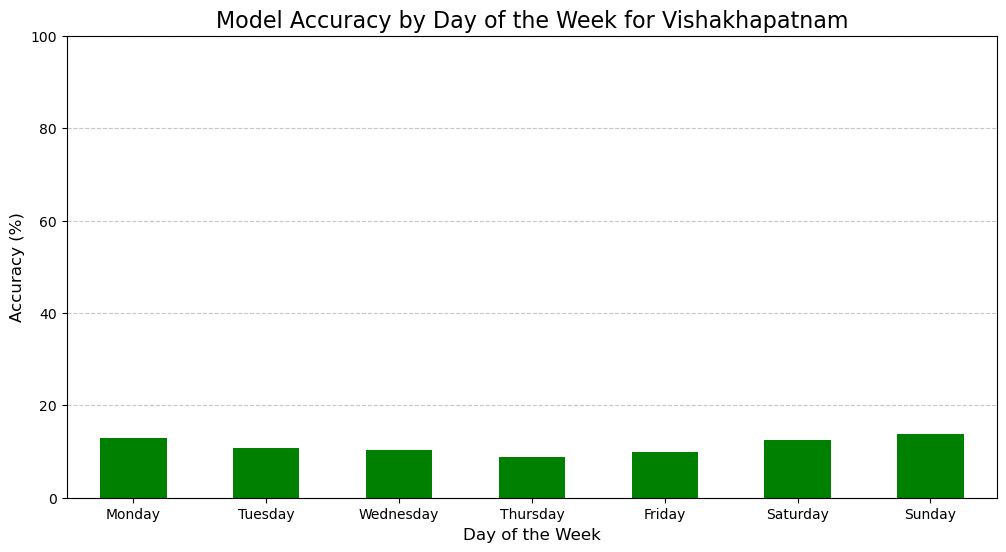

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Vishakhapatnam.csv'
df_Vishakhapatnam = pd.read_csv(file_path)
df_Vishakhapatnam['Date'] = pd.to_datetime(df_Vishakhapatnam['Date'])

df_Vishakhapatnam['Day_of_Week'] = df_Vishakhapatnam['Date'].dt.dayofweek

dow_accuracy = df_Vishakhapatnam.groupby('Day_of_Week').apply(
    lambda x: (x['True_Bins'] == x['Predicted_Bins_NN']).mean() * 100
)

plt.figure(figsize=(12, 6))
dow_accuracy.plot(kind='bar', color='green')
plt.title('Model Accuracy by Day of the Week for Vishakhapatnam', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
import pandas as pd
from sklearn.metrics import classification_report

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Mumbai.csv'
df_mumbai = pd.read_csv(file_path)

y_true = df_mumbai['True_Bins']
y_pred = df_mumbai['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for Mumbai ---")
print(report)

--- Classification Report for Mumbai ---
              precision    recall  f1-score   support

         1.0       0.90      0.66      0.76       743
         2.0       0.17      0.33      0.22       150
         3.0       0.25      0.44      0.31       186
         4.0       0.18      0.30      0.23       186
         5.0       0.24      0.28      0.26       195
         6.0       0.00      0.00      0.00       223

    accuracy                           0.43      1683
   macro avg       0.29      0.33      0.30      1683
weighted avg       0.49      0.43      0.45      1683



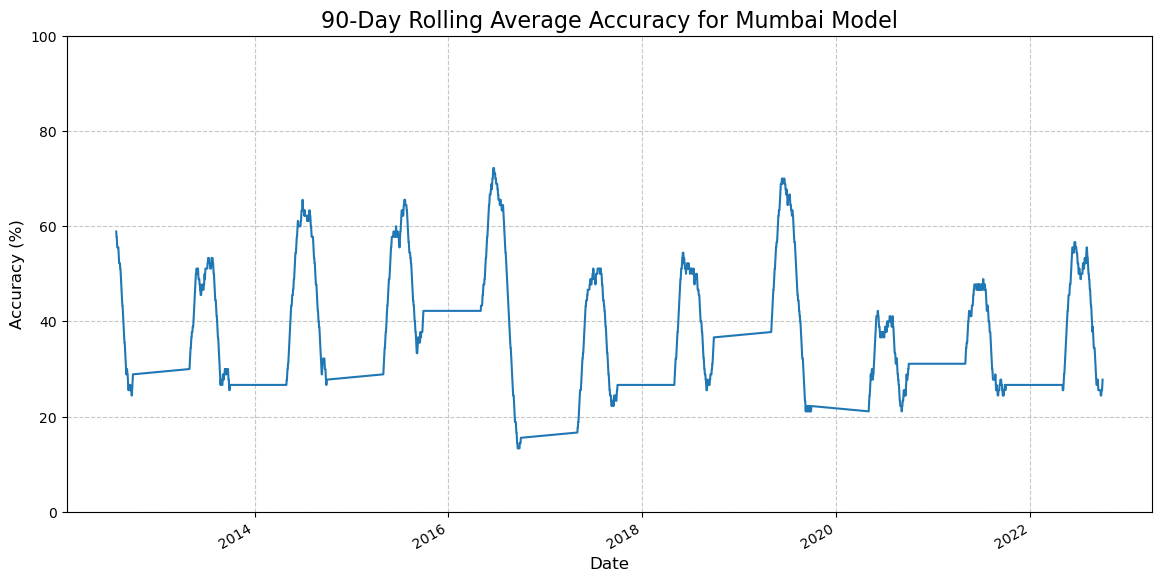

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Mumbai.csv'
df_mumbai = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_mumbai['is_correct'] = (df_mumbai['True_Bins'] == df_mumbai['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_mumbai['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Mumbai Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

In [22]:
import pandas as pd
from sklearn.metrics import classification_report

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Bhopal.csv'
df_bhopal = pd.read_csv(file_path)

y_true = df_bhopal['True_Bins']
y_pred = df_bhopal['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for Bhopal ---")
print(report)

--- Classification Report for Bhopal ---
              precision    recall  f1-score   support

           1       0.90      0.55      0.68       825
           2       0.06      0.15      0.09       120
           3       0.11      0.20      0.14       114
           4       0.12      0.29      0.17       125
           5       0.18      0.31      0.23       129
           6       0.13      0.16      0.14       129
           7       0.11      0.01      0.02       106
           8       0.00      0.00      0.00       135

    accuracy                           0.35      1683
   macro avg       0.20      0.21      0.18      1683
weighted avg       0.49      0.35      0.39      1683



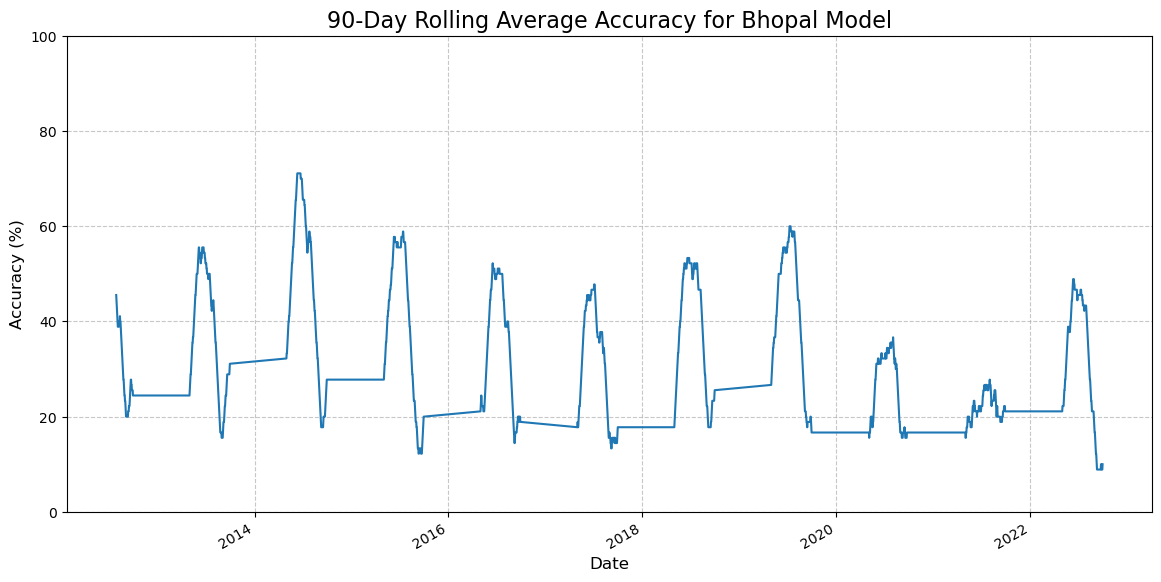

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Bhopal.csv'
df_bhopal = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_bhopal['is_correct'] = (df_bhopal['True_Bins'] == df_bhopal['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_bhopal['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Bhopal Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

In [24]:
import pandas as pd
from sklearn.metrics import classification_report

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahmedabad.csv'
df_ahmedabad = pd.read_csv(file_path)

y_true = df_ahmedabad['True_Bins']
y_pred = df_ahmedabad['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for Ahmedabad ---")
print(report)

--- Classification Report for Ahmedabad ---
              precision    recall  f1-score   support

         1.0       0.89      0.79      0.84      1157
         2.0       0.16      0.40      0.22       160
         3.0       0.26      0.36      0.30       181
         4.0       0.67      0.01      0.02       185

    accuracy                           0.62      1683
   macro avg       0.49      0.39      0.35      1683
weighted avg       0.73      0.62      0.63      1683



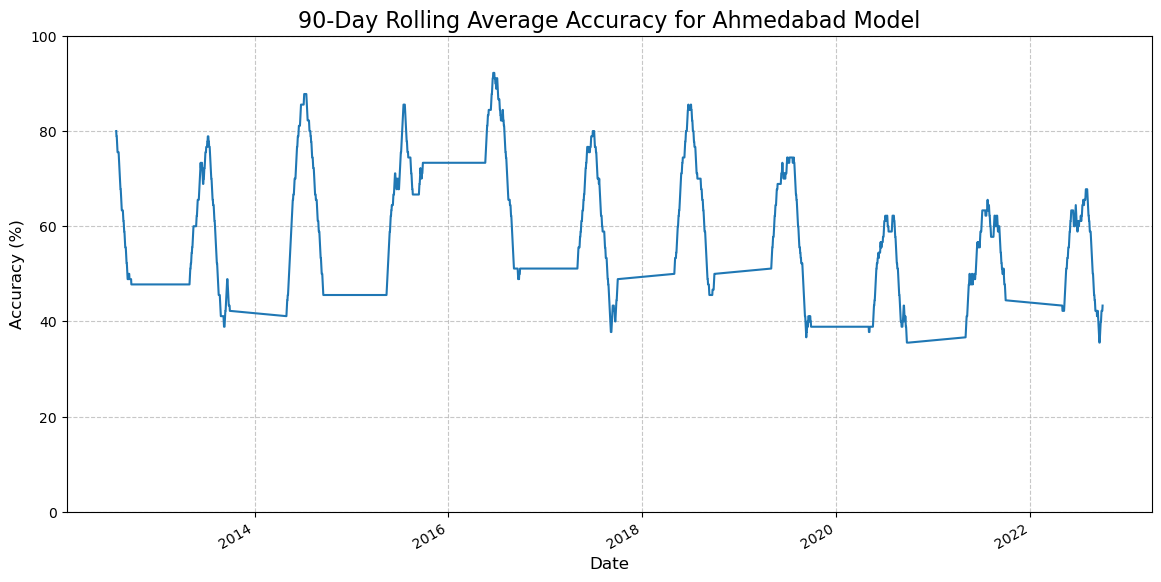

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Ahmedabad.csv'
df_ahmedabad = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_ahmedabad['is_correct'] = (df_ahmedabad['True_Bins'] == df_ahmedabad['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_ahmedabad['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Ahmedabad Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

In [26]:
import pandas as pd
from sklearn.metrics import classification_report

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Kochi.csv'
df_kochi = pd.read_csv(file_path)

y_true = df_kochi['True_Bins']
y_pred = df_kochi['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for Kochi ---")
print(report)

--- Classification Report for Kochi ---
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       305
         2.0       0.13      0.17      0.15       153
         3.0       0.14      0.15      0.15       216
         4.0       0.16      0.28      0.21       199
         5.0       0.14      0.34      0.19       179
         6.0       0.18      0.28      0.22       188
         7.0       0.14      0.11      0.13       174
         8.0       0.14      0.03      0.05       123
         9.0       0.00      0.00      0.00       146

    accuracy                           0.15      1683
   macro avg       0.11      0.15      0.12      1683
weighted avg       0.11      0.15      0.12      1683



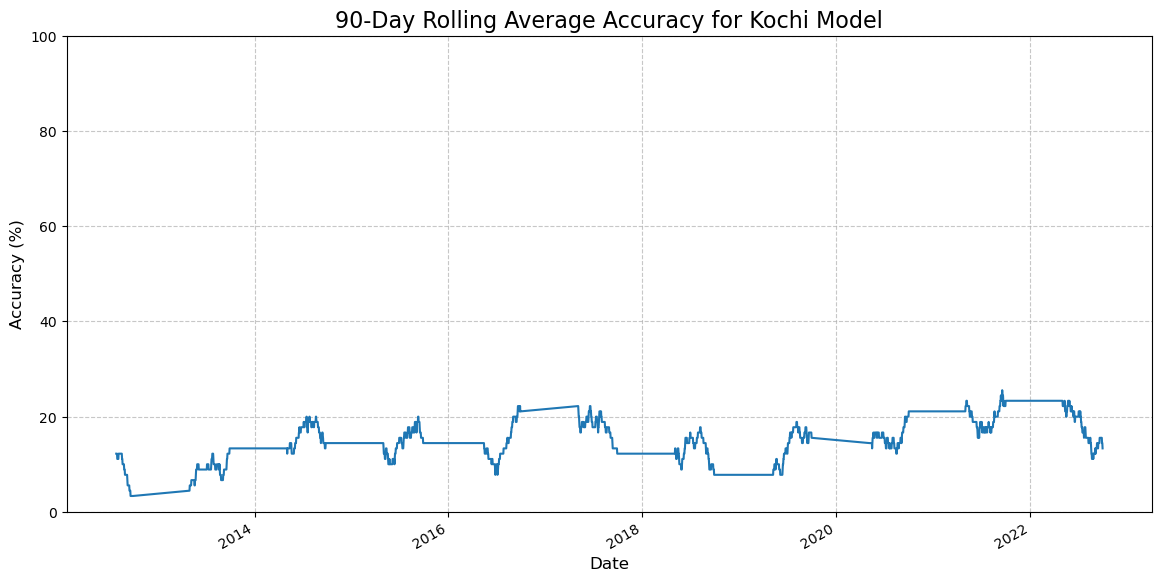

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Kochi.csv'
df_kochi = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_kochi['is_correct'] = (df_kochi['True_Bins'] == df_kochi['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_kochi['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Kochi Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

In [29]:
import pandas as pd
from sklearn.metrics import classification_report


file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Vishakhapatnam.csv'
df_vishakhapatnam = pd.read_csv(file_path)

y_true = df_vishakhapatnam['True_Bins']
y_pred = df_vishakhapatnam['Predicted_Bins_NN']

report = classification_report(y_true, y_pred, zero_division=0)

print("--- Classification Report for Vishakhapatnam ---")
print(report)

--- Classification Report for Vishakhapatnam ---
              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00       738
         2.0       0.10      0.45      0.16       187
         3.0       0.13      0.47      0.20       187
         4.0       0.11      0.09      0.10       175
         5.0       0.00      0.00      0.00       185
         6.0       0.00      0.00      0.00       211

    accuracy                           0.11      1683
   macro avg       0.22      0.17      0.08      1683
weighted avg       0.48      0.11      0.05      1683



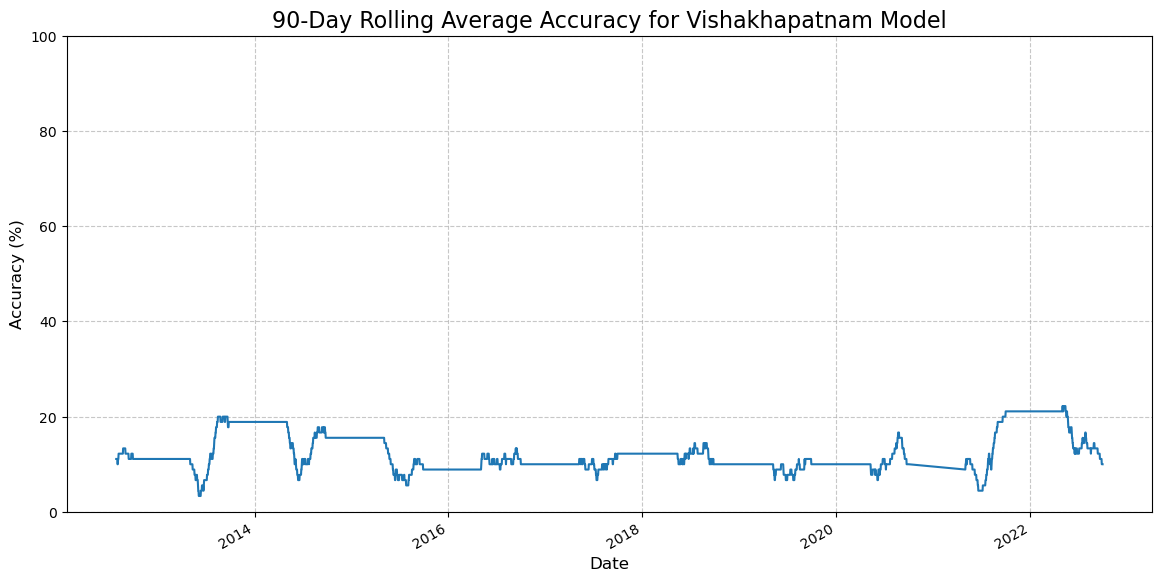

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/predictions_results_Vishakhapatnam.csv'
df_vishakhapatnam = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

df_vishakhapatnam['is_correct'] = (df_vishakhapatnam['True_Bins'] == df_vishakhapatnam['Predicted_Bins_NN']).astype(int)
rolling_accuracy = df_vishakhapatnam['is_correct'].rolling(window=90).mean() * 100

plt.figure(figsize=(14, 7))
rolling_accuracy.plot()
plt.title('90-Day Rolling Average Accuracy for Vishakhapatnam Model', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.show()

In [33]:
import xarray as xr

ds = xr.open_dataset('C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/imd_rf_1x1_2016.nc')  

print(f"Original minimum rainfall: {ds['RAINFALL'].min().item():.2f} mm")

ds['RAINFALL'] = ds['RAINFALL'].where(ds['RAINFALL'] >= 0)

print(f"New minimum rainfall after cleaning: {ds['RAINFALL'].min().item():.2f} mm")

Original minimum rainfall: 0.00 mm
New minimum rainfall after cleaning: 0.00 mm


In [34]:
import xarray as xr
import os
import glob
import numpy as np


def clean_negative_rainfall(ds):
    """
    A function to replace negative rainfall values with NaN (Not a Number).
    This will be applied to each NetCDF file as it is opened.
    """
    ds['RAINFALL'] = ds['RAINFALL'].where(ds['RAINFALL'] >= 0)
    return ds


data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"
file_pattern = os.path.join(data_path, "*.nc")
matching_files = sorted(glob.glob(file_pattern))

if matching_files:
    print(f"Found {len(matching_files)} files. Loading and cleaning them now...")
    ds_cleaned = xr.open_mfdataset(
        matching_files, 
        combine='by_coords', 
        preprocess=clean_negative_rainfall, # This is the key part
        parallel=True
    )
    
    print("All files have been loaded and cleaned.")
    print("Calculating the new minimum rainfall from the entire dataset...")
    new_min = ds_cleaned['RAINFALL'].min().compute()
    
    print("\n--- Verification ---")
    print(f"The minimum rainfall value after cleaning is: {new_min.item():.2f} mm")
    
else:
    print(f"No .nc files were found in the folder: {data_path}")

Found 122 files. Loading and cleaning them now...
All files have been loaded and cleaned.
Calculating the new minimum rainfall from the entire dataset...

--- Verification ---
The minimum rainfall value after cleaning is: 0.00 mm


In [35]:
import pandas as pd
import os
import glob

folder_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/'

csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

if not csv_files:
    print(f"ERROR: No CSV files were found in the folder: {folder_path}")
else:
    print(f"Found {len(csv_files)} CSV files. Combining them...")
    

    list_of_dataframes = []
    for f in csv_files:
        df = pd.read_csv(f)
        df['city'] = os.path.basename(f).replace('predictions_results_', '').replace('.csv', '')
        list_of_dataframes.append(df)

    
    all_cities_df = pd.concat(list_of_dataframes, ignore_index=True)
    print(f"Combined data into a single DataFrame with {len(all_cities_df)} rows.")

    

    print("\nChecking for duplicates across all cities...")
   
    duplicate_rows = all_cities_df.duplicated(subset=['Date', 'city']).sum()

    if duplicate_rows > 0:
        print(f"Found {duplicate_rows} duplicate rows. Removing them...")
        # Drop the duplicates, keeping the first instance
        all_cities_df = all_cities_df.drop_duplicates(subset=['Date', 'city'], keep='first', inplace=False)
        print(f"DataFrame now has {len(all_cities_df)} rows after removing duplicates.")
    else:
        print("No duplicate rows found.")

    
    print("\nSample of the final, clean DataFrame:")
    print(all_cities_df.head())

Found 8 CSV files. Combining them...
Combined data into a single DataFrame with 13464 rows.

Checking for duplicates across all cities...
No duplicate rows found.

Sample of the final, clean DataFrame:
         Date  True_Bins  Predicted_Bins_NN       city
0  2012-05-01        1.0                1.0  Ahmedabad
1  2012-05-02        1.0                1.0  Ahmedabad
2  2012-05-03        1.0                1.0  Ahmedabad
3  2012-05-04        1.0                1.0  Ahmedabad
4  2012-05-05        1.0                1.0  Ahmedabad


In [36]:
valid_bins = [1.0, 2.0, 3.0, 4.0]

invalid_true_bins = all_cities_df[~all_cities_df['True_Bins'].isin(valid_bins)]

invalid_predicted_bins = all_cities_df[~all_cities_df['Predicted_Bins_NN'].isin([1.0, 2.0, 3.0])]

if invalid_true_bins.empty:
    print("All values in 'True_Bins' are valid.")
else:
    print("Found invalid entries in 'True_Bins':")
    print(invalid_true_bins)

if invalid_predicted_bins.empty:
    print("All values in 'Predicted_Bins_NN' are valid.")
else:
    print("Found invalid entries in 'Predicted_Bins_NN':")
    print(invalid_predicted_bins)

Found invalid entries in 'True_Bins':
             Date  True_Bins  Predicted_Bins_NN            city
1684   2012-05-02        5.0                2.0       Bangalore
1691   2012-05-09        5.0                2.0       Bangalore
1698   2012-05-16        5.0                2.0       Bangalore
1758   2012-07-15        5.0                2.0       Bangalore
1759   2012-07-16        5.0                3.0       Bangalore
...           ...        ...                ...             ...
13456  2022-09-23        5.0                2.0  Vishakhapatnam
13458  2022-09-25        5.0                3.0  Vishakhapatnam
13459  2022-09-26        5.0                3.0  Vishakhapatnam
13462  2022-09-29        5.0                2.0  Vishakhapatnam
13463  2022-09-30        5.0                3.0  Vishakhapatnam

[2501 rows x 4 columns]
Found invalid entries in 'Predicted_Bins_NN':
             Date  True_Bins  Predicted_Bins_NN            city
548    2015-07-29        4.0                4.0       Ahmed

In [37]:
import pandas as pd
import os
import glob

print("--- Analyzing Date Ranges for All City CSV Files ---")


folder_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/'
csv_files = glob.glob(os.path.join(folder_path, "predictions_results_*.csv"))

if not csv_files:
    print(f"ERROR: No prediction CSV files were found in the folder: {folder_path}")
else:
    date_ranges = []
    for file_path in csv_files:
        try:
            
            city_name = os.path.basename(file_path).replace('predictions_results_', '').replace('.csv', '')
            
           
            df = pd.read_csv(file_path)
            
            
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df.dropna(subset=['Date'], inplace=True) # Drop rows where date conversion failed
            
            if not df.empty:
                start_date = df['Date'].min().strftime('%Y-%m-%d')
                end_date = df['Date'].max().strftime('%Y-%m-%d')
                total_days = len(df)
                date_ranges.append([city_name, start_date, end_date, total_days])
            else:
                date_ranges.append([city_name, 'N/A', 'N/A', 0])

        except Exception as e:
            print(f"Could not process {os.path.basename(file_path)}. Error: {e}")

    
    summary_df = pd.DataFrame(date_ranges, columns=['City', 'Start Date', 'End Date', 'Total Days'])
    print("\n--- Data Availability Summary ---")
    print(summary_df)
    print("\nThis table shows the time period covered by each city's data file.")

--- Analyzing Date Ranges for All City CSV Files ---

--- Data Availability Summary ---
             City  Start Date    End Date  Total Days
0       Ahmedabad  2012-05-01  2022-09-30        1683
1       Bangalore  2012-05-01  2022-09-30        1683
2          Bhopal  2012-05-01  2022-09-30        1683
3           Delhi  2012-05-01  2022-09-30        1683
4       Hyderabad  2012-05-01  2022-09-30        1683
5           Kochi  2012-05-01  2022-09-30        1683
6          Mumbai  2012-05-01  2022-09-30        1683
7  Vishakhapatnam  2012-05-01  2022-09-30        1683

This table shows the time period covered by each city's data file.


In [38]:
import xarray as xr
import os
import glob
import numpy as np

print("--- Cleaning All .nc Rainfall Files ---")


def clean_negative_rainfall(ds):
    """This function is applied to each file as it is loaded."""
    ds['RAINFALL'] = ds['RAINFALL'].where(ds['RAINFALL'] >= 0)
    return ds


data_path = "C:/Users/adars/Downloads/Weather_Data/Weather_Data/raindata/"
file_pattern = os.path.join(data_path, "imd_rf_1x1_*.nc")
matching_files = sorted(glob.glob(file_pattern))

if matching_files:
    print(f"Found {len(matching_files)} files. Loading and cleaning them now...")
    
   
    ds_cleaned = xr.open_mfdataset(
        matching_files, 
        combine='by_coords', 
        preprocess=clean_negative_rainfall,
        parallel=True
    )
    
    print("All files have been loaded into a clean virtual dataset.")

    
    print("Verifying the data by calculating the new minimum rainfall...")
   
    new_min = ds_cleaned['RAINFALL'].min().compute()
    
    print("\n--- Verification Complete ---")
    print(f"The minimum rainfall value in the cleaned dataset is now: {new_min.item():.2f} mm")
    print("\nYou can now use the 'ds_cleaned' object for all further rainfall analyses.")

else:
    print(f"No .nc files were found in the folder: {data_path}")

--- Cleaning All .nc Rainfall Files ---
Found 122 files. Loading and cleaning them now...
All files have been loaded into a clean virtual dataset.
Verifying the data by calculating the new minimum rainfall...

--- Verification Complete ---
The minimum rainfall value in the cleaned dataset is now: 0.00 mm

You can now use the 'ds_cleaned' object for all further rainfall analyses.


--- Generating Detailed Performance Reports for All Cities ---

ANALYSIS FOR: AHMEDABAD

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.89      0.79      0.84      1157
         2.0       0.16      0.40      0.22       160
         3.0       0.26      0.36      0.30       181
         4.0       0.67      0.01      0.02       185

    accuracy                           0.62      1683
   macro avg       0.49      0.39      0.35      1683
weighted avg       0.73      0.62      0.63      1683


--- Confusion Matrix ---


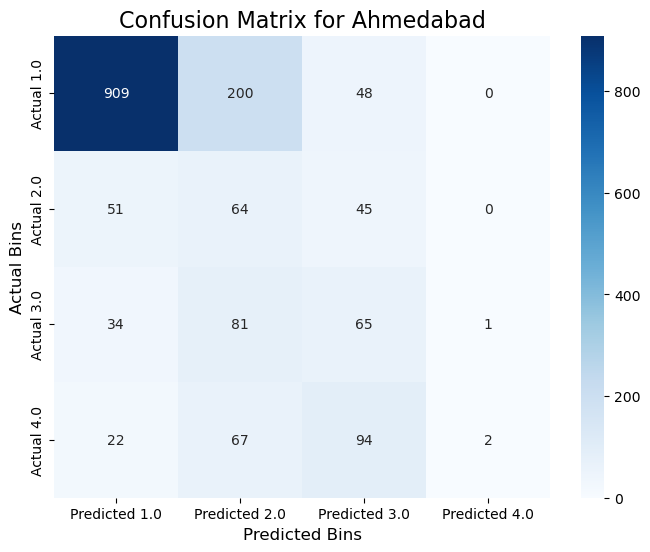


ANALYSIS FOR: BANGALORE

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       929
         2.0       0.12      0.76      0.21       202
         3.0       0.17      0.34      0.22       193
         4.0       0.00      0.00      0.00       165
         5.0       0.00      0.00      0.00       194

    accuracy                           0.13      1683
   macro avg       0.06      0.22      0.09      1683
weighted avg       0.03      0.13      0.05      1683


--- Confusion Matrix ---


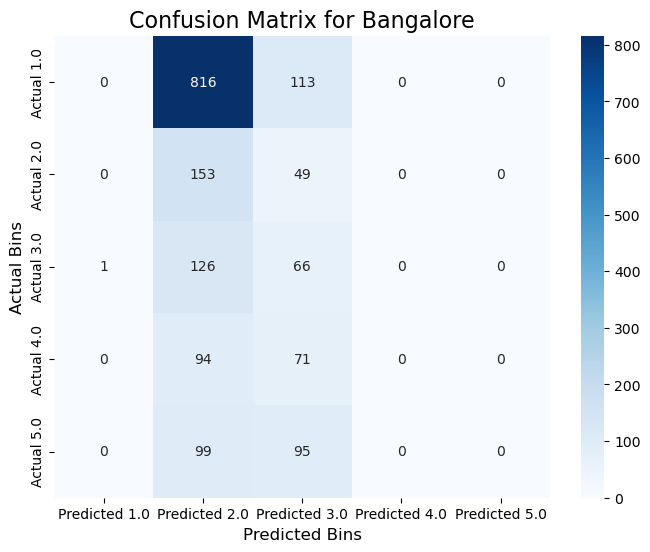


ANALYSIS FOR: BHOPAL

--- Classification Report ---
              precision    recall  f1-score   support

           1       0.90      0.55      0.68       825
           2       0.06      0.15      0.09       120
           3       0.11      0.20      0.14       114
           4       0.12      0.29      0.17       125
           5       0.18      0.31      0.23       129
           6       0.13      0.16      0.14       129
           7       0.11      0.01      0.02       106
           8       0.00      0.00      0.00       135

    accuracy                           0.35      1683
   macro avg       0.20      0.21      0.18      1683
weighted avg       0.49      0.35      0.39      1683


--- Confusion Matrix ---


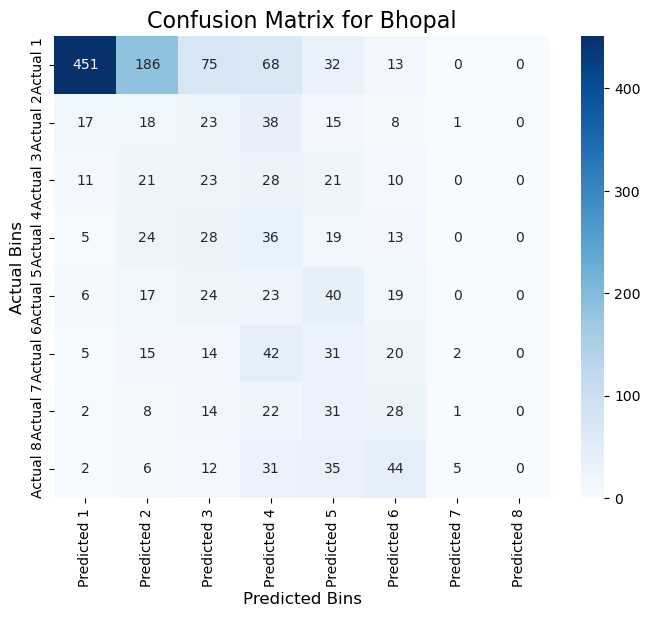


ANALYSIS FOR: DELHI

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.84      0.71      0.77      1189
         2.0       0.17      0.52      0.26       203
         3.0       0.26      0.08      0.12       196
         4.0       0.00      0.00      0.00        95

    accuracy                           0.57      1683
   macro avg       0.32      0.33      0.29      1683
weighted avg       0.64      0.57      0.59      1683


--- Confusion Matrix ---


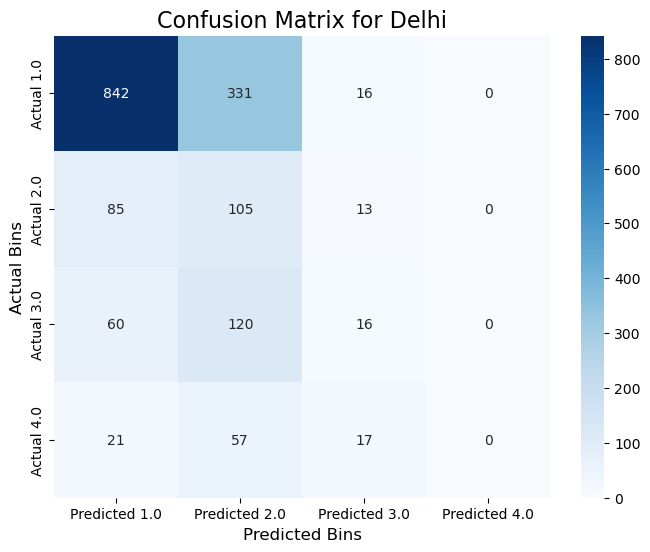


ANALYSIS FOR: HYDERABAD

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.78      0.30      0.43       999
         2.0       0.10      0.60      0.17       159
         3.0       0.15      0.31      0.20       173
         4.0       0.00      0.00      0.00       168
         5.0       0.00      0.00      0.00       184

    accuracy                           0.26      1683
   macro avg       0.21      0.24      0.16      1683
weighted avg       0.49      0.26      0.29      1683


--- Confusion Matrix ---


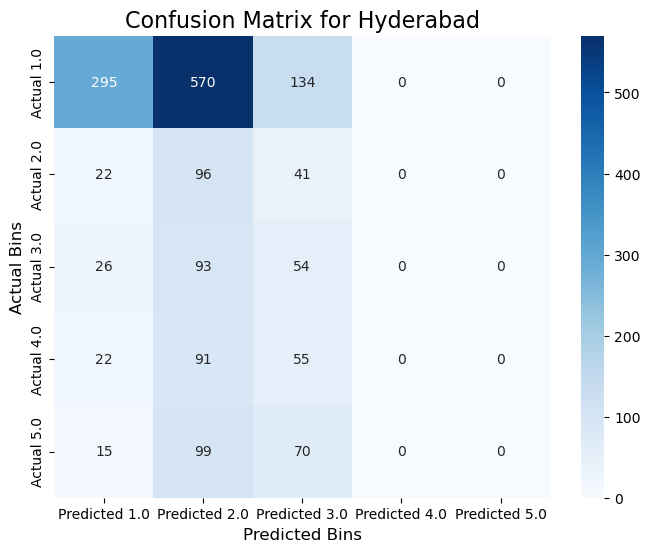


ANALYSIS FOR: KOCHI

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       305
         2.0       0.13      0.17      0.15       153
         3.0       0.14      0.15      0.15       216
         4.0       0.16      0.28      0.21       199
         5.0       0.14      0.34      0.19       179
         6.0       0.18      0.28      0.22       188
         7.0       0.14      0.11      0.13       174
         8.0       0.14      0.03      0.05       123
         9.0       0.00      0.00      0.00       146

    accuracy                           0.15      1683
   macro avg       0.11      0.15      0.12      1683
weighted avg       0.11      0.15      0.12      1683


--- Confusion Matrix ---


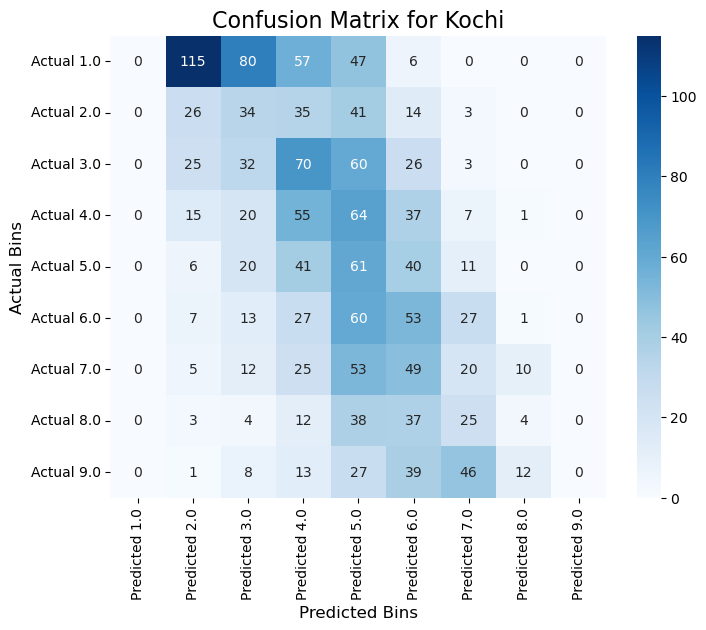


ANALYSIS FOR: MUMBAI

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       0.90      0.66      0.76       743
         2.0       0.17      0.33      0.22       150
         3.0       0.25      0.44      0.31       186
         4.0       0.18      0.30      0.23       186
         5.0       0.24      0.28      0.26       195
         6.0       0.00      0.00      0.00       223

    accuracy                           0.43      1683
   macro avg       0.29      0.33      0.30      1683
weighted avg       0.49      0.43      0.45      1683


--- Confusion Matrix ---


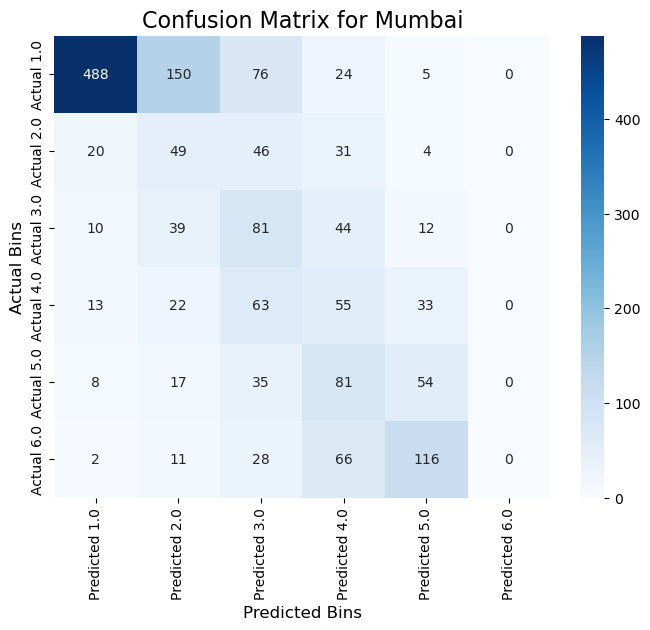


ANALYSIS FOR: VISHAKHAPATNAM

--- Classification Report ---
              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00       738
         2.0       0.10      0.45      0.16       187
         3.0       0.13      0.47      0.20       187
         4.0       0.11      0.09      0.10       175
         5.0       0.00      0.00      0.00       185
         6.0       0.00      0.00      0.00       211

    accuracy                           0.11      1683
   macro avg       0.22      0.17      0.08      1683
weighted avg       0.48      0.11      0.05      1683


--- Confusion Matrix ---


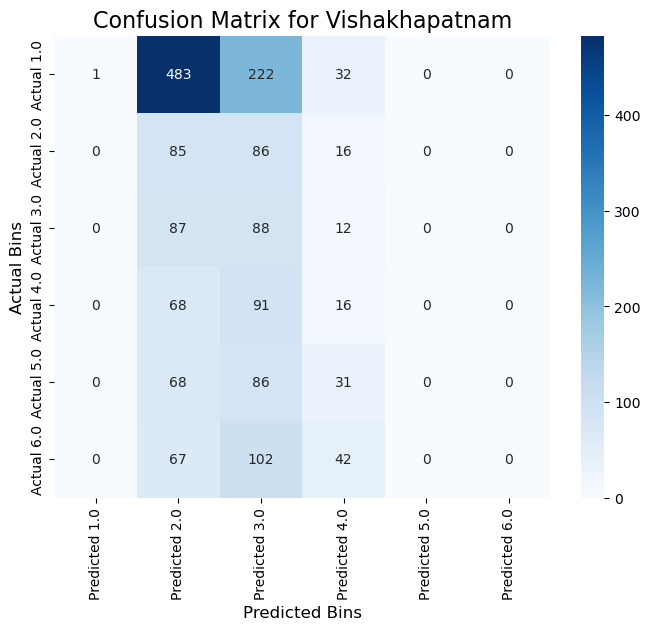

In [39]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

print("--- Generating Detailed Performance Reports for All Cities ---")

folder_path = 'C:/Users/adars/Downloads/Weather_Data/Weather_Data/City_wise/'
csv_files = glob.glob(os.path.join(folder_path, "predictions_results_*.csv"))

for file_path in csv_files:
    try:
        city_name = os.path.basename(file_path).replace('predictions_results_', '').replace('.csv', '')
        print(f"\n{'='*50}")
        print(f"ANALYSIS FOR: {city_name.upper()}")
        print(f"{'='*50}")
        
        df = pd.read_csv(file_path)
        
    
        if 'True_Bins' not in df.columns or 'Predicted_Bins_NN' not in df.columns:
            print(f"Skipping {city_name}: Required columns 'True_Bins' or 'Predicted_Bins_NN' not found.")
            continue

        y_true = df['True_Bins']
        y_pred = df['Predicted_Bins_NN']
        
    
        print("\n--- Classification Report ---")
        report = classification_report(y_true, y_pred, zero_division=0)
        print(report)
        
        
        print("\n--- Confusion Matrix ---")
        labels = sorted(df['True_Bins'].unique())
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        cm_df = pd.DataFrame(cm,
                             index=[f'Actual {i}' for i in labels], 
                             columns=[f'Predicted {i}' for i in labels])
        
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {city_name}', fontsize=16)
        plt.xlabel('Predicted Bins', fontsize=12)
        plt.ylabel('Actual Bins', fontsize=12)
        plt.show()

    except Exception as e:
        print(f"\nCould not process {os.path.basename(file_path)}. Error: {e}")

In [3]:
import imdlib as imd

print("Starting the temperature data download...")

data = imd.get_data(
    var_type = 'tmax',
    start_yr = 1951,
    end_yr = 2022,
    file_dir = './temperature_data' # This will create a new folder for your temp data
)

print("Download complete! ✅")
print("The data has been saved to the 'temperature_data' folder.")

Starting the temperature data download...
Downloading: maxtemp for year 1951
Downloading: maxtemp for year 1952
Downloading: maxtemp for year 1953
Downloading: maxtemp for year 1954
Downloading: maxtemp for year 1955
Downloading: maxtemp for year 1956
Downloading: maxtemp for year 1957
Downloading: maxtemp for year 1958
Downloading: maxtemp for year 1959
Downloading: maxtemp for year 1960
Downloading: maxtemp for year 1961
Downloading: maxtemp for year 1962
Downloading: maxtemp for year 1963
Downloading: maxtemp for year 1964
Downloading: maxtemp for year 1965
Downloading: maxtemp for year 1966
Downloading: maxtemp for year 1967
Downloading: maxtemp for year 1968
Downloading: maxtemp for year 1969
Downloading: maxtemp for year 1970
Downloading: maxtemp for year 1971
Downloading: maxtemp for year 1972
Downloading: maxtemp for year 1973
Downloading: maxtemp for year 1974
Downloading: maxtemp for year 1975
Downloading: maxtemp for year 1976
Downloading: maxtemp for year 1977
Downloading: 

FileNotFoundError: [Errno 2] No such file or directory: './temperature_data/Maxtemp_MaxT_1951.GRD'

In [5]:
import xarray as xr
import imdlib as imd

# Find the path to your downloaded temperature data
# Make sure the folder name matches what you used in the download step
data = imd.get_data(
    var_type='tmax',
    start_yr=1951,
    end_yr=2022,
    file_dir='./temperature_data'
)

# Load the .nc file into the ds_temp variable
ds_temp = xr.open_dataset(data.path)

print("--- Temperature Dataset Loaded Successfully! ---")
print(ds_temp)

Downloading: maxtemp for year 1951
Downloading: maxtemp for year 1952
Downloading: maxtemp for year 1953
Downloading: maxtemp for year 1954
Downloading: maxtemp for year 1955
Downloading: maxtemp for year 1956
Downloading: maxtemp for year 1957
Downloading: maxtemp for year 1958
Downloading: maxtemp for year 1959
Downloading: maxtemp for year 1960
Downloading: maxtemp for year 1961
Downloading: maxtemp for year 1962
Downloading: maxtemp for year 1963
Downloading: maxtemp for year 1964
Downloading: maxtemp for year 1965
Downloading: maxtemp for year 1966
Downloading: maxtemp for year 1967
Downloading: maxtemp for year 1968
Downloading: maxtemp for year 1969
Downloading: maxtemp for year 1970
Downloading: maxtemp for year 1971
Downloading: maxtemp for year 1972
Downloading: maxtemp for year 1973
Downloading: maxtemp for year 1974
Downloading: maxtemp for year 1975
Downloading: maxtemp for year 1976
Downloading: maxtemp for year 1977
Downloading: maxtemp for year 1978
Downloading: maxtemp

FileNotFoundError: [Errno 2] No such file or directory: './temperature_data/Maxtemp_MaxT_1951.GRD'

In [6]:
# Now you can run this without any errors
temp_stats = ds_temp['tmax'].describe()

print("--- Overall Temperature Statistics ---")
print(temp_stats)

NameError: name 'ds_temp' is not defined

In [8]:
import imdlib as imd

print("Starting final download and file creation...")

# Run this and wait for it to complete.
data = imd.get_data(
    var_type='tmax',
    start_yr=1951,
    end_yr=2022,
    file_dir='./temperature_data'
)

print("Download process finished. The final .nc file has been created.")

Starting final download and file creation...
Downloading: maxtemp for year 1951
Downloading: maxtemp for year 1952
Downloading: maxtemp for year 1953
Downloading: maxtemp for year 1954
Downloading: maxtemp for year 1955
Downloading: maxtemp for year 1956
Downloading: maxtemp for year 1957
Downloading: maxtemp for year 1958
Downloading: maxtemp for year 1959
Downloading: maxtemp for year 1960
Downloading: maxtemp for year 1961
Downloading: maxtemp for year 1962
Downloading: maxtemp for year 1963
Downloading: maxtemp for year 1964
Downloading: maxtemp for year 1965
Downloading: maxtemp for year 1966
Downloading: maxtemp for year 1967
Downloading: maxtemp for year 1968
Downloading: maxtemp for year 1969
Downloading: maxtemp for year 1970
Downloading: maxtemp for year 1971
Downloading: maxtemp for year 1972
Downloading: maxtemp for year 1973
Downloading: maxtemp for year 1974
Downloading: maxtemp for year 1975
Downloading: maxtemp for year 1976
Downloading: maxtemp for year 1977
Downloadin

FileNotFoundError: [Errno 2] No such file or directory: './temperature_data/Maxtemp_MaxT_1951.GRD'

In [9]:
import os
print(os.getcwd())

C:\Users\adars


In [11]:
# You must run this cell first!
import xarray as xr
ds_temp = xr.open_dataset(C:\Users\adars) # or the full path to your .nc file

SyntaxError: invalid syntax (1604509747.py, line 3)

In [12]:
import imdlib as imd
import os

folder_path = r'C:\Users\adars\temperature_data'

print(f"Attempting to download and process files into: {folder_path}\n")

try:
    data = imd.get_data(
        var_type='tmax',
        start_yr=1951,
        end_yr=2022,
        file_dir=folder_path  
    )
    print("\n'imdlib' process finished without errors.")
    # If successful, data.path will hold the filename
    final_file = data.path
    print(f"The final file should be: {final_file}")

except Exception as e:
    print(f"\nAn error occurred during the imdlib process: {e}")


print("\n--- Verifying Folder Contents ---")
if os.path.exists(folder_path):
    files_in_directory = os.listdir(folder_path)
    if files_in_directory:
        print(f"Found the following files in {folder_path}:")
        for file in files_in_directory:
            print(f"- {file}")
    else:
        print("The folder exists, but it is empty.")
else:
    print("The folder was not created. The download likely failed at the very beginning.")

Attempting to download and process files into: C:\Users\adars\temperature_data

Downloading: maxtemp for year 1951
Downloading: maxtemp for year 1952
Downloading: maxtemp for year 1953
Downloading: maxtemp for year 1954
Downloading: maxtemp for year 1955
Downloading: maxtemp for year 1956
Downloading: maxtemp for year 1957
Downloading: maxtemp for year 1958
Downloading: maxtemp for year 1959
Downloading: maxtemp for year 1960
Downloading: maxtemp for year 1961
Downloading: maxtemp for year 1962
Downloading: maxtemp for year 1963
Downloading: maxtemp for year 1964
Downloading: maxtemp for year 1965
Downloading: maxtemp for year 1966
Downloading: maxtemp for year 1967
Downloading: maxtemp for year 1968
Downloading: maxtemp for year 1969
Downloading: maxtemp for year 1970
Downloading: maxtemp for year 1971
Downloading: maxtemp for year 1972
Downloading: maxtemp for year 1973
Downloading: maxtemp for year 1974
Downloading: maxtemp for year 1975
Downloading: maxtemp for year 1976
Downloadin

In [8]:
print("--- Overall Temperature Statistics ---")
print("Mean:", ds_temp.mean().values)
print("Std Dev:", ds_temp.std().values)
print("Min:", ds_temp.min().values)
print("Max:", ds_temp.max().values)
print("Median:", ds_temp.median().values)


--- Overall Temperature Statistics ---
Mean: 80.75907897949219
Std Dev: 31.283199310302734
Min: -2.059999942779541
Max: 99.9000015258789
Median: 99.9000015258789


C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


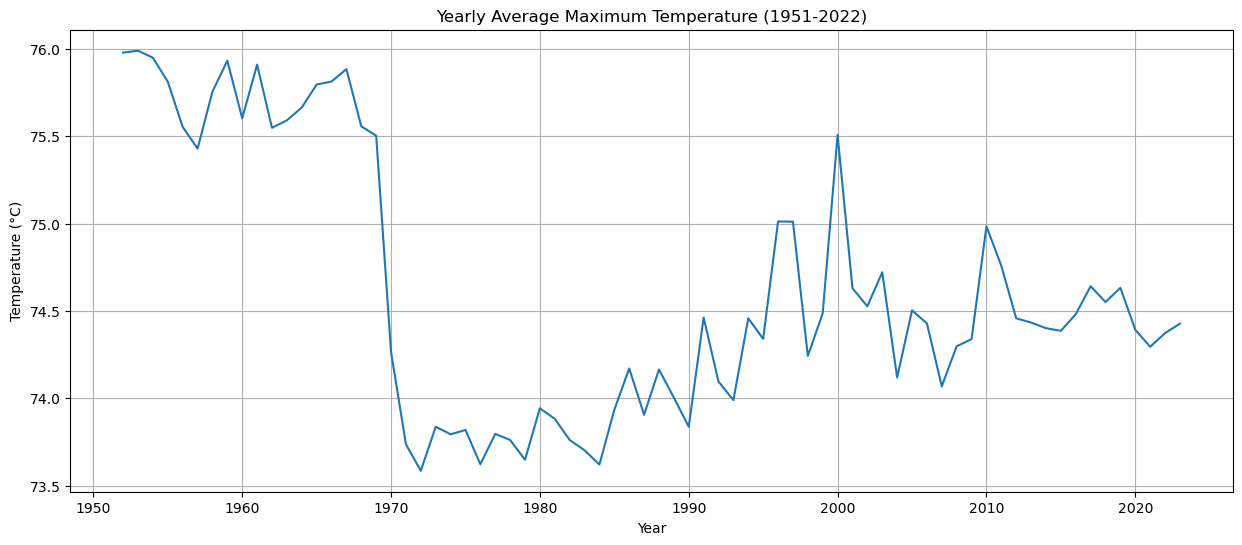

In [9]:
import matplotlib.pyplot as plt

yearly_avg_temp = ds_temp.resample(time='1Y').mean()
yearly_avg_temp.mean(dim=['lat', 'lon']).plot(figsize=(15, 6))

plt.title('Yearly Average Maximum Temperature (1951-2022)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

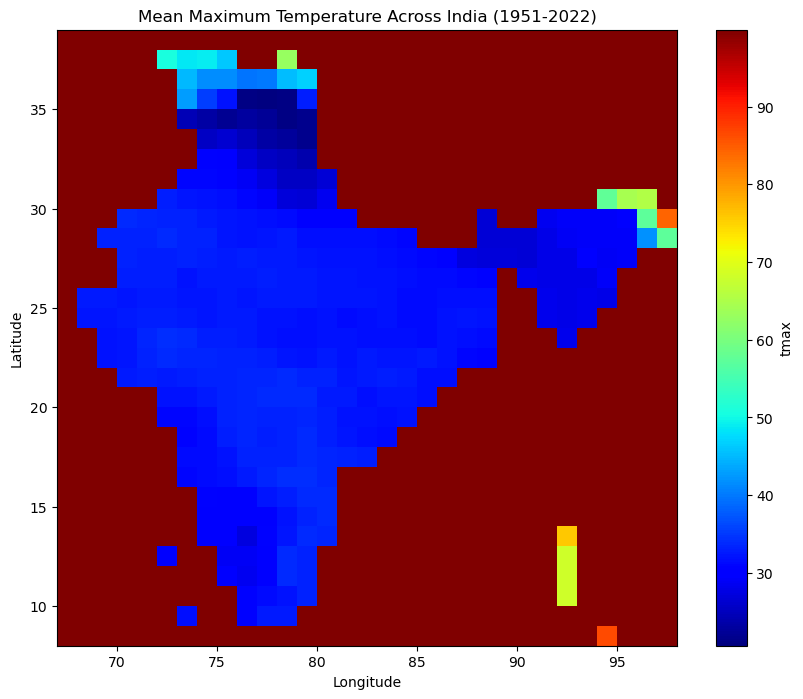

In [10]:
mean_spatial_temp = ds_temp.mean(dim='time')

mean_spatial_temp.plot(figsize=(10, 8), cmap='jet') # 'jet' is a good colormap for temp

plt.title('Mean Maximum Temperature Across India (1951-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

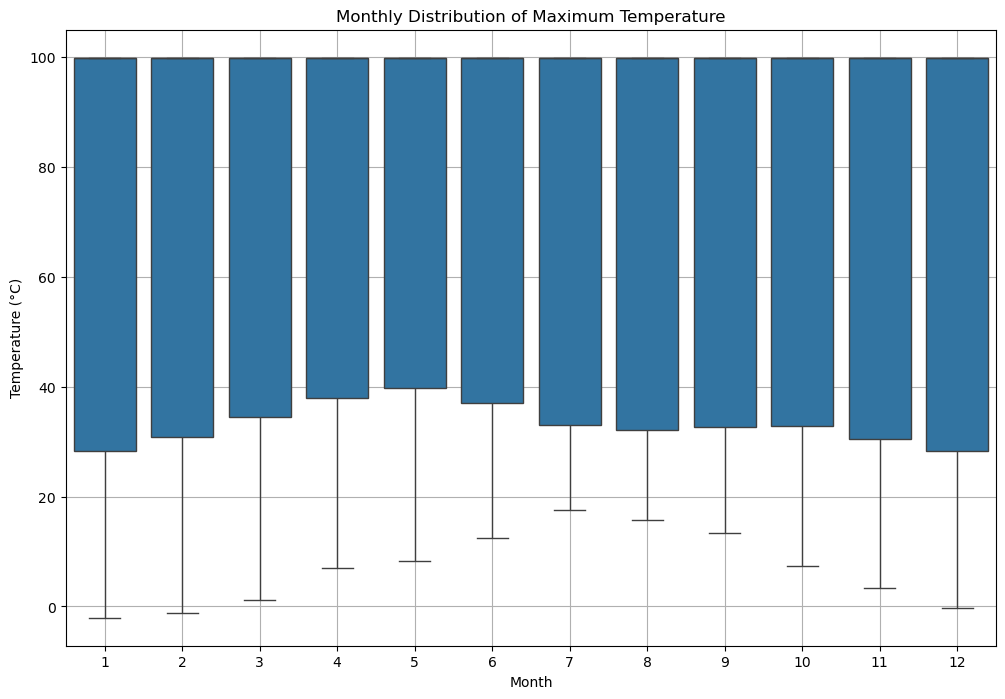

In [13]:
import pandas as pd
import seaborn as sns


df_temp = ds_temp.to_dataframe().reset_index()

df_temp['month'] = df_temp['time'].dt.month

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_temp, x='month', y='tmax')

plt.title('Monthly Distribution of Maximum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


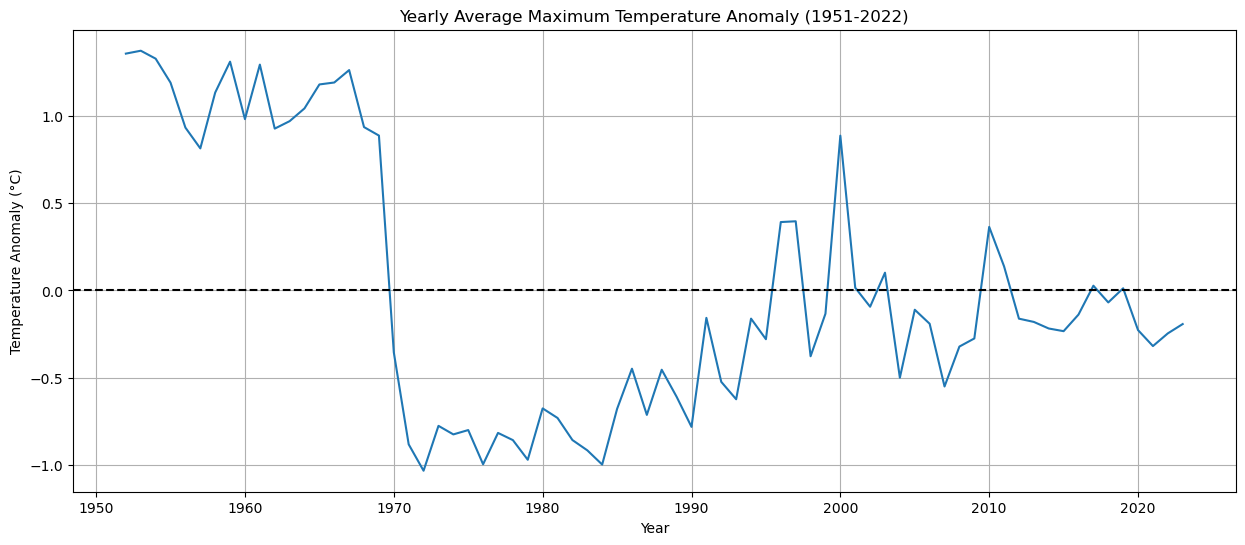

In [14]:
climatology = ds_temp.groupby('time.dayofyear').mean('time')

anomaly = ds_temp.groupby('time.dayofyear') - climatology

plt.figure(figsize=(15, 6))
yearly_anomaly = anomaly.resample(time='1Y').mean()
yearly_anomaly.mean(dim=['lat', 'lon']).plot()

plt.title('Yearly Average Maximum Temperature Anomaly (1951-2022)')
plt.ylabel('Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.axhline(0, color='black', linestyle='--') # Add a line at zero for reference
plt.grid(True)
plt.show()

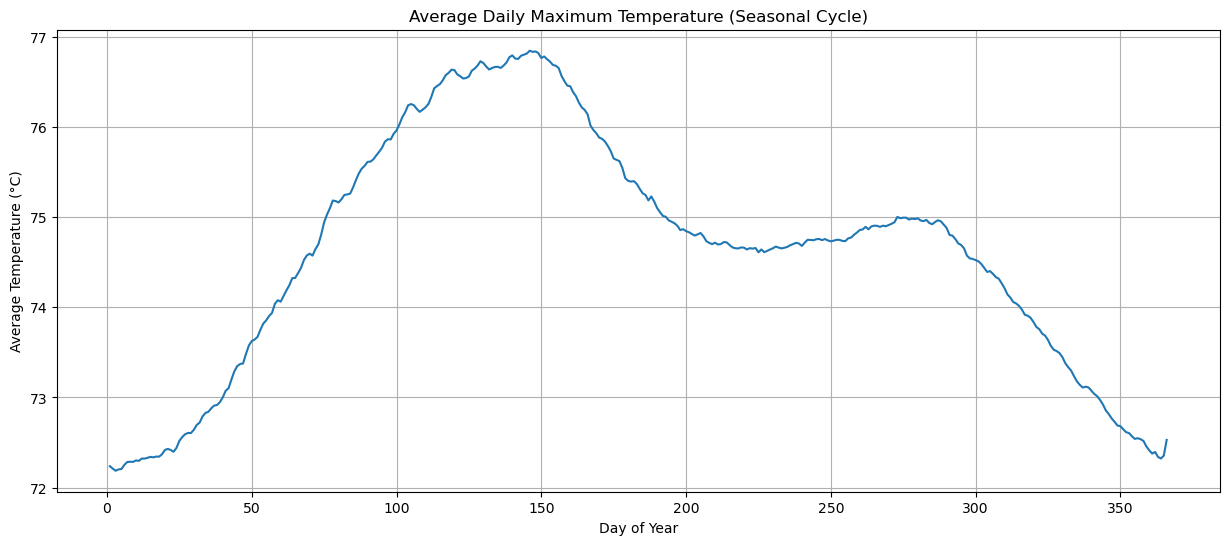

In [15]:
climatology.mean(dim=['lat', 'lon']).plot(figsize=(15, 6))

plt.title('Average Daily Maximum Temperature (Seasonal Cycle)')
plt.xlabel('Day of Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

In [16]:
yearly_mean_temp = ds_temp.resample(time='1Y').mean().mean(dim=['lat', 'lon'])

top_10_hottest_years = yearly_mean_temp.sortby(yearly_mean_temp, ascending=False).to_dataframe().head(10)

print("--- Top 10 Hottest Years on Record ---")
print(top_10_hottest_years)

C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


--- Top 10 Hottest Years on Record ---
                 tmax
time                 
1952-12-31  75.989265
1951-12-31  75.978378
1953-12-31  75.949371
1958-12-31  75.932137
1960-12-31  75.909554
1966-12-31  75.883896
1965-12-31  75.812622
1954-12-31  75.811737
1964-12-31  75.795769
1957-12-31  75.754868


C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


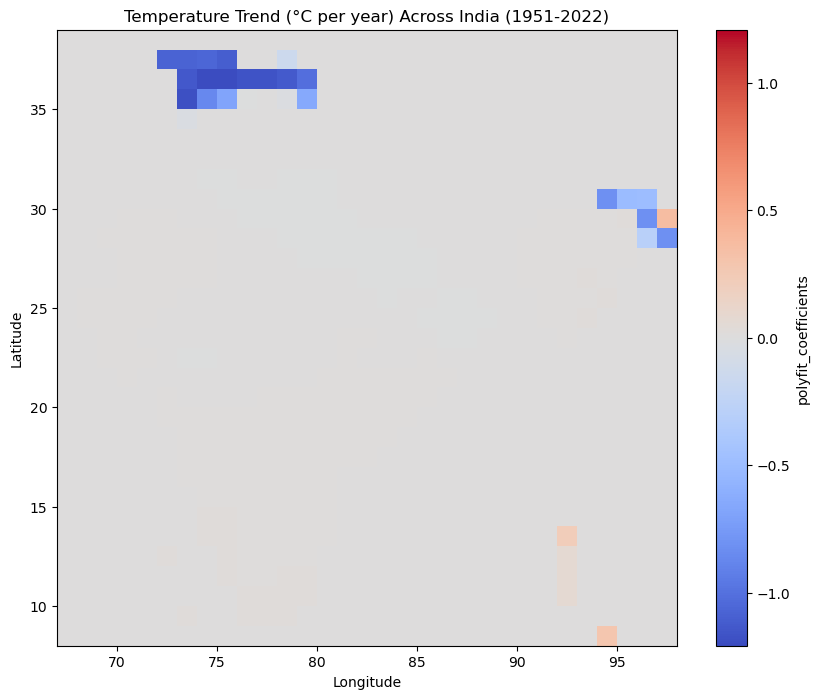

In [17]:
yearly_data = ds_temp.resample(time='1Y').mean()

trend = yearly_data.polyfit(dim='time', deg=1).sel(degree=1) * 1e9 * 365.25 * 24 * 3600

trend['polyfit_coefficients'].plot(figsize=(10, 8), cmap='coolwarm')

plt.title('Temperature Trend (°C per year) Across India (1951-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
import numpy as np

ds_temp_cleaned = ds_temp.where(ds_temp < 60)

print("--- Original Maximum Value ---")
print(f"{ds_temp.max().values}°C")


print("\n--- Maximum Value After Cleaning ---")
print(f"{ds_temp_cleaned.max().values}°C")

--- Original Maximum Value ---
99.9000015258789°C

--- Maximum Value After Cleaning ---
48.770992279052734°C


In [19]:
yearly_mean_temp = ds_temp.resample(time='1Y').mean().mean(dim=['lat', 'lon'])
top_10_hottest_years = yearly_mean_temp.sortby(yearly_mean_temp, ascending=False).to_dataframe().head(10)

print("--- Top 10 Hottest Years on Record ---")
print(top_10_hottest_years)

--- Top 10 Hottest Years on Record ---
                 tmax
time                 
1952-12-31  75.989265
1951-12-31  75.978378
1953-12-31  75.949371
1958-12-31  75.932137
1960-12-31  75.909554
1966-12-31  75.883896
1965-12-31  75.812622
1954-12-31  75.811737
1964-12-31  75.795769
1957-12-31  75.754868


C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


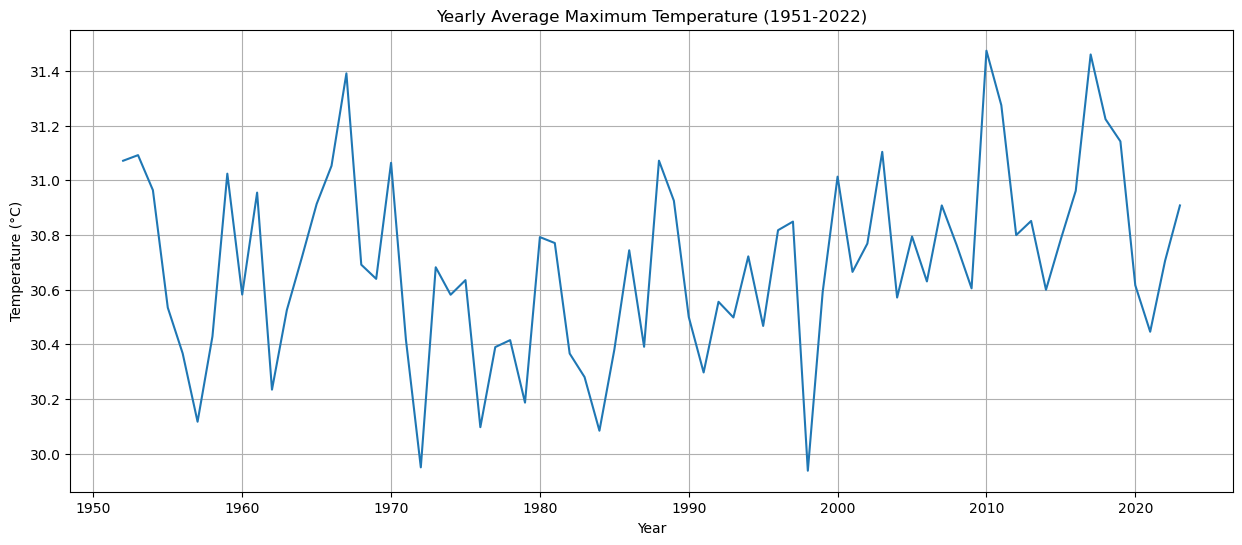

In [20]:
import matplotlib.pyplot as plt

yearly_avg_temp = ds_temp_cleaned.resample(time='1Y').mean()
yearly_avg_temp.mean(dim=['lat', 'lon']).plot(figsize=(15, 6))

plt.title('Yearly Average Maximum Temperature (1951-2022)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [21]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
import os

print("Starting the manual data loading process...")


NLAT = 31
NLON = 31
START_LAT = 8.5
END_LAT = 38.5
START_LON = 67.5
END_LON = 97.5

folder_path = r'C:\Users\adars'
search_pattern = os.path.join(folder_path, 'Maxtemp_MaxT_*.GRD')
file_list = sorted(glob.glob(search_pattern))

yearly_datasets = []
for file_path in file_list:
    year = int(file_path[-8:-4])
    dates = pd.to_datetime(pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D'))
    ntime = len(dates)
    with open(file_path, 'rb') as f:
        raw_data = np.fromfile(f, dtype=np.float32)
    reshaped_data = raw_data.reshape(ntime, NLAT, NLON)
    lats = np.linspace(START_LAT, END_LAT, NLAT)
    lons = np.linspace(START_LON, END_LON, NLON)
    da = xr.DataArray(
        data=reshaped_data,
        coords={'time': dates, 'lat': lats, 'lon': lons},
        dims=['time', 'lat', 'lon'],
        name='tmax'
    )
    yearly_datasets.append(da)

ds_temp = xr.concat(yearly_datasets, dim='time')
ds_temp_cleaned = ds_temp.where(ds_temp < 60) # This removes impossible values

print("\n--- All Temperature Files Loaded and Cleaned Successfully! ---")
print(ds_temp_cleaned)

Starting the manual data loading process...

--- All Temperature Files Loaded and Cleaned Successfully! ---
<xarray.DataArray 'tmax' (time: 26298, lat: 31, lon: 31)> Size: 101MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [26]:
temp_stats = ds_temp_cleaned.to_dataframe().describe()

print("--- Overall Temperature Statistics (Cleaned) ---")
print(temp_stats)

print("--- Overall Temperature Statistics (Cleaned) ---")
print(f"Mean: {ds_temp_cleaned.mean().values}")
print(f"Std Dev: {ds_temp_cleaned.std().values}")
print(f"Min: {ds_temp_cleaned.min().values}")
print(f"Max: {ds_temp_cleaned.max().values}")

--- Overall Temperature Statistics (Cleaned) ---
               tmax
count  9.234230e+06
mean   3.070716e+01
std    5.716023e+00
min   -2.060000e+00
25%    2.791245e+01
50%    3.096000e+01
75%    3.408656e+01
max    4.877099e+01
--- Overall Temperature Statistics (Cleaned) ---
Mean: 30.91534996032715
Std Dev: 5.716022491455078
Min: -2.059999942779541
Max: 48.770992279052734


C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


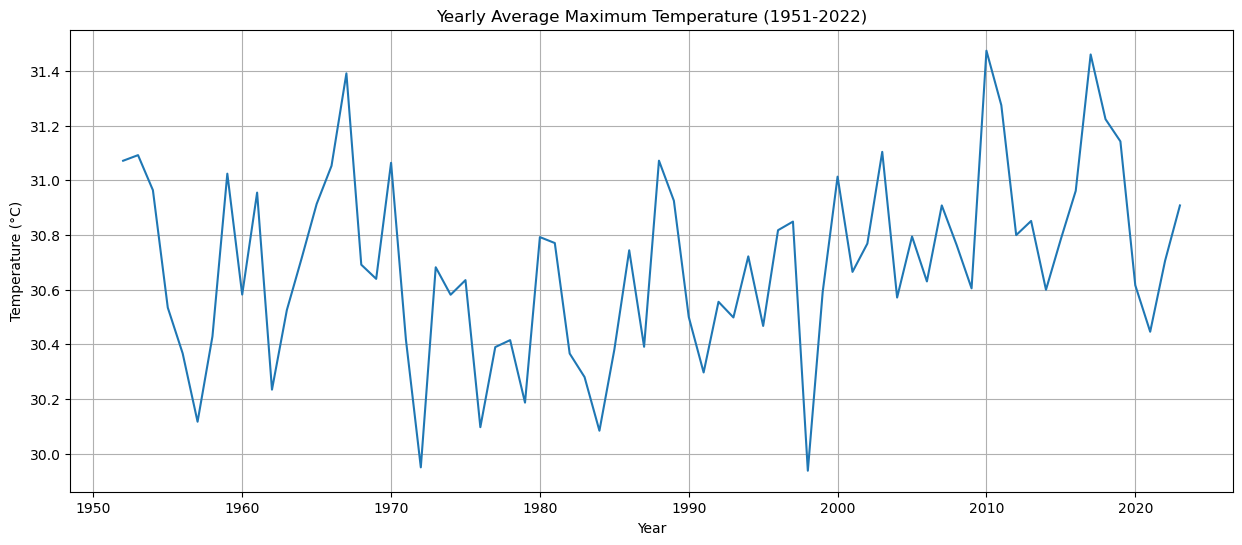

In [27]:
import matplotlib.pyplot as plt

yearly_avg_temp = ds_temp_cleaned.resample(time='1Y').mean()
yearly_avg_temp.mean(dim=['lat', 'lon']).plot(figsize=(15, 6))

plt.title('Yearly Average Maximum Temperature (1951-2022)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

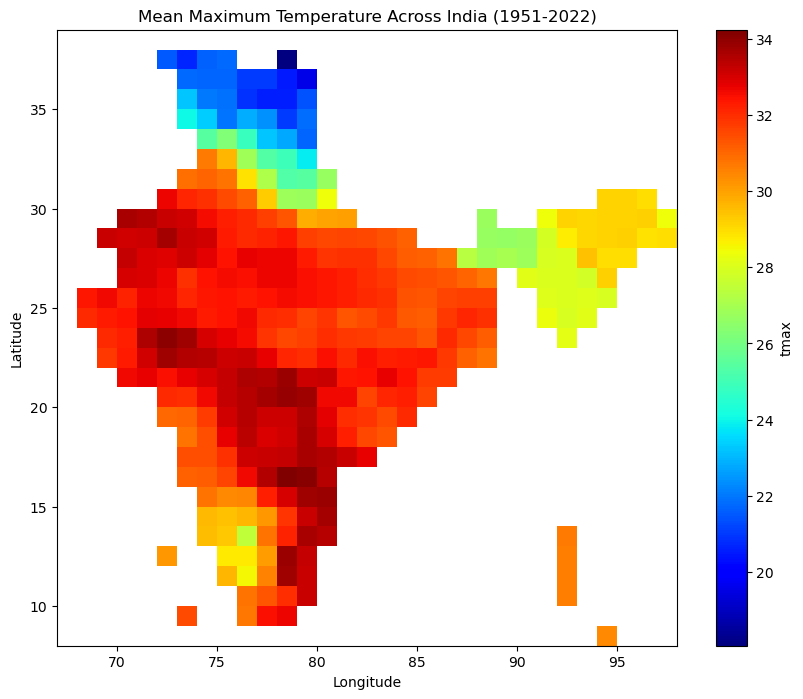

In [28]:
mean_spatial_temp = ds_temp_cleaned.mean(dim='time')

mean_spatial_temp.plot(figsize=(10, 8), cmap='jet')

plt.title('Mean Maximum Temperature Across India (1951-2022)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

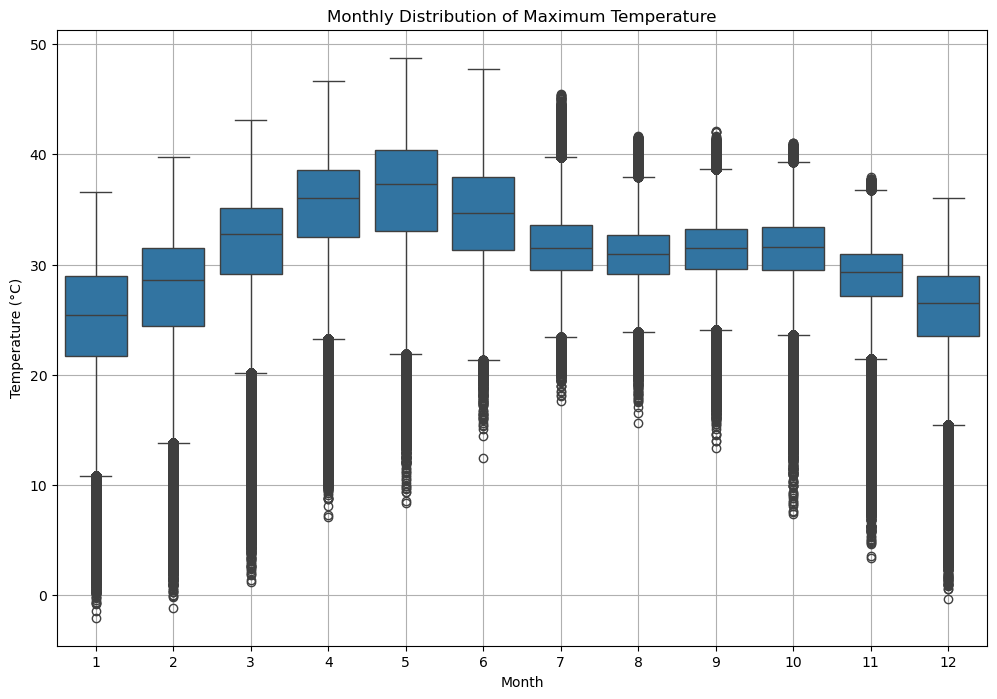

In [29]:
import pandas as pd
import seaborn as sns


df_temp_cleaned = ds_temp_cleaned.to_dataframe().reset_index()

df_temp_cleaned['month'] = df_temp_cleaned['time'].dt.month

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_temp_cleaned, x='month', y='tmax')

plt.title('Monthly Distribution of Maximum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


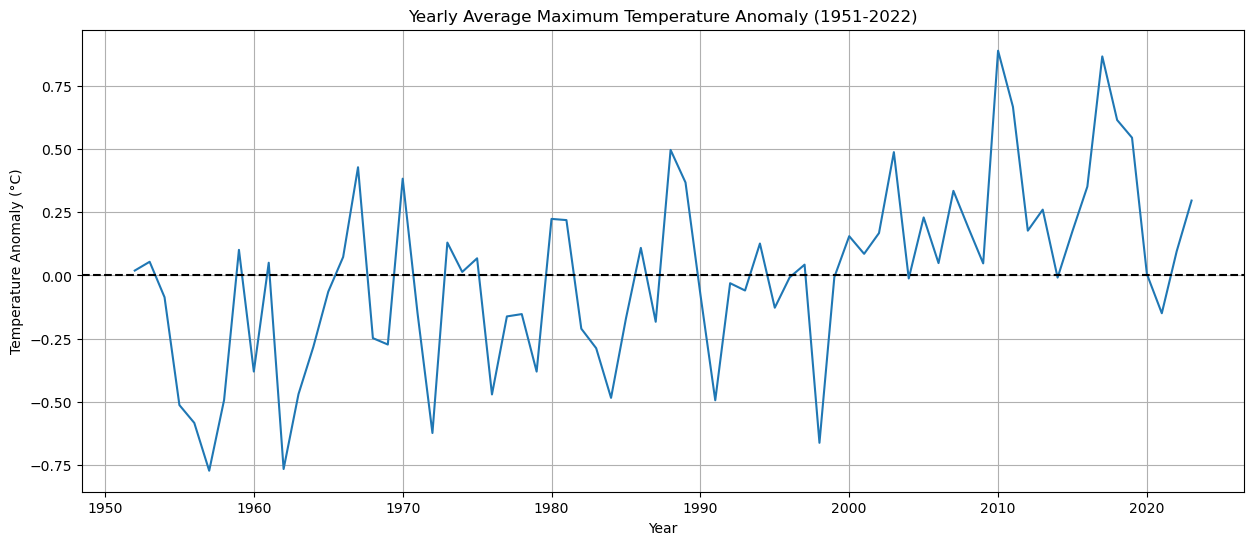

In [30]:
climatology = ds_temp_cleaned.groupby('time.dayofyear').mean('time')

anomaly = ds_temp_cleaned.groupby('time.dayofyear') - climatology

plt.figure(figsize=(15, 6))
yearly_anomaly = anomaly.resample(time='1Y').mean()
yearly_anomaly.mean(dim=['lat', 'lon']).plot()

plt.title('Yearly Average Maximum Temperature Anomaly (1951-2022)')
plt.ylabel('Temperature Anomaly (°C)')
plt.xlabel('Year')
plt.axhline(0, color='black', linestyle='--') # A line at zero for reference
plt.grid(True)
plt.show()

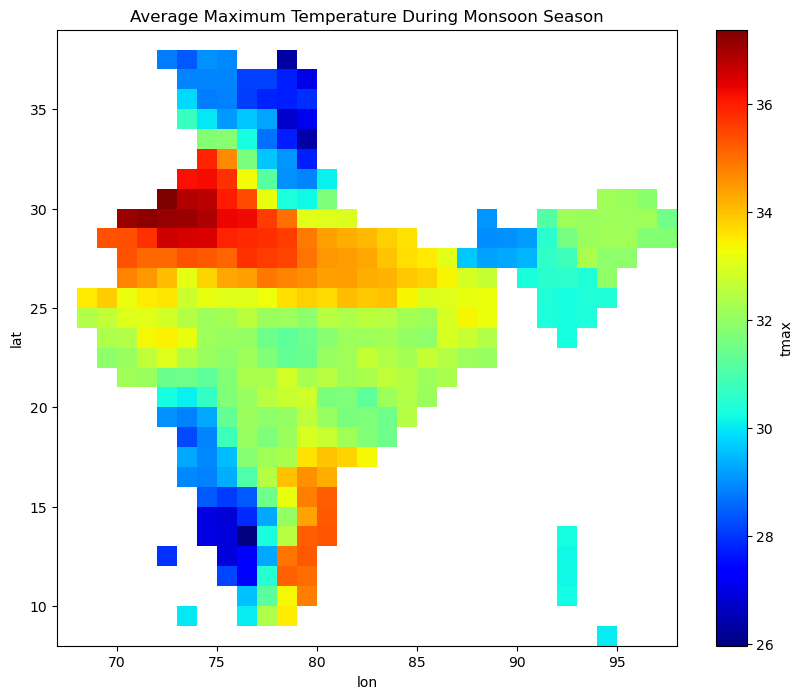

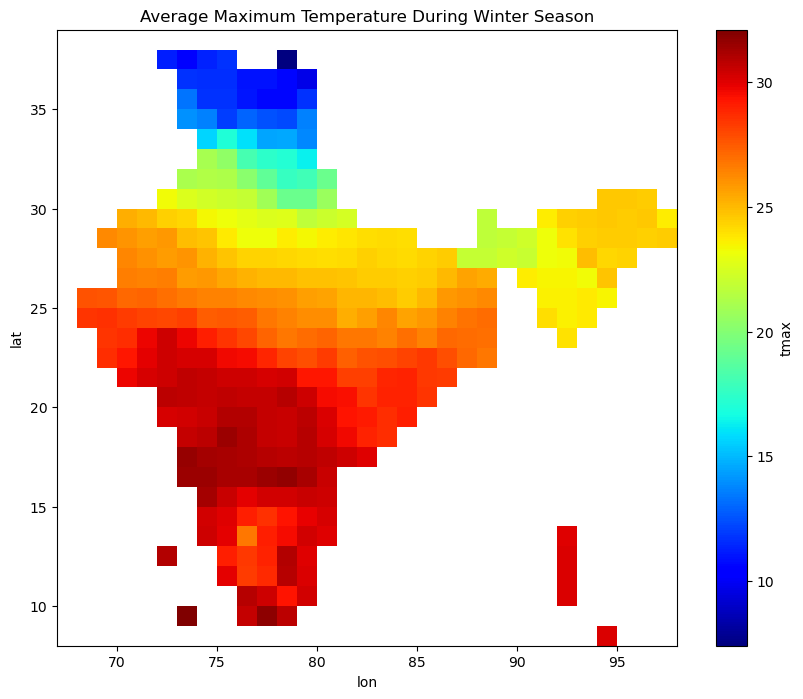

In [31]:
monsoon_temp = ds_temp_cleaned.sel(time=ds_temp_cleaned['time.month'].isin([6, 7, 8, 9]))
monsoon_temp.mean(dim='time').plot(figsize=(10, 8), cmap='jet')
plt.title('Average Maximum Temperature During Monsoon Season')
plt.show()

winter_temp = ds_temp_cleaned.sel(time=ds_temp_cleaned['time.month'].isin([12, 1, 2]))
winter_temp.mean(dim='time').plot(figsize=(10, 8), cmap='jet')
plt.title('Average Maximum Temperature During Winter Season')
plt.show()

C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


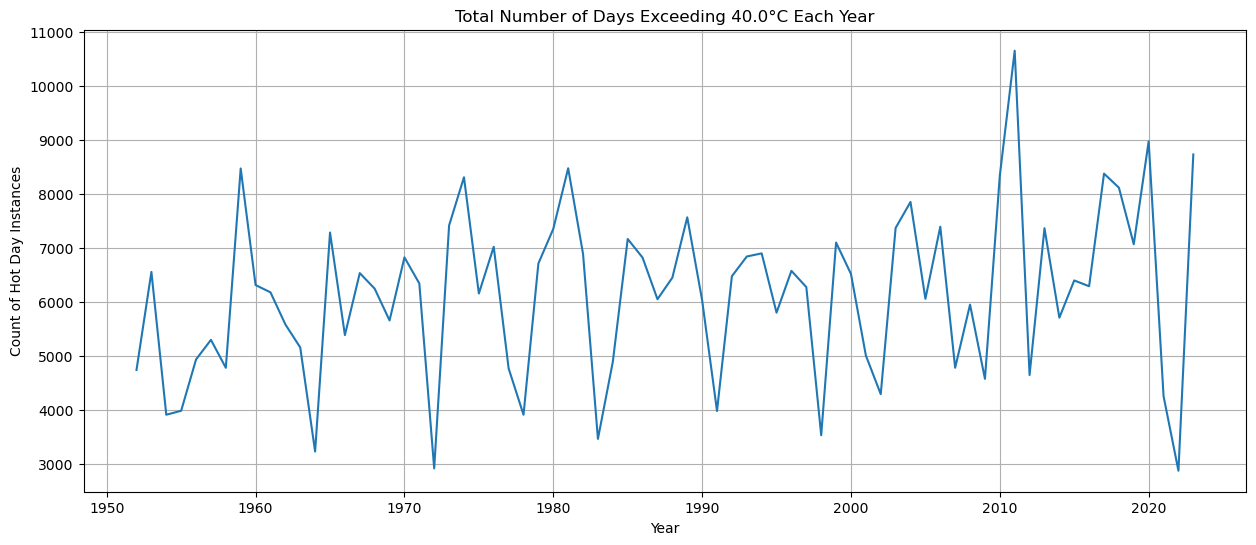

In [37]:
hot_day_threshold = 40.0

hot_days = ds_temp_cleaned.where(ds_temp_cleaned > hot_day_threshold)

hot_day_counts_per_year = hot_days.resample(time='1Y').count()

plt.figure(figsize=(15, 6))
hot_day_counts_per_year.sum(dim=['lat', 'lon']).plot()

plt.title(f'Total Number of Days Exceeding {hot_day_threshold}°C Each Year')
plt.ylabel('Count of Hot Day Instances')
plt.xlabel('Year')
plt.grid(True)
plt.show()

C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


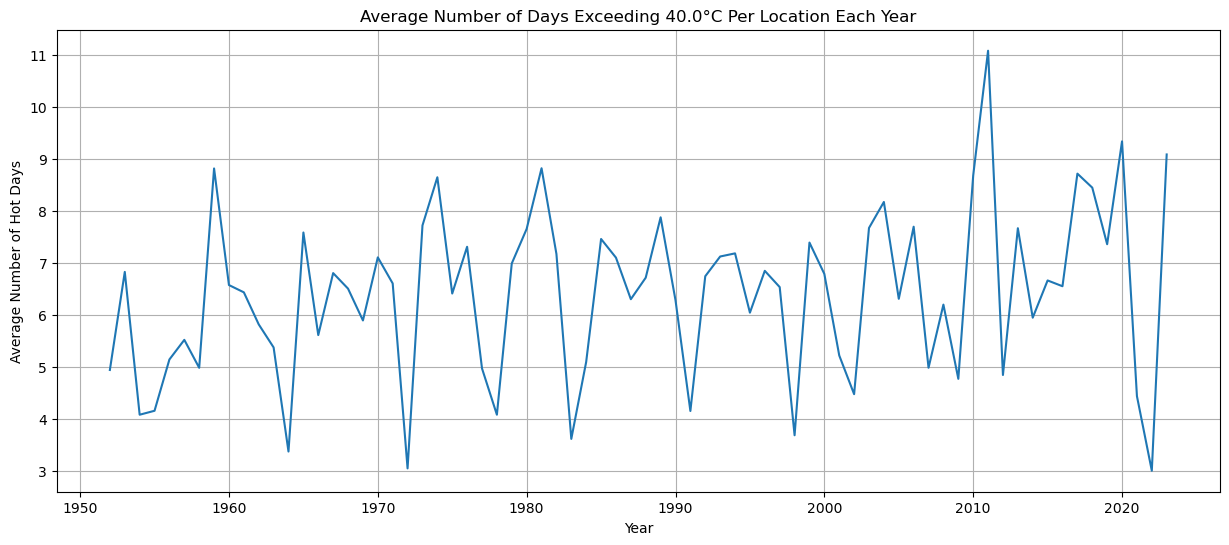

In [38]:
hot_day_threshold = 40.0

hot_days = ds_temp_cleaned.where(ds_temp_cleaned > hot_day_threshold)

hot_day_counts_per_year = hot_days.resample(time='1Y').count(dim='time')

plt.figure(figsize=(15, 6))
hot_day_counts_per_year.mean(dim=['lat', 'lon']).plot()

plt.title(f'Average Number of Days Exceeding {hot_day_threshold}°C Per Location Each Year')
plt.ylabel('Average Number of Hot Days')
plt.xlabel('Year')
plt.grid(True)
plt.show()

C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
C:\Users\adars\anaconda3\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


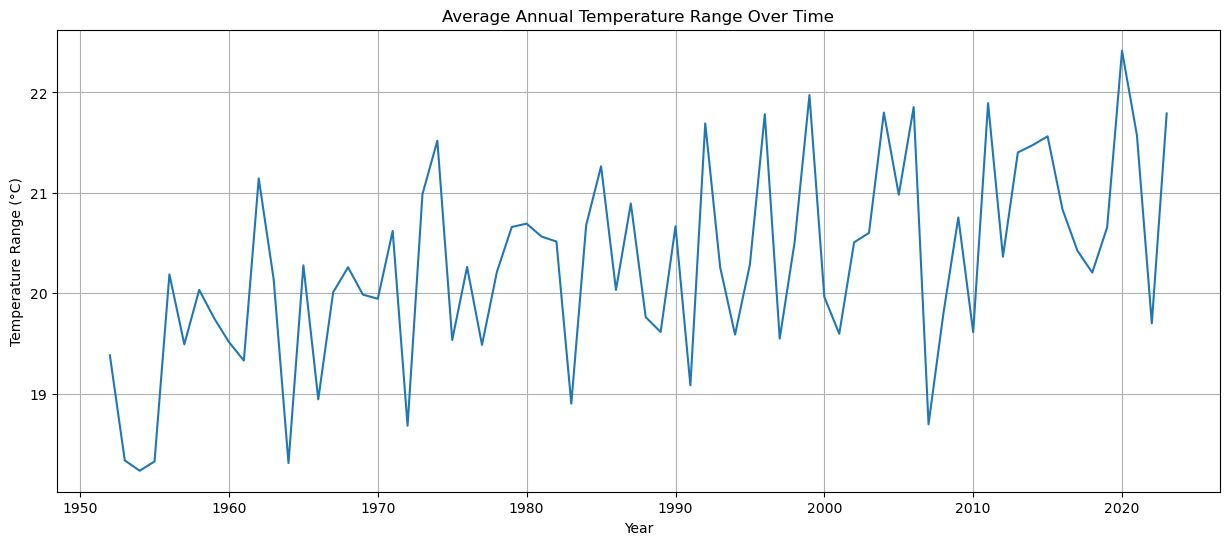

In [39]:
yearly_max = ds_temp_cleaned.resample(time='1Y').max()
yearly_min = ds_temp_cleaned.resample(time='1Y').min()

yearly_range = yearly_max - yearly_min

plt.figure(figsize=(15, 6))
yearly_range.mean(dim=['lat', 'lon']).plot()

plt.title('Average Annual Temperature Range Over Time')
plt.ylabel('Temperature Range (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

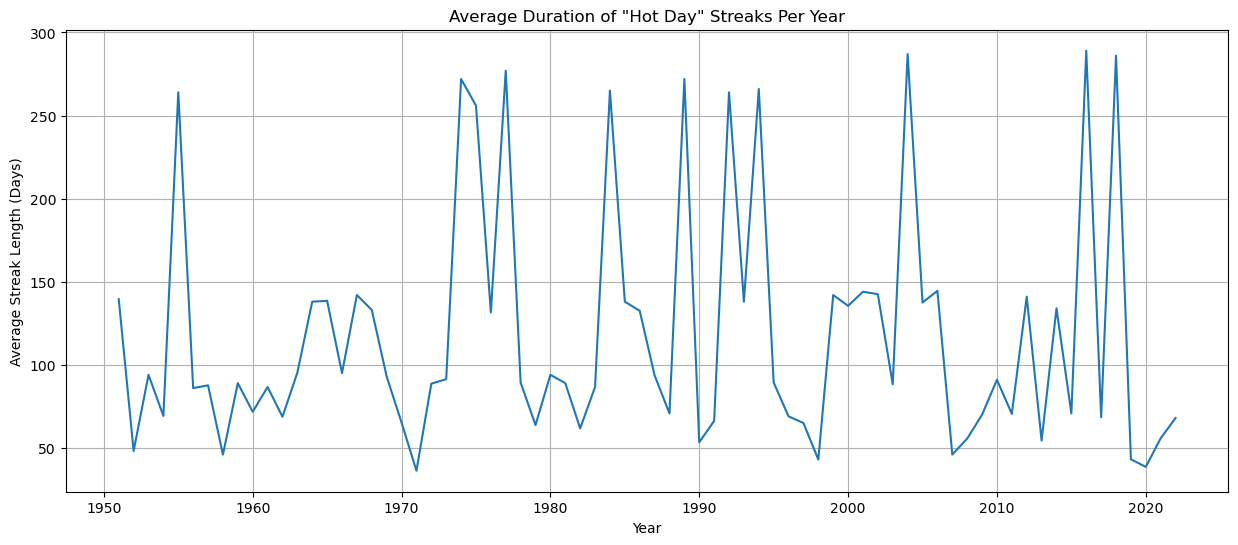

In [42]:
# --- Define a "hot day" as a day where the spatial average temp is above a threshold ---
# We use a high threshold to focus on significant, widespread heat events.
hot_day_threshold = 28.0 
is_hot_day = ds_temp_cleaned.mean(dim=['lat', 'lon']) > hot_day_threshold

# --- Calculate the length of consecutive hot day streaks ---
# Modified approach using numpy to handle streaks
import numpy as np
import pandas as pd

# Convert xarray DataArray to pandas Series for easier processing
hot_day_series = is_hot_day.to_series()

# Group by year
yearly_groups = hot_day_series.groupby(hot_day_series.index.year)

# Function to calculate average streak length for a group
def avg_streak_length(group):
    # Convert to numpy array for processing
    arr = group.values
    if len(arr) == 0:
        return 0
    
    # Find runs of True values
    # First, identify where values change
    run_starts = np.empty(len(arr), dtype=bool)
    run_starts[0] = arr[0]
    np.not_equal(arr[:-1], arr[1:], out=run_starts[1:])
    run_starts = np.nonzero(run_starts)[0]
    
    # Now find run values and lengths
    run_values = arr[run_starts]
    run_lengths = np.diff(np.append(run_starts, len(arr)))
    
    # Filter for True runs only
    true_run_lengths = run_lengths[run_values]
    
    # Return average length (or 0 if no streaks)
    return np.mean(true_run_lengths) if len(true_run_lengths) > 0 else 0

# Calculate average streak length for each year
avg_streak_length_per_year = yearly_groups.apply(avg_streak_length)

# --- Plot the average heatwave duration per year ---
plt.figure(figsize=(15, 6))
avg_streak_length_per_year.plot()
plt.title('Average Duration of "Hot Day" Streaks Per Year')
plt.ylabel('Average Streak Length (Days)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [47]:
df_avg_temp = ds_temp_cleaned.mean(dim=['lat', 'lon']).to_dataframe()

df_avg_temp['tmax_lag_1'] = df_avg_temp['tmax'].shift(1)

df_avg_temp['tmax_lag_7'] = df_avg_temp['tmax'].shift(7)

print("--- Data with Lag Features ---")
print(df_avg_temp.head(10))

--- Data with Lag Features ---
                 tmax  tmax_lag_1  tmax_lag_7
time                                         
1951-01-01  23.956347         NaN         NaN
1951-01-02  24.024881   23.956347         NaN
1951-01-03  24.048801   24.024881         NaN
1951-01-04  24.216917   24.048801         NaN
1951-01-05  24.293505   24.216917         NaN
1951-01-06  24.340689   24.293505         NaN
1951-01-07  24.500179   24.340689         NaN
1951-01-08  24.119343   24.500179   23.956347
1951-01-09  24.630898   24.119343   24.024881
1951-01-10  24.900839   24.630898   24.048801


In [48]:
df_avg_temp['tmax_rolling_7_day_avg'] = df_avg_temp['tmax'].rolling(window=7).mean()

df_avg_temp['tmax_rolling_30_day_max'] = df_avg_temp['tmax'].rolling(window=30).max()

print("\n--- Data with Rolling Window Features ---")
print(df_avg_temp.head(35))


--- Data with Rolling Window Features ---
                 tmax  tmax_lag_1  tmax_lag_7  tmax_rolling_7_day_avg  \
time                                                                    
1951-01-01  23.956347         NaN         NaN                     NaN   
1951-01-02  24.024881   23.956347         NaN                     NaN   
1951-01-03  24.048801   24.024881         NaN                     NaN   
1951-01-04  24.216917   24.048801         NaN                     NaN   
1951-01-05  24.293505   24.216917         NaN                     NaN   
1951-01-06  24.340689   24.293505         NaN                     NaN   
1951-01-07  24.500179   24.340689         NaN               24.197331   
1951-01-08  24.119343   24.500179   23.956347               24.220616   
1951-01-09  24.630898   24.119343   24.024881               24.307190   
1951-01-10  24.900839   24.630898   24.048801               24.428910   
1951-01-11  25.266317   24.900839   24.216917               24.578824   
1951-01-